In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kuc-hackathon-winter-2018/drugsComTest_raw.csv
/kaggle/input/kuc-hackathon-winter-2018/drugsComTrain_raw.csv


In [2]:
import os
print(os.listdir("../input"))

['kuc-hackathon-winter-2018']


In [3]:
df_train = pd.read_csv("../input/kuc-hackathon-winter-2018/drugsComTrain_raw.csv", parse_dates=["date"])
df_test = pd.read_csv("../input/kuc-hackathon-winter-2018/drugsComTest_raw.csv", parse_dates=["date"])
df_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37


In [4]:
df_train['condition'].value_counts()

Birth Control                                            28788
Depression                                                9069
Pain                                                      6145
Anxiety                                                   5904
Acne                                                      5588
                                                         ...  
48</span> users found this comment helpful.                  1
Parkinsonian Trem                                            1
77</span> users found this comment helpful.                  1
Prevention of Perinatal Group B Streptococcal Disease        1
Portal Hypertension                                          1
Name: condition, Length: 884, dtype: int64

In [5]:
print("Train shape :" ,df_train.shape)
print("Test shape :", df_test.shape)

Train shape : (161297, 7)
Test shape : (53766, 7)


In [11]:
"""
def userful_count(data):
    grouped = data.groupby(['rating']).size().reset_index(name='user_sizes_rating')
    data = pd.merge(data,grouped,on='rating',how='left')
    return data
#___________________________________________________________
df_all =  userful_count(df_all) 
df_all["usefulCount"] = df_all["usefulCount"] / df_all["user_sizes_rating"].astype(int)
"""

'\ndef userful_count(data):\n    grouped = data.groupby([\'rating\']).size().reset_index(name=\'user_sizes_rating\')\n    data = pd.merge(data,grouped,on=\'rating\',how=\'left\')\n    return data\n#___________________________________________________________\ndf_all =  userful_count(df_all) \ndf_all["usefulCount"] = df_all["usefulCount"] / df_all["user_sizes_rating"].astype(int)\n'

These are additional explanations for variables.

drugName (categorical): name of drug
condition (categorical): name of condition
review (text): patient review
rating (numerical): 10 star patient rating
date (date): date of review entry
usefulCount (numerical): number of users who found review useful

In [6]:
#checking for deduplication
print("unique values count of train : " ,len(set(df_train['uniqueID'].values)))
print("length of train : " ,df_train.shape[0])

unique values count of train :  161297
length of train :  161297


In [7]:
df_all = pd.concat([df_train,df_test])
df_all.shape

(215063, 7)

In [8]:
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

import os
import string
color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
import lightgbm as lgb

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

Text(0.5, 1.0, 'Top20 : The number of drugs per condition.')

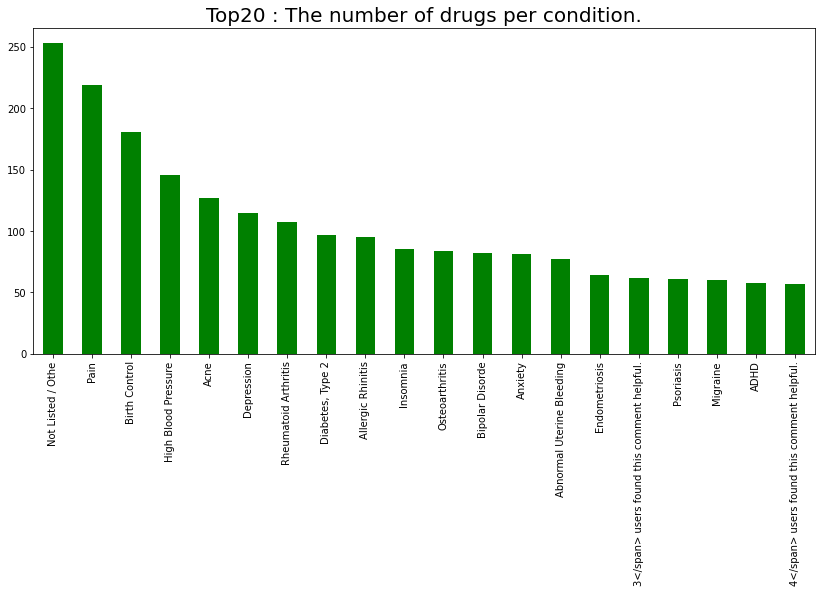

In [9]:

condition_dn = df_all.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20)

In [10]:
df_all[df_all['condition']=='1</span> users found this comment helpful.'].head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount
678,80302,Alavert D-12 Hour Allergy and Sinus,1</span> users found this comment helpful.,"""I&#039;ve found this product helps to shrink ...",5,2016-04-15,1
1882,230590,Depo-Provera,1</span> users found this comment helpful.,"""I got my first (and last) Depo shot about two...",1,2011-10-25,1
3716,147589,Aviane,1</span> users found this comment helpful.,"""I just started using Avaine about a 2 weeks a...",7,2010-09-29,1


In [11]:
df_all[df_all['condition']== str(0) + "</span> users found this comment helpful."].head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount
516,189594,Nortrel 1 / 35,0</span> users found this comment helpful.,"""They switched me from Necon to Nortrel saying...",2,2017-08-16,0
553,220376,Loestrin 24 Fe,0</span> users found this comment helpful.,"""I was on Loestrin 24 Fe for about 6 months an...",7,2012-03-26,0
571,190387,Ortho Tri-Cyclen Lo,0</span> users found this comment helpful.,"""I love this birth control because no spotting...",9,2011-11-29,0


In [12]:

df_all[df_all['condition']=='92</span> users found this comment helpful.'].head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
160921,96527,Neurontin,92</span> users found this comment helpful.,"""At 300mg 4x daily my pain was almost gone. """,9,2013-07-08,92


In [13]:

for i in range(0,101):
    df_all = df_all.drop(df_all[df_all['condition']== str(i)+"</span> users found this comment helpful."].index)

In [14]:
df_all.shape

(213334, 7)

In [15]:
df_all[df_all['condition']== str(0) + "</span> users found this comment helpful."].head(3)


,uniqueID,drugName,condition,review,rating,date,usefulCount


In [16]:
df_train['review'][3]

'"This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch"'

Text(0.5, 1.0, 'Count of rating values')

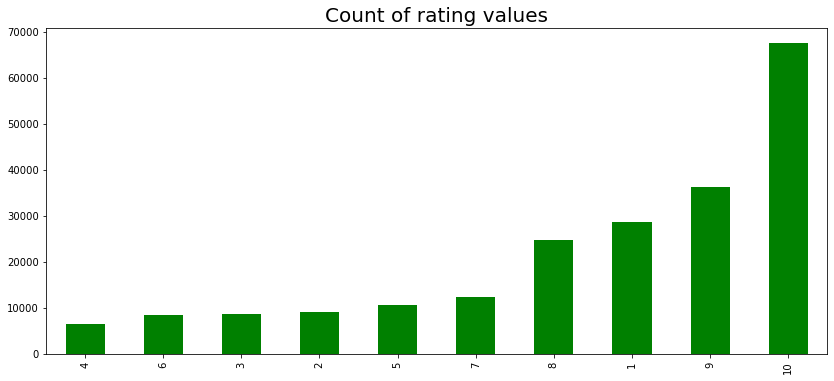

In [17]:
rating = df_all['rating'].value_counts().sort_values(ascending=True)
rating.plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Count of rating values", fontsize = 20)


Most people choose four values; 10, 9, 1, 8, and the number of 10 is more than twice as many as the others. With this, we can see that the percentage of positives is higher than negative, and people's reactions are extreme.

Next, we will check the number of reviews and percentage of ratings according to weather.

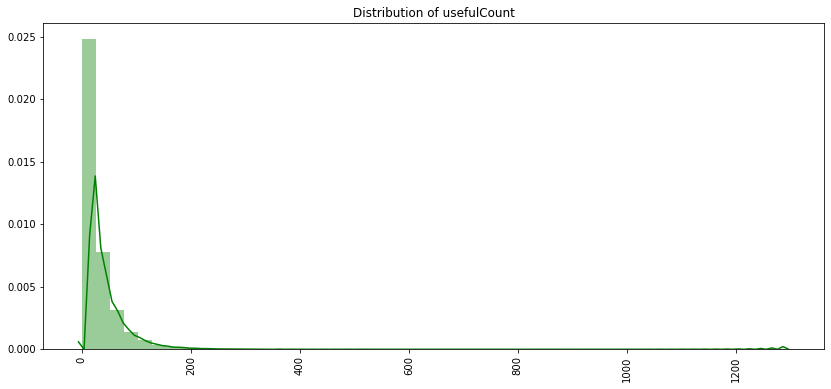

In [18]:
plt.figure(figsize=(14,6))
sns.distplot(df_all["usefulCount"].dropna(),color="green")
plt.xticks(rotation='vertical')
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=12)
plt.title("Distribution of usefulCount")
plt.show()

In [19]:
df_all.shape


(213334, 7)

In [20]:
df_all["usefulCount"].describe()

count    213334.000000
mean         28.090862
std          36.396812
min           0.000000
25%           6.000000
50%          16.000000
75%          36.000000
max        1291.000000
Name: usefulCount, dtype: float64

If you look at the distribution of usefulCount, you can see that the difference between minimum and maximum is 1291, which is high. In addition, the deviation is huge, which is 36. The reason for this is that the more drugs people look for, the more people read the review no matter their contents are good or bad, which makes the usefulcount very high. So when we create the model, we will normalize it by conditions, considering people's accessibility.

Text(0.5, 1.0, 'Total Missing Value ')

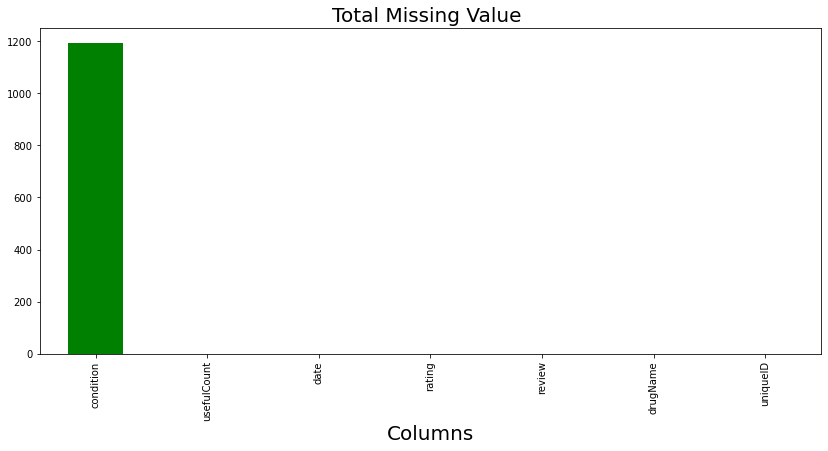

In [21]:
percent = (df_all.isnull().sum()).sort_values(ascending=False)
percent.plot(kind="bar", figsize = (14,6), fontsize = 10, color='green')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Value ", fontsize = 20)

In [22]:
print("Missing value (%):", 1200/df_all.shape[0] *100)

Missing value (%): 0.5624982421929932


In [23]:

df_all = df_all.dropna(axis = 0)

In [24]:
df_all.shape

(212141, 7)

In [25]:
use_ls = []

for i in range(1, 11):
    use_ls.append([i, np.sum(df_all[df_all.rating == i].usefulCount) / np.sum([df_all.rating == i])])
    
use_arr = np.asarray(use_ls)

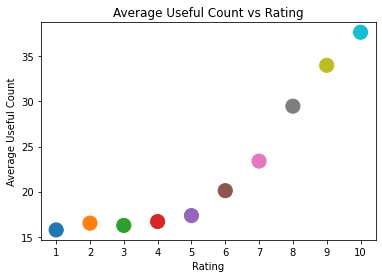

In [26]:
plt.scatter(use_arr[:, 0], use_arr[:, 1], c=use_arr[:, 0], cmap='tab10', s=200)
plt.title('Average Useful Count vs Rating')
plt.xlabel('Rating')
plt.ylabel('Average Useful Count')
plt.xticks([i for i in range(1, 11)]);

Looks like people found reviews with higher scores to be more useful! In the sense that reviews with high ratings recieved more 'useful' tags than reviews with low ratings. Interesting...

 Does this represent some sort of bias within the useful count?

Preprocessing
Before we can begin trying different machine learning models, 
we need to prepare our data to be processed by these algorithms.
A major challenge with this data set is the nearly 200,000 reviews 
and the size of the vectorized corpus. We will implement a few 
techniques for speeding up the model fitting and prediction process which will allow us to 
use models more advanced than Naive-Bayes for a data-set of this size.

The obvious starting question for such an approach is how can we convert the raw 
text of the review into a data representation that can be used by a numerical classifier. 
To this end, we will use the process of vectorization. By vectorizing the 'review' column, 
we can allow widely-varying lengths of text to be converted into a numerical format which 
can be processed by the classifier.

This process involves creating tokens (i.e. individual words or groups of words extracted
from the text). Once the list of tokens is created, they are assigned an index integer identifier which
allows them to be listed. We can then count the number of words in the document and normalize them in such a way 
that de-emphasizes words that appear frequently (like "a", "the", etc.). This creates what is known as a bag 
(multi-set) of words. Such a representation associates a real-valued vector to each review representing
the importance of the tokens (words) in the review. This represents the entire corpus of reviews as a 
large matrix where each row of the matrix represents one of the reviews and each column repreents a token occurence.

In [27]:
df_all.review.head()

0    "It has no side effect, I take it in combinati...
1    "My son is halfway through his fourth week of ...
2    "I used to take another oral contraceptive, wh...
3    "This is my first time using any form of birth...
4    "Suboxone has completely turned my life around...
Name: review, dtype: object

In [28]:
df_all.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37


In [29]:
df_all.shape

(212141, 7)

In [36]:
#final_df=df_all.drop_duplicates(subset={"condition","rating","date","usefulCount","drugName","review"}, keep='first', inplace=False)

In [30]:
final_df = df_all

In [31]:
final_df.shape

(212141, 7)

In [32]:
(final_df['uniqueID'].size*1.0)/(df_all['uniqueID'].size*1.0)*100

100.0

In [33]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

In [34]:
import re
i=0;
for sent in final_df['review'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;

In [35]:
stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))

{'down', 'from', 'the', 'above', 'be', 'both', "you'd", 's', "shouldn't", 'after', 'he', 'had', 'ma', 'herself', 'who', 'which', 'doesn', 'further', 'isn', 'when', 'that', "haven't", 'than', 'each', 'mightn', 'being', 'been', 'those', 'will', 'my', 'all', 'what', 'yourself', 'y', "couldn't", 'until', 'so', 'was', 'her', 'why', 'and', 'wouldn', 'some', 'don', 'haven', 'if', 'didn', "wasn't", 'needn', 'should', "needn't", 'your', 'where', 'during', 'because', 'their', 'between', 'under', 'over', "it's", 'other', 'you', 'very', 're', "you'll", 'whom', 'but', 'in', 'it', 'for', 'there', "you've", 'out', 'ain', 'i', 'hadn', 'she', 'our', 'to', 'these', 'has', "should've", 'ours', 'shan', 'shouldn', 'at', 'myself', 'them', 'a', 'mustn', 'by', 'only', 'too', "weren't", 'hasn', 'how', 'him', "won't", "that'll", 'll', 'of', 'aren', 'now', 'hers', "wouldn't", 'have', 'just', 'they', 'were', 'own', 'below', 'can', 'against', 'few', 'its', 'am', 'does', 'yourselves', 'again', "don't", 'did', 'is',

quotes hatao

In [36]:
def remove_enclosing_quotes(s):
    if s[0] == '"' and s[-1] == '"':
        return s[1:-1]
    else:
        return s
    
final_df.review = final_df.review.apply(remove_enclosing_quotes)

final_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"It has no side effect, I take it in combinatio...",9,2012-05-20,27
1,95260,Guanfacine,ADHD,My son is halfway through his fourth week of I...,8,2010-04-27,192
2,92703,Lybrel,Birth Control,"I used to take another oral contraceptive, whi...",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,This is my first time using any form of birth ...,8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,Suboxone has completely turned my life around....,9,2016-11-27,37


Another problem with the review text we noticed during our exploration of the data set is that when the data was scraped from the web, many punctuation characters were converted into their ascii representation. Since our alphanumeric tokenizer is splitting on punctuation, this populates our vector with semantically meaningless strings corresponding to the ascii punctuation. We can use a regular expression to remove all occurences of this pattern from the review text which should further reduce the size of our tokens and eliminate more tokens with little predictive information.

In [37]:
import re
final_df.review = final_df.review.apply(lambda x: re.sub(r'&#\d+;',r'', x))


From the exploratory data analysis, we see that both the drugName and condition columns also have predictive value. For this reason, we will prepend each of these to the review and save the complete string as a single column called text.

In [38]:
def combine_text_columns(data_frame, text_cols):
    """
    Converts all text in each row of data_frame to a single vector
    """
    #col_list = list(set(text_cols) & set(data_frame.columns.tolist()))
    text_data = data_frame[text_cols]
    
    text_data.fillna("", inplace=True)
    
    return text_data.apply(lambda x: " ".join(x), axis=1)

In [39]:
# Create the text_vector combining all  text columns
text_cols = ['drugName', 'condition', 'review']
final_df['text'] = combine_text_columns(final_df, text_cols)

final_df[['text', 'rating', 'usefulCount']].head()

,text,rating,usefulCount
0,Valsartan Left Ventricular Dysfunction It has ...,9,27
1,Guanfacine ADHD My son is halfway through his ...,8,192
2,Lybrel Birth Control I used to take another or...,5,17
3,Ortho Evra Birth Control This is my first time...,8,10
4,Buprenorphine / naloxone Opiate Dependence Sub...,9,37


In [40]:
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext


The default implementation of CountVectorizer splits on white-space. For our specific problem, this gives us a larger number of tokens with little predictive value towards the sentiment of a review. For this reason, we choose to instead split by grouping continuous segments of alpha-numeric characters. We believe this will produce more semantically meaningful tokens and lead to better scalability and predictive power for our machine learning models.

In [41]:
final_df['binary_rating'] = final_df["rating"].apply(lambda x: 1 if x >= 6 else 0)
#final_df['binary_rating'] = final_df['rating'] > 5


In [42]:
final_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,text,binary_rating
0,206461,Valsartan,Left Ventricular Dysfunction,"It has no side effect, I take it in combinatio...",9,2012-05-20,27,Valsartan Left Ventricular Dysfunction It has ...,1
1,95260,Guanfacine,ADHD,My son is halfway through his fourth week of I...,8,2010-04-27,192,Guanfacine ADHD My son is halfway through his ...,1
2,92703,Lybrel,Birth Control,"I used to take another oral contraceptive, whi...",5,2009-12-14,17,Lybrel Birth Control I used to take another or...,0
3,138000,Ortho Evra,Birth Control,This is my first time using any form of birth ...,8,2015-11-03,10,Ortho Evra Birth Control This is my first time...,1
4,35696,Buprenorphine / naloxone,Opiate Dependence,Suboxone has completely turned my life around....,9,2016-11-27,37,Buprenorphine / naloxone Opiate Dependence Sub...,1


In [43]:
final_df['binary_rating'].value_counts()

1    148778
0     63363
Name: binary_rating, dtype: int64

In [44]:
from collections import Counter
from sklearn.datasets import make_classification
from numpy import where
from matplotlib import pyplot
counter = Counter(final_df['binary_rating'])
print(counter)

Counter({1: 148778, 0: 63363})


In [52]:
"""
from sklearn.utils import resample
df_minority = final_df[final_df.binary_rating==0]
df_majority = final_df[final_df.binary_rating==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=148778,    # to match majority class
                                 random_state=42) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.binary_rating.value_counts()
"""

'\nfrom sklearn.utils import resample\ndf_minority = final_df[final_df.binary_rating==0]\ndf_majority = final_df[final_df.binary_rating==1]\n \n# Upsample minority class\ndf_minority_upsampled = resample(df_minority, \n                                 replace=True,     # sample with replacement\n                                 n_samples=148778,    # to match majority class\n                                 random_state=42) # reproducible results\n \n# Combine majority class with upsampled minority class\ndf_upsampled = pd.concat([df_majority, df_minority_upsampled])\n \n# Display new class counts\ndf_upsampled.binary_rating.value_counts()\n'

In [45]:
print(final_df.shape)
df_upsampled = final_df

(212141, 9)


The above output indicates that the size of our vectorized reviews will be rather large which indicates that we'll need to do some tricks to make our learning algorithms (beyond Naive Bayes) perform well at this scale. Moreover, from the tokens above, it seems that we will need some form of preprocessing. If we think back to the data exploration performed earlier in the notebook, we can see that when the reviews were scraped from the web, there were certain formatting patterns which we could replace to get more meaningful tokens.

In [51]:
import warnings  
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style; style.use('ggplot')

import re
import xgboost as xgb

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from wordcloud import WordCloud, STOPWORDS
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from catboost import CatBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics
from time import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.utils import to_categorical
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from collections import Counter
from sklearn.metrics import accuracy_score

from sklearn.metrics import f1_score
import seaborn as sns

In [50]:
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [51]:
#df_data['review_clean'] = df_data['review'].apply(review_clean)
df_upsampled['review_clean'] = review_clean(df_upsampled.text)

In [52]:
stop_words = set(stopwords.words('english'))
df_upsampled['review_clean'] = df_upsampled['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [53]:
# Removing the word stems using the Snowball Stemmer
from nltk.stem import SnowballStemmer
Snow_ball = SnowballStemmer("english")
df_upsampled['review_clean'] = df_upsampled['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [54]:
df_upsampled['review_clean'][0: 20]

0     valsartan left ventricular dysfunct side effec...
1     guanfacin adhd son halfway fourth week intuniv...
2     lybrel birth control use take anoth oral contr...
3     ortho evra birth control first time use form b...
4     buprenorphin naloxon opiat depend suboxon comp...
5     ciali benign prostat hyperplasia 2nd day 5mg s...
6     levonorgestrel emerg contracept pull cum bit t...
7     aripiprazol bipolar disord abilifi chang life ...
8     keppra epilepsi noth problem keppera constant ...
9     ethinyl estradiol levonorgestrel birth control...
10    topiram migrain prevent medic almost two week ...
11    l methylfol depress taken anti depress year im...
12    pentasa crohn diseas crohn resect 30 year ago ...
13    dextromethorphan cough littl bit linger cough ...
14    nexplanon birth control start nexplanon 2 mont...
15    liraglutid obes take saxenda sinc juli 2016 se...
16    trimethoprim urinari tract infect drug work we...
17    amitriptylin ibromyalgia ive take amitript

In [55]:
# Separating the day, month and year from the Date
df_upsampled['day'] = df_upsampled['date'].dt.day
df_upsampled['month'] = df_upsampled['date'].dt.month
df_upsampled['year'] = df_upsampled['date'].dt.year
df_upsampled.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,text,binary_rating,review_clean,day,month,year
0,206461,Valsartan,Left Ventricular Dysfunction,"It has no side effect, I take it in combinatio...",9,2012-05-20,27,Valsartan Left Ventricular Dysfunction It has ...,1,valsartan left ventricular dysfunct side effec...,20,5,2012
1,95260,Guanfacine,ADHD,My son is halfway through his fourth week of I...,8,2010-04-27,192,Guanfacine ADHD My son is halfway through his ...,1,guanfacin adhd son halfway fourth week intuniv...,27,4,2010
2,92703,Lybrel,Birth Control,"I used to take another oral contraceptive, whi...",5,2009-12-14,17,Lybrel Birth Control I used to take another or...,0,lybrel birth control use take anoth oral contr...,14,12,2009
3,138000,Ortho Evra,Birth Control,This is my first time using any form of birth ...,8,2015-11-03,10,Ortho Evra Birth Control This is my first time...,1,ortho evra birth control first time use form b...,3,11,2015
4,35696,Buprenorphine / naloxone,Opiate Dependence,Suboxone has completely turned my life around....,9,2016-11-27,37,Buprenorphine / naloxone Opiate Dependence Sub...,1,buprenorphin naloxon opiat depend suboxon comp...,27,11,2016


In [56]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [57]:
from textblob import TextBlob
df_upsampled['sentiment'] = sentiment(df_upsampled['review'])

In [58]:
df_upsampled['sentiment_text'] = sentiment(df_upsampled['text'])
df_upsampled['sentiment_reviewclean'] = sentiment(df_upsampled['review_clean'])

In [59]:
print(np.corrcoef(df_upsampled['sentiment'], df_upsampled['rating']))
print(np.corrcoef(df_upsampled['sentiment_text'], df_upsampled['rating']))
print(np.corrcoef(df_upsampled['sentiment_reviewclean'], df_upsampled['rating']))

[[1.         0.34838012]
 [0.34838012 1.        ]]
[[1.         0.34636005]
 [0.34636005 1.        ]]
[[1.         0.22913345]
 [0.22913345 1.        ]]


In [60]:
print(np.corrcoef(df_upsampled['sentiment'], df_upsampled['binary_rating']))
print(np.corrcoef(df_upsampled['sentiment_text'], df_upsampled['binary_rating']))
print(np.corrcoef(df_upsampled['sentiment_reviewclean'], df_upsampled['binary_rating']))

[[1.         0.31733406]
 [0.31733406 1.        ]]
[[1.         0.31571547]
 [0.31571547 1.        ]]
[[1.         0.20873787]
 [0.20873787 1.        ]]


In [61]:
df_upsampled.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount,text,binary_rating,review_clean,day,month,year,sentiment,sentiment_text,sentiment_reviewclean
0,206461,Valsartan,Left Ventricular Dysfunction,"It has no side effect, I take it in combinatio...",9,2012-05-20,27,Valsartan Left Ventricular Dysfunction It has ...,1,valsartan left ventricular dysfunct side effec...,20,5,2012,0.000000,0.000000,0.000000
1,95260,Guanfacine,ADHD,My son is halfway through his fourth week of I...,8,2010-04-27,192,Guanfacine ADHD My son is halfway through his ...,1,guanfacin adhd son halfway fourth week intuniv...,27,4,2010,0.168333,0.168333,0.114583
2,92703,Lybrel,Birth Control,"I used to take another oral contraceptive, whi...",5,2009-12-14,17,Lybrel Birth Control I used to take another or...,0,lybrel birth control use take anoth oral contr...,14,12,2009,0.067210,0.067210,0.105000
3,138000,Ortho Evra,Birth Control,This is my first time using any form of birth ...,8,2015-11-03,10,Ortho Evra Birth Control This is my first time...,1,ortho evra birth control first time use form b...,3,11,2015,0.179545,0.179545,0.300000
4,35696,Buprenorphine / naloxone,Opiate Dependence,Suboxone has completely turned my life around....,9,2016-11-27,37,Buprenorphine / naloxone Opiate Dependence Sub...,1,buprenorphin naloxon opiat depend suboxon comp...,27,11,2016,0.194444,0.194444,0.147037


In [62]:
df_data = df_upsampled

In [63]:
#Word count in each review
df_data['count_word']=df_data["review_clean"].apply(lambda x: len(str(x).split()))

#Unique word count 
df_data['count_unique_word']=df_data["review_clean"].apply(lambda x: len(set(str(x).split())))

#Letter count
df_data['count_letters']=df_data["review_clean"].apply(lambda x: len(str(x)))

#punctuation count
df_data["count_punctuations"] = df_data["text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df_data["count_words_upper"] = df_data["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df_data["count_words_title"] = df_data["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df_data["count_stopwords"] = df_data["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
df_data["mean_word_len"] = df_data["review_clean"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [64]:
df_data.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'text', 'binary_rating', 'review_clean', 'day', 'month',
       'year', 'sentiment', 'sentiment_text', 'sentiment_reviewclean',
       'count_word', 'count_unique_word', 'count_letters',
       'count_punctuations', 'count_words_upper', 'count_words_title',
       'count_stopwords', 'mean_word_len'],
      dtype='object')

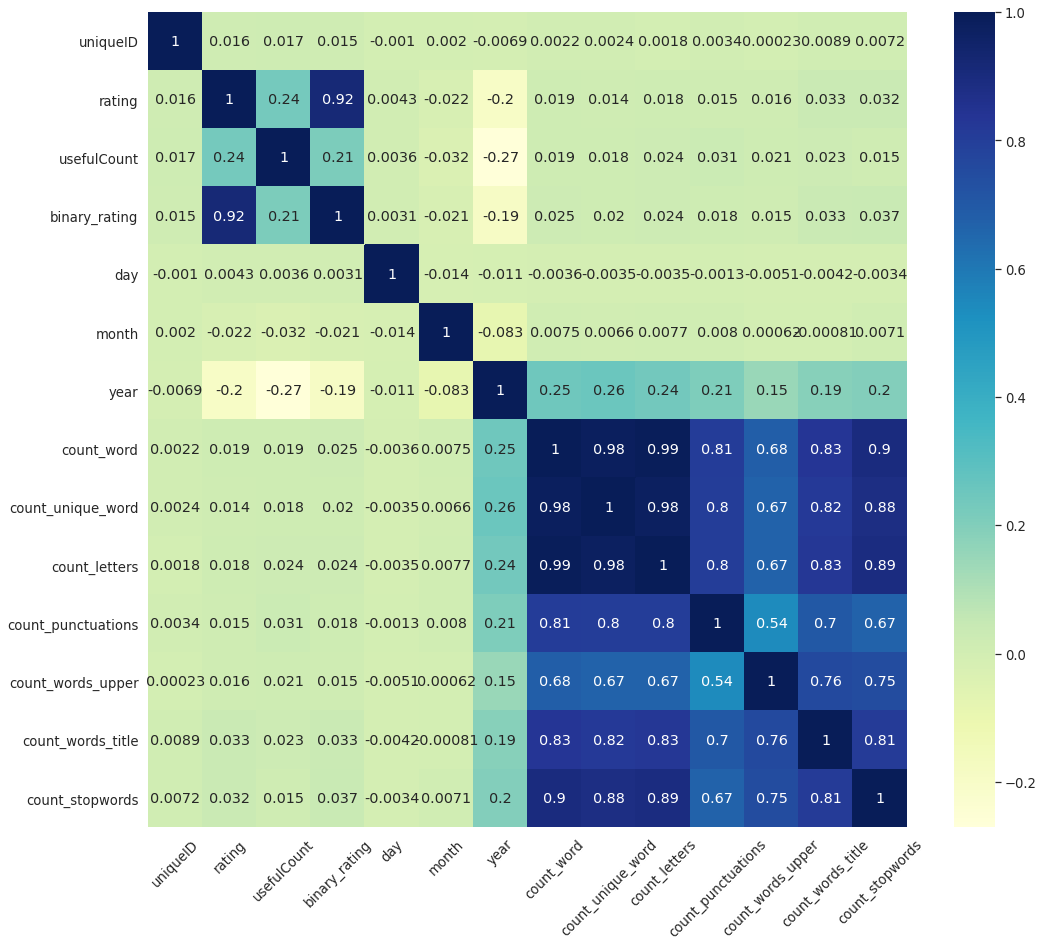

In [65]:
# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = df_data.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'YlGnBu')
plt.setp(sns_.get_xticklabels(), rotation = 45);

In [66]:
df_data['binary_rating'].value_counts()

1    148778
0     63363
Name: binary_rating, dtype: int64

In [67]:
df_data.shape

(212141, 24)

In [68]:
df_data=df_data.drop_duplicates(subset={"uniqueID"}, keep='first', inplace=False)
df_data.shape

(212141, 24)

In [69]:
df_datas = df_data
#df_datas["binary_rating"] = df_datas["rating"].apply(lambda x: 1 if x>=6 else  0)

In [70]:
df_datas['binary_rating'].value_counts()

1    148778
0     63363
Name: binary_rating, dtype: int64

In [71]:
"""
from sklearn.utils import resample
df_minority = df_datas[df_datas.binary_ratings==-1]
df_middle = df_datas[df_datas.binary_ratings==0]
df_majority = df_datas[df_datas.binary_ratings==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=40000,    # to match majority class
                                 random_state=42) # reproducible results
df_middle_upsampled = resample(df_middle, 
                                 replace=True,     # sample with replacement
                                 n_samples=55000,    # to match majority class
                                 random_state=42)
df_majority_upsampled = resample(df_majority, 
                                 replace=True,     # sample with replacement
                                 n_samples=90000,    # to match majority class
                                 random_state=42)
# Combine majority class with upsampled minority class
df_datas = pd.concat([df_majority_upsampled, df_middle_upsampled, df_minority_upsampled])
 
# Display new class counts
df_datas.binary_ratings.value_counts()
"""

'\nfrom sklearn.utils import resample\ndf_minority = df_datas[df_datas.binary_ratings==-1]\ndf_middle = df_datas[df_datas.binary_ratings==0]\ndf_majority = df_datas[df_datas.binary_ratings==1]\n\n# Upsample minority class\ndf_minority_upsampled = resample(df_minority, \n                                 replace=True,     # sample with replacement\n                                 n_samples=40000,    # to match majority class\n                                 random_state=42) # reproducible results\ndf_middle_upsampled = resample(df_middle, \n                                 replace=True,     # sample with replacement\n                                 n_samples=55000,    # to match majority class\n                                 random_state=42)\ndf_majority_upsampled = resample(df_majority, \n                                 replace=True,     # sample with replacement\n                                 n_samples=90000,    # to match majority class\n                                 rando

In [72]:
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    df_datas[feature] = label_encoder_feat[feature].fit_transform(df_datas[feature])
features = df_datas[['usefulCount','condition', 'sentiment', 'day', 'month', 'year',
                   'sentiment_text', 'sentiment_reviewclean', 'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

In [73]:
features.head()

,usefulCount,condition,sentiment,day,month,year,sentiment_text,sentiment_reviewclean,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
0,27,408,0.000000,20,5,2012,0.000000,0.000000,13,13,80,1,1,10,8,5.230769
1,192,8,0.168333,27,4,2010,0.168333,0.114583,68,57,388,21,3,14,70,4.720588
2,17,103,0.067210,14,12,2009,0.067210,0.105000,75,53,431,26,6,18,61,4.760000
3,10,103,0.179545,3,11,2015,0.179545,0.300000,49,34,263,10,4,14,46,4.387755
4,37,521,0.194444,27,11,2016,0.194444,0.147037,67,59,431,15,7,20,60,5.447761


vjvjvvjcccycycyc

In [74]:
y = df_datas["binary_rating"]

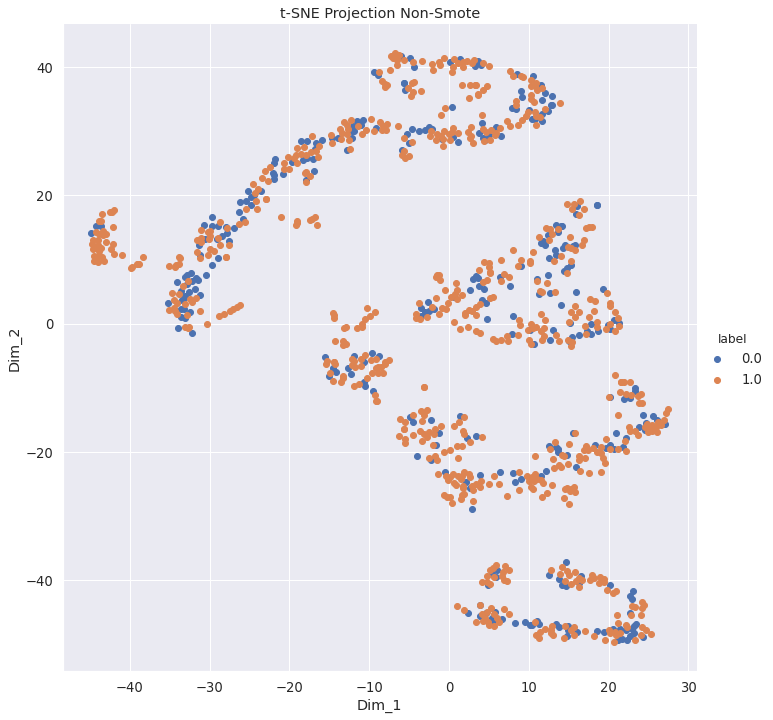

In [75]:
import seaborn as sn
from sklearn.manifold import TSNE
from time import time

# Picking the top 2k points as TSNE takes a lot of time for 15K points
featuress = features.iloc[0:1000,:]
labels_2000 = y[0:1000]

model = TSNE(n_components=2, random_state=42)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(featuress)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_2000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=10).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("t-SNE Projection Non-Smote")
plt.show()

In [76]:
labels_2000.value_counts()

1    695
0    305
Name: binary_rating, dtype: int64

In [77]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
features_2, y_2 = oversample.fit_resample(features, y)

In [109]:
features_2['binary_rating'] = y_2

In [110]:
features_2 = features_2.sample(frac = 1) 

In [111]:
y_2 = features_2['binary_rating']
y_2[:1000].value_counts()

0    505
1    495
Name: binary_rating, dtype: int64

In [112]:
#df.drop(['B', 'C'], axis=1)
features_2 = features_2.drop(['binary_rating'],axis = 1)

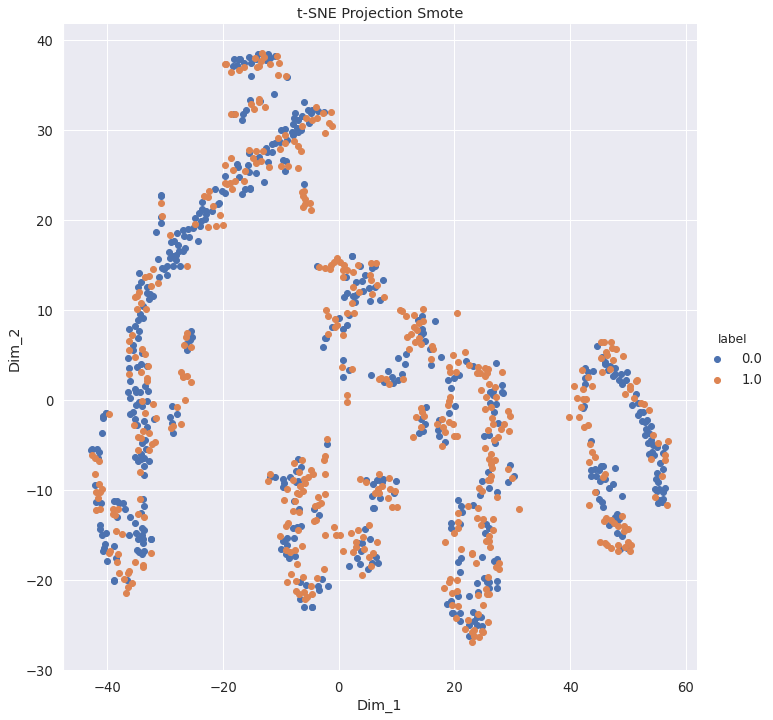

CPU times: user 13.7 s, sys: 116 ms, total: 13.8 s
Wall time: 7.92 s


In [113]:
%%time
import seaborn as sn
from sklearn.manifold import TSNE
from time import time

# Picking the top 2k points as TSNE takes a lot of time for 15K points
featuresss = features_2.iloc[:1000,:]
labelss_2000 = y_2[:1000]

model = TSNE(n_components=2, random_state=42)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(featuresss)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labelss_2000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=10).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("t-SNE Projection Smote")
plt.show()


In [83]:
#y = df_upsampled.binary_rating
#z = df_datas.binary_ratings
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(features_2, y_2, random_state=42, stratify=y_2, test_size=0.25)

In [84]:
y_test_2[:11]

241254    0
186009    0
218434    0
244781    0
176307    0
210692    1
212713    0
15925     1
3252      1
222031    0
69398     1
Name: binary_rating, dtype: int64

In [85]:
X_test_2.head()

,usefulCount,condition,sentiment,day,month,year,sentiment_text,sentiment_reviewclean,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
241254,2,333,0.034652,3,4,2016,0.039055,0.154296,48,39,267,9,5,14,40,4.586805
186009,32,460,-0.357143,29,4,2015,-0.238095,-0.714286,21,19,129,2,1,5,14,5.190476
218434,15,402,-0.351530,30,10,2013,-0.351530,-0.314849,8,7,51,1,0,5,6,5.381657
244781,5,12,0.047100,27,6,2015,0.047100,0.019518,39,31,214,7,1,11,23,4.516414
176307,13,521,0.064444,10,5,2017,0.064444,0.124074,87,69,524,28,18,36,49,5.034483


In [86]:
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

Accuracy on training set: 0.9998655715226714
Accuracy on test set: 0.8972966433209211
The confusion Matrix is 
[[33932  3263]
 [ 4377 32817]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     37195
           1       0.91      0.88      0.90     37194

    accuracy                           0.90     74389
   macro avg       0.90      0.90      0.90     74389
weighted avg       0.90      0.90      0.90     74389

[21:15:23] WARNING: /workspace/src/learner.cc:480: 
Parameters: { n_estimator, num_leaves } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Accuracy on training set: 0.7501422701385061
Accuracy on test set: 0.7438330936025488
The confusion Matrix is 
[[28304  8891]
 [10165 27029]]
              precision    recall  f1-

NameError: name 'X_train' is not defined

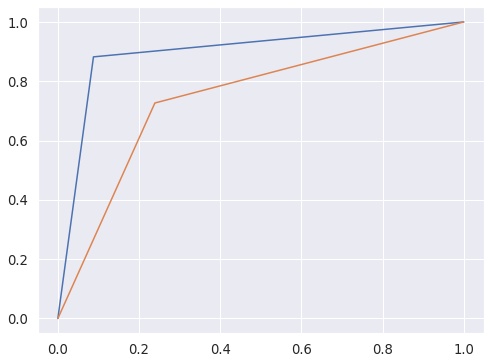

In [174]:

clf = LGBMClassifier(
        n_estimators=20000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model_lgbm = clf.fit(X_train_2, y_train_2)
# Predictions
predictions_1 = model_lgbm.predict(X_test_2)
print("Accuracy on training set: {}".format(model_lgbm.score(X_train_2, y_train_2)))
print("Accuracy on test set: {}".format(model_lgbm.score(X_test_2, y_test_2)))
print ("The confusion Matrix is ")
lgbm = confusion_matrix(y_test_2, predictions_1)
print(confusion_matrix(y_test_2, predictions_1))
print(classification_report(y_test_2, predictions_1))
fpr, tpr, thresholds = roc_curve(y_test_2, predictions_1)
auc = metrics.roc_auc_score(y_test_2, predictions_1)
plt.figure(figsize = (8,6))
plt.plot(fpr,tpr,label="LGBM Classifier, auc="+str(auc.round(3)))

from xgboost import plot_importance
xgb_clf = XGBClassifier(n_estimator = 20000,
                    learning_rate=0.10,
                    num_leaves=30)
model_xgb = xgb_clf.fit(X_train_2, y_train_2)
# Predictions
predictions_2 = model_xgb.predict(X_test_2)
print("Accuracy on training set: {}".format(model_xgb.score(X_train_2, y_train_2)))
print("Accuracy on test set: {}".format(model_xgb.score(X_test_2, y_test_2)))
print ("The confusion Matrix is ")
xgb = confusion_matrix(y_test_2, predictions_2)
print(confusion_matrix(y_test_2, predictions_2))
print(classification_report(y_test_2, predictions_2))
fpr, tpr, thresholds = roc_curve(y_test_2, predictions_2)
auc = metrics.roc_auc_score(y_test_2, predictions_2)

plt.plot(fpr,tpr,label="XGBoost Classifier, auc="+str(auc.round(3)))


clf_rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False).fit(X_train_2, y_train_2)

model_rf = clf_rf.fit(X_train_2, y_train_2)
# Predictions
predictions_3 = model_rf.predict(X_test_2)
print("Accuracy on training set: {}".format(model_rf.score(X_train_2, y_train_2)))
print("Accuracy on test set: {}".format(model_rf.score(X_test_2, y_test_2)))
print ("The confusion Matrix is ")
rf = confusion_matrix(y_test_2, predictions_3)
print(confusion_matrix(y_test_2, predictions_3))
print(classification_report(y_test_2, predictions_3))
fpr, tpr, thresholds = roc_curve(y_test_2, predictions_3)
auc = metrics.roc_auc_score(y_test_2, predictions_3)

plt.plot(fpr,tpr,label="RandomForest Classifier, auc="+str(auc.round(3)))


import sklearn
clf_dt = sklearn.tree.DecisionTreeClassifier()
#sklearn.svm.SVC
model_dt = clf_dt.fit(X_train_2, y_train_2)
# Predictions
predictions_4 = model_dt.predict(X_test_2)
print("Accuracy on training set: {}".format(model_dt.score(X_train_2, y_train_2)))
print("Accuracy on test set: {}".format(model_dt.score(X_test_2, y_test_2)))
print ("The confusion Matrix is ")
dt = confusion_matrix(y_test_2, predictions_4)
print(confusion_matrix(y_test_2, predictions_4))
print(classification_report(y_test_2, predictions_4))
fpr, tpr, thresholds = roc_curve(y_test_2, predictions_4)
auc = metrics.roc_auc_score(y_test_2, predictions_4)

plt.plot(fpr,tpr,label="DecisionTree Classifier, auc="+str(auc.round(3)))


plt.plot([0, 1], [0, 1], 'k--')
clf_lr = LogisticRegression(penalty='l2', C=100).fit(X_train_2, y_train_2)
predictions_5 = clf_lr.predict(X_test_2)
print("Accuracy on training set: {}".format(clf_lr.score(X_train_2, y_train_2)))
print("Accuracy on test set: {}".format(clf_lr.score(X_test_2, y_test_2)))
print("Confusion Matrix")
lr = confusion_matrix(y_test_2, predictions_5)
print(confusion_matrix(y_test_2, predictions_5))
print(classification_report(y_test_2, predictions_5))
fpr, tpr, thresholds = roc_curve(y_test_2, predictions_5)
auc = metrics.roc_auc_score(y_test_2, predictions_5)

plt.plot(fpr,tpr,label="Logistic regression l2 penalty, auc="+str(auc.round(3)))



import sklearn
from xgboost import plot_importance
clf_cb = CatBoostClassifier(iterations = 20000,
                            learning_rate = 0.5)

model_cb = clf_cb.fit(X_train_2, y_train_2)
# Predictions
predictions_6 = model_cb.predict(X_test_2)
print("Accuracy on training set: {}".format(model_cb.score(X_train_2, y_train_2)))
print("Accuracy on test set: {}".format(model_cb.score(X_test_2, y_test_2)))
print ("The confusion Matrix is ")
cb = confusion_matrix(y_test_2, predictions_6)
print(confusion_matrix(y_test_2, predictions_6))
print(classification_report(y_test_2, predictions_6))
fpr, tpr, thresholds = roc_curve(y_test_2, predictions_6)
auc = metrics.roc_auc_score(y_test_2, predictions_6)

plt.plot(fpr,tpr,label="CatBoost Classifier, auc="+str(auc.round(3)))




Accuracy on training set: 1.0
Accuracy on test set: 0.8876850071919236
The confusion Matrix is 
[[33679  3516]
 [ 4839 32355]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     37195
           1       0.90      0.87      0.89     37194

    accuracy                           0.89     74389
   macro avg       0.89      0.89      0.89     74389
weighted avg       0.89      0.89      0.89     74389

Accuracy on training set: 1.0
Accuracy on test set: 0.8096627189503824
The confusion Matrix is 
[[30185  7010]
 [ 7149 30045]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81     37195
           1       0.81      0.81      0.81     37194

    accuracy                           0.81     74389
   macro avg       0.81      0.81      0.81     74389
weighted avg       0.81      0.81      0.81     74389

Accuracy on training set: 0.6328354998722929
Accuracy on test set: 0.6301603731734531
Confus

131:	learn: 0.4753420	total: 13.6s	remaining: 34m 6s
132:	learn: 0.4750552	total: 13.7s	remaining: 34m 5s
133:	learn: 0.4748183	total: 13.8s	remaining: 34m 10s
134:	learn: 0.4744357	total: 13.9s	remaining: 34m 8s
135:	learn: 0.4740874	total: 14s	remaining: 34m 7s
136:	learn: 0.4737622	total: 14.1s	remaining: 34m 6s
137:	learn: 0.4733115	total: 14.2s	remaining: 34m 5s
138:	learn: 0.4730953	total: 14.3s	remaining: 34m 4s
139:	learn: 0.4727468	total: 14.4s	remaining: 34m 3s
140:	learn: 0.4724134	total: 14.5s	remaining: 34m 4s
141:	learn: 0.4720796	total: 14.6s	remaining: 34m 2s
142:	learn: 0.4717692	total: 14.7s	remaining: 34m 2s
143:	learn: 0.4714489	total: 14.8s	remaining: 34m 2s
144:	learn: 0.4712006	total: 14.9s	remaining: 34m 1s
145:	learn: 0.4709340	total: 15s	remaining: 34m
146:	learn: 0.4706352	total: 15.1s	remaining: 33m 59s
147:	learn: 0.4703324	total: 15.2s	remaining: 33m 58s
148:	learn: 0.4700170	total: 15.3s	remaining: 33m 58s
149:	learn: 0.4696943	total: 15.4s	remaining: 33m

285:	learn: 0.4343757	total: 29.5s	remaining: 33m 53s
286:	learn: 0.4340983	total: 29.6s	remaining: 33m 53s
287:	learn: 0.4338829	total: 29.7s	remaining: 33m 53s
288:	learn: 0.4337010	total: 29.8s	remaining: 33m 52s
289:	learn: 0.4334849	total: 29.9s	remaining: 33m 54s
290:	learn: 0.4332147	total: 30.2s	remaining: 34m 4s
291:	learn: 0.4330016	total: 30.4s	remaining: 34m 9s
292:	learn: 0.4328294	total: 30.5s	remaining: 34m 9s
293:	learn: 0.4325767	total: 30.6s	remaining: 34m 9s
294:	learn: 0.4324125	total: 30.7s	remaining: 34m 8s
295:	learn: 0.4321557	total: 30.8s	remaining: 34m 8s
296:	learn: 0.4319816	total: 30.9s	remaining: 34m 7s
297:	learn: 0.4317936	total: 31s	remaining: 34m 7s
298:	learn: 0.4315268	total: 31.1s	remaining: 34m 6s
299:	learn: 0.4313228	total: 31.2s	remaining: 34m 6s
300:	learn: 0.4311647	total: 31.3s	remaining: 34m 5s
301:	learn: 0.4308863	total: 31.3s	remaining: 34m 4s
302:	learn: 0.4306100	total: 31.4s	remaining: 34m 4s
303:	learn: 0.4304245	total: 31.5s	remainin

438:	learn: 0.4026520	total: 45.1s	remaining: 33m 30s
439:	learn: 0.4024134	total: 45.2s	remaining: 33m 30s
440:	learn: 0.4021677	total: 45.3s	remaining: 33m 30s
441:	learn: 0.4019349	total: 45.4s	remaining: 33m 29s
442:	learn: 0.4018016	total: 45.5s	remaining: 33m 29s
443:	learn: 0.4016495	total: 45.6s	remaining: 33m 28s
444:	learn: 0.4014683	total: 45.7s	remaining: 33m 28s
445:	learn: 0.4012934	total: 45.8s	remaining: 33m 28s
446:	learn: 0.4011386	total: 45.9s	remaining: 33m 27s
447:	learn: 0.4008964	total: 46s	remaining: 33m 27s
448:	learn: 0.4006587	total: 46.1s	remaining: 33m 27s
449:	learn: 0.4004569	total: 46.2s	remaining: 33m 27s
450:	learn: 0.4002244	total: 46.3s	remaining: 33m 27s
451:	learn: 0.4001039	total: 46.4s	remaining: 33m 26s
452:	learn: 0.3999091	total: 46.5s	remaining: 33m 25s
453:	learn: 0.3996713	total: 46.6s	remaining: 33m 26s
454:	learn: 0.3995199	total: 46.7s	remaining: 33m 25s
455:	learn: 0.3993333	total: 46.8s	remaining: 33m 24s
456:	learn: 0.3991855	total: 4

592:	learn: 0.3762283	total: 1m 2s	remaining: 34m
593:	learn: 0.3760558	total: 1m 2s	remaining: 34m
594:	learn: 0.3759046	total: 1m 2s	remaining: 34m
595:	learn: 0.3757856	total: 1m 2s	remaining: 34m
596:	learn: 0.3755820	total: 1m 2s	remaining: 33m 59s
597:	learn: 0.3754547	total: 1m 2s	remaining: 33m 59s
598:	learn: 0.3753534	total: 1m 2s	remaining: 33m 59s
599:	learn: 0.3752416	total: 1m 3s	remaining: 33m 59s
600:	learn: 0.3751295	total: 1m 3s	remaining: 33m 59s
601:	learn: 0.3749690	total: 1m 3s	remaining: 34m 1s
602:	learn: 0.3748566	total: 1m 3s	remaining: 34m 1s
603:	learn: 0.3747005	total: 1m 3s	remaining: 34m 2s
604:	learn: 0.3744998	total: 1m 3s	remaining: 34m 1s
605:	learn: 0.3743503	total: 1m 3s	remaining: 34m 1s
606:	learn: 0.3741655	total: 1m 3s	remaining: 34m 1s
607:	learn: 0.3739906	total: 1m 4s	remaining: 34m 1s
608:	learn: 0.3738061	total: 1m 4s	remaining: 34m
609:	learn: 0.3736344	total: 1m 4s	remaining: 34m
610:	learn: 0.3734275	total: 1m 4s	remaining: 34m
611:	lear

744:	learn: 0.3531871	total: 1m 18s	remaining: 33m 38s
745:	learn: 0.3530509	total: 1m 18s	remaining: 33m 37s
746:	learn: 0.3529233	total: 1m 18s	remaining: 33m 37s
747:	learn: 0.3528053	total: 1m 18s	remaining: 33m 37s
748:	learn: 0.3526260	total: 1m 18s	remaining: 33m 36s
749:	learn: 0.3524971	total: 1m 18s	remaining: 33m 36s
750:	learn: 0.3523028	total: 1m 18s	remaining: 33m 36s
751:	learn: 0.3521322	total: 1m 18s	remaining: 33m 36s
752:	learn: 0.3519733	total: 1m 18s	remaining: 33m 35s
753:	learn: 0.3518225	total: 1m 18s	remaining: 33m 35s
754:	learn: 0.3515896	total: 1m 19s	remaining: 33m 35s
755:	learn: 0.3514422	total: 1m 19s	remaining: 33m 35s
756:	learn: 0.3513124	total: 1m 19s	remaining: 33m 35s
757:	learn: 0.3511606	total: 1m 19s	remaining: 33m 34s
758:	learn: 0.3510433	total: 1m 19s	remaining: 33m 34s
759:	learn: 0.3508529	total: 1m 19s	remaining: 33m 34s
760:	learn: 0.3507085	total: 1m 19s	remaining: 33m 34s
761:	learn: 0.3505377	total: 1m 19s	remaining: 33m 34s
762:	learn

894:	learn: 0.3319378	total: 1m 34s	remaining: 33m 30s
895:	learn: 0.3317259	total: 1m 34s	remaining: 33m 31s
896:	learn: 0.3316344	total: 1m 34s	remaining: 33m 32s
897:	learn: 0.3314847	total: 1m 34s	remaining: 33m 32s
898:	learn: 0.3313361	total: 1m 34s	remaining: 33m 32s
899:	learn: 0.3312057	total: 1m 34s	remaining: 33m 32s
900:	learn: 0.3310757	total: 1m 34s	remaining: 33m 32s
901:	learn: 0.3309420	total: 1m 35s	remaining: 33m 32s
902:	learn: 0.3308442	total: 1m 35s	remaining: 33m 31s
903:	learn: 0.3307291	total: 1m 35s	remaining: 33m 31s
904:	learn: 0.3305789	total: 1m 35s	remaining: 33m 31s
905:	learn: 0.3304439	total: 1m 35s	remaining: 33m 31s
906:	learn: 0.3303230	total: 1m 35s	remaining: 33m 31s
907:	learn: 0.3301698	total: 1m 35s	remaining: 33m 31s
908:	learn: 0.3300517	total: 1m 35s	remaining: 33m 30s
909:	learn: 0.3299557	total: 1m 35s	remaining: 33m 30s
910:	learn: 0.3298559	total: 1m 35s	remaining: 33m 30s
911:	learn: 0.3297705	total: 1m 36s	remaining: 33m 30s
912:	learn

1044:	learn: 0.3129784	total: 1m 50s	remaining: 33m 18s
1045:	learn: 0.3128542	total: 1m 50s	remaining: 33m 19s
1046:	learn: 0.3127405	total: 1m 50s	remaining: 33m 21s
1047:	learn: 0.3126183	total: 1m 50s	remaining: 33m 21s
1048:	learn: 0.3125143	total: 1m 50s	remaining: 33m 21s
1049:	learn: 0.3124013	total: 1m 50s	remaining: 33m 20s
1050:	learn: 0.3122645	total: 1m 50s	remaining: 33m 20s
1051:	learn: 0.3120965	total: 1m 51s	remaining: 33m 20s
1052:	learn: 0.3119451	total: 1m 51s	remaining: 33m 20s
1053:	learn: 0.3118152	total: 1m 51s	remaining: 33m 19s
1054:	learn: 0.3116743	total: 1m 51s	remaining: 33m 19s
1055:	learn: 0.3115837	total: 1m 51s	remaining: 33m 19s
1056:	learn: 0.3114677	total: 1m 51s	remaining: 33m 19s
1057:	learn: 0.3113192	total: 1m 51s	remaining: 33m 19s
1058:	learn: 0.3111828	total: 1m 51s	remaining: 33m 19s
1059:	learn: 0.3110528	total: 1m 51s	remaining: 33m 19s
1060:	learn: 0.3109336	total: 1m 51s	remaining: 33m 18s
1061:	learn: 0.3107869	total: 1m 52s	remaining: 

1193:	learn: 0.2949694	total: 2m 6s	remaining: 33m 19s
1194:	learn: 0.2948654	total: 2m 7s	remaining: 33m 19s
1195:	learn: 0.2947446	total: 2m 7s	remaining: 33m 19s
1196:	learn: 0.2945775	total: 2m 7s	remaining: 33m 19s
1197:	learn: 0.2944648	total: 2m 7s	remaining: 33m 18s
1198:	learn: 0.2944047	total: 2m 7s	remaining: 33m 18s
1199:	learn: 0.2942887	total: 2m 7s	remaining: 33m 18s
1200:	learn: 0.2941942	total: 2m 7s	remaining: 33m 18s
1201:	learn: 0.2940855	total: 2m 7s	remaining: 33m 18s
1202:	learn: 0.2939702	total: 2m 7s	remaining: 33m 18s
1203:	learn: 0.2938894	total: 2m 7s	remaining: 33m 17s
1204:	learn: 0.2937541	total: 2m 8s	remaining: 33m 17s
1205:	learn: 0.2936537	total: 2m 8s	remaining: 33m 17s
1206:	learn: 0.2935402	total: 2m 8s	remaining: 33m 17s
1207:	learn: 0.2934109	total: 2m 8s	remaining: 33m 17s
1208:	learn: 0.2932999	total: 2m 8s	remaining: 33m 17s
1209:	learn: 0.2931919	total: 2m 8s	remaining: 33m 17s
1210:	learn: 0.2930979	total: 2m 8s	remaining: 33m 16s
1211:	lear

1342:	learn: 0.2791638	total: 2m 22s	remaining: 33m
1343:	learn: 0.2791087	total: 2m 22s	remaining: 32m 59s
1344:	learn: 0.2790233	total: 2m 22s	remaining: 32m 59s
1345:	learn: 0.2789244	total: 2m 22s	remaining: 32m 59s
1346:	learn: 0.2788211	total: 2m 22s	remaining: 32m 59s
1347:	learn: 0.2787397	total: 2m 23s	remaining: 32m 58s
1348:	learn: 0.2786552	total: 2m 23s	remaining: 32m 58s
1349:	learn: 0.2785658	total: 2m 23s	remaining: 32m 58s
1350:	learn: 0.2784644	total: 2m 23s	remaining: 32m 58s
1351:	learn: 0.2783650	total: 2m 23s	remaining: 32m 58s
1352:	learn: 0.2782364	total: 2m 23s	remaining: 32m 58s
1353:	learn: 0.2781489	total: 2m 23s	remaining: 32m 58s
1354:	learn: 0.2780463	total: 2m 23s	remaining: 32m 57s
1355:	learn: 0.2779500	total: 2m 23s	remaining: 32m 57s
1356:	learn: 0.2778509	total: 2m 23s	remaining: 32m 57s
1357:	learn: 0.2777898	total: 2m 24s	remaining: 32m 57s
1358:	learn: 0.2777152	total: 2m 24s	remaining: 32m 57s
1359:	learn: 0.2776216	total: 2m 24s	remaining: 32m 

1491:	learn: 0.2645545	total: 2m 38s	remaining: 32m 44s
1492:	learn: 0.2644293	total: 2m 38s	remaining: 32m 45s
1493:	learn: 0.2643319	total: 2m 38s	remaining: 32m 46s
1494:	learn: 0.2642675	total: 2m 38s	remaining: 32m 48s
1495:	learn: 0.2641865	total: 2m 39s	remaining: 32m 48s
1496:	learn: 0.2640740	total: 2m 39s	remaining: 32m 48s
1497:	learn: 0.2639720	total: 2m 39s	remaining: 32m 48s
1498:	learn: 0.2638682	total: 2m 39s	remaining: 32m 48s
1499:	learn: 0.2637528	total: 2m 39s	remaining: 32m 47s
1500:	learn: 0.2636442	total: 2m 39s	remaining: 32m 47s
1501:	learn: 0.2635692	total: 2m 39s	remaining: 32m 47s
1502:	learn: 0.2634965	total: 2m 39s	remaining: 32m 47s
1503:	learn: 0.2633819	total: 2m 39s	remaining: 32m 47s
1504:	learn: 0.2632779	total: 2m 40s	remaining: 32m 47s
1505:	learn: 0.2631718	total: 2m 40s	remaining: 32m 47s
1506:	learn: 0.2630787	total: 2m 40s	remaining: 32m 46s
1507:	learn: 0.2630159	total: 2m 40s	remaining: 32m 46s
1508:	learn: 0.2629357	total: 2m 40s	remaining: 

1638:	learn: 0.2507470	total: 2m 54s	remaining: 32m 38s
1639:	learn: 0.2506657	total: 2m 54s	remaining: 32m 38s
1640:	learn: 0.2505578	total: 2m 55s	remaining: 32m 38s
1641:	learn: 0.2504970	total: 2m 55s	remaining: 32m 38s
1642:	learn: 0.2503997	total: 2m 55s	remaining: 32m 37s
1643:	learn: 0.2503028	total: 2m 55s	remaining: 32m 37s
1644:	learn: 0.2502203	total: 2m 55s	remaining: 32m 38s
1645:	learn: 0.2501303	total: 2m 55s	remaining: 32m 37s
1646:	learn: 0.2500206	total: 2m 55s	remaining: 32m 37s
1647:	learn: 0.2499529	total: 2m 55s	remaining: 32m 37s
1648:	learn: 0.2498805	total: 2m 56s	remaining: 32m 38s
1649:	learn: 0.2497806	total: 2m 56s	remaining: 32m 38s
1650:	learn: 0.2496772	total: 2m 56s	remaining: 32m 38s
1651:	learn: 0.2495840	total: 2m 56s	remaining: 32m 38s
1652:	learn: 0.2495100	total: 2m 56s	remaining: 32m 38s
1653:	learn: 0.2494033	total: 2m 56s	remaining: 32m 38s
1654:	learn: 0.2493035	total: 2m 56s	remaining: 32m 37s
1655:	learn: 0.2491923	total: 2m 56s	remaining: 

1788:	learn: 0.2375719	total: 3m 11s	remaining: 32m 26s
1789:	learn: 0.2375176	total: 3m 11s	remaining: 32m 25s
1790:	learn: 0.2374097	total: 3m 11s	remaining: 32m 25s
1791:	learn: 0.2373090	total: 3m 11s	remaining: 32m 26s
1792:	learn: 0.2372092	total: 3m 11s	remaining: 32m 27s
1793:	learn: 0.2371560	total: 3m 11s	remaining: 32m 28s
1794:	learn: 0.2370652	total: 3m 12s	remaining: 32m 29s
1795:	learn: 0.2369984	total: 3m 12s	remaining: 32m 29s
1796:	learn: 0.2369433	total: 3m 12s	remaining: 32m 29s
1797:	learn: 0.2368930	total: 3m 12s	remaining: 32m 29s
1798:	learn: 0.2368184	total: 3m 12s	remaining: 32m 29s
1799:	learn: 0.2367413	total: 3m 12s	remaining: 32m 28s
1800:	learn: 0.2366680	total: 3m 12s	remaining: 32m 28s
1801:	learn: 0.2365801	total: 3m 12s	remaining: 32m 28s
1802:	learn: 0.2364570	total: 3m 13s	remaining: 32m 28s
1803:	learn: 0.2363983	total: 3m 13s	remaining: 32m 28s
1804:	learn: 0.2362711	total: 3m 13s	remaining: 32m 28s
1805:	learn: 0.2361929	total: 3m 13s	remaining: 

1935:	learn: 0.2255721	total: 3m 26s	remaining: 32m 10s
1936:	learn: 0.2254984	total: 3m 27s	remaining: 32m 10s
1937:	learn: 0.2254201	total: 3m 27s	remaining: 32m 10s
1938:	learn: 0.2253348	total: 3m 27s	remaining: 32m 10s
1939:	learn: 0.2252510	total: 3m 27s	remaining: 32m 10s
1940:	learn: 0.2252065	total: 3m 27s	remaining: 32m 9s
1941:	learn: 0.2251268	total: 3m 27s	remaining: 32m 9s
1942:	learn: 0.2250587	total: 3m 27s	remaining: 32m 9s
1943:	learn: 0.2249736	total: 3m 27s	remaining: 32m 9s
1944:	learn: 0.2249154	total: 3m 27s	remaining: 32m 9s
1945:	learn: 0.2248590	total: 3m 27s	remaining: 32m 8s
1946:	learn: 0.2248301	total: 3m 28s	remaining: 32m 8s
1947:	learn: 0.2247669	total: 3m 28s	remaining: 32m 8s
1948:	learn: 0.2246808	total: 3m 28s	remaining: 32m 8s
1949:	learn: 0.2246113	total: 3m 28s	remaining: 32m 8s
1950:	learn: 0.2245363	total: 3m 28s	remaining: 32m 8s
1951:	learn: 0.2244779	total: 3m 28s	remaining: 32m 7s
1952:	learn: 0.2243834	total: 3m 28s	remaining: 32m 7s
1953:

2084:	learn: 0.2145361	total: 3m 42s	remaining: 31m 52s
2085:	learn: 0.2144432	total: 3m 42s	remaining: 31m 52s
2086:	learn: 0.2143471	total: 3m 42s	remaining: 31m 52s
2087:	learn: 0.2142478	total: 3m 42s	remaining: 31m 52s
2088:	learn: 0.2142005	total: 3m 43s	remaining: 31m 52s
2089:	learn: 0.2140927	total: 3m 43s	remaining: 31m 52s
2090:	learn: 0.2140147	total: 3m 43s	remaining: 31m 52s
2091:	learn: 0.2139378	total: 3m 43s	remaining: 31m 52s
2092:	learn: 0.2138860	total: 3m 43s	remaining: 31m 52s
2093:	learn: 0.2138261	total: 3m 43s	remaining: 31m 52s
2094:	learn: 0.2137249	total: 3m 43s	remaining: 31m 51s
2095:	learn: 0.2136269	total: 3m 43s	remaining: 31m 51s
2096:	learn: 0.2135520	total: 3m 43s	remaining: 31m 51s
2097:	learn: 0.2134754	total: 3m 44s	remaining: 31m 51s
2098:	learn: 0.2134299	total: 3m 44s	remaining: 31m 51s
2099:	learn: 0.2133745	total: 3m 44s	remaining: 31m 51s
2100:	learn: 0.2132784	total: 3m 44s	remaining: 31m 51s
2101:	learn: 0.2132276	total: 3m 44s	remaining: 

2231:	learn: 0.2041951	total: 3m 59s	remaining: 31m 47s
2232:	learn: 0.2041438	total: 3m 59s	remaining: 31m 47s
2233:	learn: 0.2040832	total: 3m 59s	remaining: 31m 46s
2234:	learn: 0.2040289	total: 3m 59s	remaining: 31m 46s
2235:	learn: 0.2039571	total: 3m 59s	remaining: 31m 46s
2236:	learn: 0.2038725	total: 4m	remaining: 31m 46s
2237:	learn: 0.2038151	total: 4m	remaining: 31m 46s
2238:	learn: 0.2037769	total: 4m	remaining: 31m 46s
2239:	learn: 0.2037372	total: 4m	remaining: 31m 45s
2240:	learn: 0.2036993	total: 4m	remaining: 31m 45s
2241:	learn: 0.2036490	total: 4m	remaining: 31m 45s
2242:	learn: 0.2036107	total: 4m	remaining: 31m 45s
2243:	learn: 0.2035321	total: 4m	remaining: 31m 45s
2244:	learn: 0.2034755	total: 4m	remaining: 31m 45s
2245:	learn: 0.2033627	total: 4m 1s	remaining: 31m 45s
2246:	learn: 0.2032789	total: 4m 1s	remaining: 31m 44s
2247:	learn: 0.2032315	total: 4m 1s	remaining: 31m 44s
2248:	learn: 0.2031556	total: 4m 1s	remaining: 31m 44s
2249:	learn: 0.2030886	total: 4m

2381:	learn: 0.1940610	total: 4m 15s	remaining: 31m 30s
2382:	learn: 0.1939826	total: 4m 15s	remaining: 31m 30s
2383:	learn: 0.1939079	total: 4m 15s	remaining: 31m 30s
2384:	learn: 0.1937924	total: 4m 15s	remaining: 31m 30s
2385:	learn: 0.1937293	total: 4m 16s	remaining: 31m 30s
2386:	learn: 0.1936931	total: 4m 16s	remaining: 31m 30s
2387:	learn: 0.1936413	total: 4m 16s	remaining: 31m 30s
2388:	learn: 0.1935944	total: 4m 16s	remaining: 31m 29s
2389:	learn: 0.1935145	total: 4m 16s	remaining: 31m 29s
2390:	learn: 0.1934137	total: 4m 16s	remaining: 31m 29s
2391:	learn: 0.1933409	total: 4m 16s	remaining: 31m 29s
2392:	learn: 0.1932620	total: 4m 16s	remaining: 31m 29s
2393:	learn: 0.1932083	total: 4m 16s	remaining: 31m 29s
2394:	learn: 0.1932083	total: 4m 16s	remaining: 31m 28s
2395:	learn: 0.1931456	total: 4m 17s	remaining: 31m 28s
2396:	learn: 0.1930855	total: 4m 17s	remaining: 31m 28s
2397:	learn: 0.1930189	total: 4m 17s	remaining: 31m 28s
2398:	learn: 0.1929909	total: 4m 17s	remaining: 

2529:	learn: 0.1853827	total: 4m 31s	remaining: 31m 13s
2530:	learn: 0.1853260	total: 4m 31s	remaining: 31m 13s
2531:	learn: 0.1852954	total: 4m 31s	remaining: 31m 13s
2532:	learn: 0.1852572	total: 4m 31s	remaining: 31m 13s
2533:	learn: 0.1852126	total: 4m 31s	remaining: 31m 13s
2534:	learn: 0.1851755	total: 4m 31s	remaining: 31m 13s
2535:	learn: 0.1851241	total: 4m 31s	remaining: 31m 12s
2536:	learn: 0.1850723	total: 4m 32s	remaining: 31m 12s
2537:	learn: 0.1850066	total: 4m 32s	remaining: 31m 12s
2538:	learn: 0.1849359	total: 4m 32s	remaining: 31m 12s
2539:	learn: 0.1848723	total: 4m 32s	remaining: 31m 12s
2540:	learn: 0.1848307	total: 4m 32s	remaining: 31m 12s
2541:	learn: 0.1847421	total: 4m 32s	remaining: 31m 12s
2542:	learn: 0.1846615	total: 4m 32s	remaining: 31m 11s
2543:	learn: 0.1845873	total: 4m 32s	remaining: 31m 11s
2544:	learn: 0.1845420	total: 4m 32s	remaining: 31m 11s
2545:	learn: 0.1844867	total: 4m 32s	remaining: 31m 11s
2546:	learn: 0.1844601	total: 4m 33s	remaining: 

2679:	learn: 0.1767421	total: 4m 47s	remaining: 30m 56s
2680:	learn: 0.1766768	total: 4m 47s	remaining: 30m 56s
2681:	learn: 0.1766380	total: 4m 47s	remaining: 30m 56s
2682:	learn: 0.1765934	total: 4m 47s	remaining: 30m 57s
2683:	learn: 0.1765341	total: 4m 47s	remaining: 30m 57s
2684:	learn: 0.1764897	total: 4m 48s	remaining: 30m 57s
2685:	learn: 0.1764311	total: 4m 48s	remaining: 30m 58s
2686:	learn: 0.1763944	total: 4m 48s	remaining: 30m 57s
2687:	learn: 0.1763579	total: 4m 48s	remaining: 30m 57s
2688:	learn: 0.1762742	total: 4m 48s	remaining: 30m 57s
2689:	learn: 0.1761809	total: 4m 48s	remaining: 30m 57s
2690:	learn: 0.1761375	total: 4m 48s	remaining: 30m 57s
2691:	learn: 0.1760933	total: 4m 48s	remaining: 30m 57s
2692:	learn: 0.1760528	total: 4m 48s	remaining: 30m 56s
2693:	learn: 0.1760041	total: 4m 49s	remaining: 30m 56s
2694:	learn: 0.1759186	total: 4m 49s	remaining: 30m 56s
2695:	learn: 0.1758392	total: 4m 49s	remaining: 30m 56s
2696:	learn: 0.1757882	total: 4m 49s	remaining: 

2827:	learn: 0.1682638	total: 5m 4s	remaining: 30m 47s
2828:	learn: 0.1682013	total: 5m 4s	remaining: 30m 47s
2829:	learn: 0.1681690	total: 5m 4s	remaining: 30m 47s
2830:	learn: 0.1681394	total: 5m 4s	remaining: 30m 47s
2831:	learn: 0.1680865	total: 5m 4s	remaining: 30m 47s
2832:	learn: 0.1680468	total: 5m 4s	remaining: 30m 47s
2833:	learn: 0.1679979	total: 5m 4s	remaining: 30m 47s
2834:	learn: 0.1679287	total: 5m 5s	remaining: 30m 47s
2835:	learn: 0.1678642	total: 5m 5s	remaining: 30m 47s
2836:	learn: 0.1678293	total: 5m 5s	remaining: 30m 46s
2837:	learn: 0.1677644	total: 5m 5s	remaining: 30m 46s
2838:	learn: 0.1676970	total: 5m 5s	remaining: 30m 46s
2839:	learn: 0.1676322	total: 5m 5s	remaining: 30m 46s
2840:	learn: 0.1675905	total: 5m 5s	remaining: 30m 46s
2841:	learn: 0.1675340	total: 5m 5s	remaining: 30m 46s
2842:	learn: 0.1674801	total: 5m 5s	remaining: 30m 46s
2843:	learn: 0.1674307	total: 5m 6s	remaining: 30m 45s
2844:	learn: 0.1673706	total: 5m 6s	remaining: 30m 45s
2845:	lear

2977:	learn: 0.1602492	total: 5m 20s	remaining: 30m 31s
2978:	learn: 0.1602122	total: 5m 20s	remaining: 30m 31s
2979:	learn: 0.1601703	total: 5m 20s	remaining: 30m 30s
2980:	learn: 0.1601039	total: 5m 20s	remaining: 30m 30s
2981:	learn: 0.1600657	total: 5m 20s	remaining: 30m 30s
2982:	learn: 0.1599965	total: 5m 20s	remaining: 30m 30s
2983:	learn: 0.1599263	total: 5m 20s	remaining: 30m 30s
2984:	learn: 0.1598709	total: 5m 21s	remaining: 30m 30s
2985:	learn: 0.1597924	total: 5m 21s	remaining: 30m 30s
2986:	learn: 0.1597335	total: 5m 21s	remaining: 30m 29s
2987:	learn: 0.1596871	total: 5m 21s	remaining: 30m 29s
2988:	learn: 0.1596360	total: 5m 21s	remaining: 30m 29s
2989:	learn: 0.1595820	total: 5m 21s	remaining: 30m 29s
2990:	learn: 0.1595325	total: 5m 21s	remaining: 30m 29s
2991:	learn: 0.1595196	total: 5m 21s	remaining: 30m 29s
2992:	learn: 0.1594636	total: 5m 21s	remaining: 30m 28s
2993:	learn: 0.1593926	total: 5m 21s	remaining: 30m 28s
2994:	learn: 0.1593665	total: 5m 22s	remaining: 

3124:	learn: 0.1529643	total: 5m 36s	remaining: 30m 14s
3125:	learn: 0.1529148	total: 5m 36s	remaining: 30m 14s
3126:	learn: 0.1528573	total: 5m 36s	remaining: 30m 14s
3127:	learn: 0.1528022	total: 5m 36s	remaining: 30m 14s
3128:	learn: 0.1527592	total: 5m 36s	remaining: 30m 14s
3129:	learn: 0.1527171	total: 5m 36s	remaining: 30m 13s
3130:	learn: 0.1526721	total: 5m 36s	remaining: 30m 13s
3131:	learn: 0.1526058	total: 5m 36s	remaining: 30m 13s
3132:	learn: 0.1525630	total: 5m 36s	remaining: 30m 13s
3133:	learn: 0.1525398	total: 5m 36s	remaining: 30m 13s
3134:	learn: 0.1524985	total: 5m 37s	remaining: 30m 13s
3135:	learn: 0.1524489	total: 5m 37s	remaining: 30m 13s
3136:	learn: 0.1523897	total: 5m 37s	remaining: 30m 12s
3137:	learn: 0.1523268	total: 5m 37s	remaining: 30m 12s
3138:	learn: 0.1522784	total: 5m 37s	remaining: 30m 12s
3139:	learn: 0.1522274	total: 5m 37s	remaining: 30m 12s
3140:	learn: 0.1521907	total: 5m 37s	remaining: 30m 12s
3141:	learn: 0.1521521	total: 5m 37s	remaining: 

3274:	learn: 0.1459816	total: 5m 52s	remaining: 30m
3275:	learn: 0.1459363	total: 5m 52s	remaining: 30m
3276:	learn: 0.1458975	total: 5m 52s	remaining: 30m
3277:	learn: 0.1458650	total: 5m 52s	remaining: 30m
3278:	learn: 0.1458213	total: 5m 53s	remaining: 30m
3279:	learn: 0.1457651	total: 5m 53s	remaining: 30m
3280:	learn: 0.1457128	total: 5m 53s	remaining: 30m
3281:	learn: 0.1456933	total: 5m 53s	remaining: 30m
3282:	learn: 0.1456340	total: 5m 53s	remaining: 30m
3283:	learn: 0.1455671	total: 5m 53s	remaining: 29m 59s
3284:	learn: 0.1455315	total: 5m 53s	remaining: 29m 59s
3285:	learn: 0.1454926	total: 5m 53s	remaining: 29m 59s
3286:	learn: 0.1454353	total: 5m 53s	remaining: 29m 59s
3287:	learn: 0.1454090	total: 5m 54s	remaining: 29m 59s
3288:	learn: 0.1453765	total: 5m 54s	remaining: 29m 59s
3289:	learn: 0.1453323	total: 5m 54s	remaining: 29m 59s
3290:	learn: 0.1452971	total: 5m 54s	remaining: 29m 58s
3291:	learn: 0.1452427	total: 5m 54s	remaining: 29m 58s
3292:	learn: 0.1451862	total

3424:	learn: 0.1392802	total: 6m 9s	remaining: 29m 46s
3425:	learn: 0.1392169	total: 6m 9s	remaining: 29m 45s
3426:	learn: 0.1391825	total: 6m 9s	remaining: 29m 45s
3427:	learn: 0.1391402	total: 6m 9s	remaining: 29m 45s
3428:	learn: 0.1391077	total: 6m 9s	remaining: 29m 45s
3429:	learn: 0.1390724	total: 6m 9s	remaining: 29m 45s
3430:	learn: 0.1390160	total: 6m 9s	remaining: 29m 45s
3431:	learn: 0.1389747	total: 6m 9s	remaining: 29m 45s
3432:	learn: 0.1389329	total: 6m 9s	remaining: 29m 44s
3433:	learn: 0.1388803	total: 6m 9s	remaining: 29m 44s
3434:	learn: 0.1388285	total: 6m 10s	remaining: 29m 44s
3435:	learn: 0.1387799	total: 6m 10s	remaining: 29m 44s
3436:	learn: 0.1387247	total: 6m 10s	remaining: 29m 44s
3437:	learn: 0.1386757	total: 6m 10s	remaining: 29m 44s
3438:	learn: 0.1386142	total: 6m 10s	remaining: 29m 44s
3439:	learn: 0.1385477	total: 6m 10s	remaining: 29m 44s
3440:	learn: 0.1385158	total: 6m 10s	remaining: 29m 43s
3441:	learn: 0.1384771	total: 6m 10s	remaining: 29m 43s
34

3572:	learn: 0.1329286	total: 6m 24s	remaining: 29m 29s
3573:	learn: 0.1328917	total: 6m 24s	remaining: 29m 29s
3574:	learn: 0.1328615	total: 6m 25s	remaining: 29m 29s
3575:	learn: 0.1328204	total: 6m 25s	remaining: 29m 28s
3576:	learn: 0.1327896	total: 6m 25s	remaining: 29m 28s
3577:	learn: 0.1327639	total: 6m 25s	remaining: 29m 28s
3578:	learn: 0.1326990	total: 6m 25s	remaining: 29m 28s
3579:	learn: 0.1326610	total: 6m 25s	remaining: 29m 28s
3580:	learn: 0.1326381	total: 6m 25s	remaining: 29m 28s
3581:	learn: 0.1325767	total: 6m 25s	remaining: 29m 28s
3582:	learn: 0.1325461	total: 6m 25s	remaining: 29m 27s
3583:	learn: 0.1324949	total: 6m 25s	remaining: 29m 27s
3584:	learn: 0.1324559	total: 6m 26s	remaining: 29m 27s
3585:	learn: 0.1324252	total: 6m 26s	remaining: 29m 27s
3586:	learn: 0.1324040	total: 6m 26s	remaining: 29m 27s
3587:	learn: 0.1323506	total: 6m 26s	remaining: 29m 27s
3588:	learn: 0.1322940	total: 6m 26s	remaining: 29m 27s
3589:	learn: 0.1322511	total: 6m 26s	remaining: 

3719:	learn: 0.1270796	total: 6m 40s	remaining: 29m 11s
3720:	learn: 0.1270294	total: 6m 40s	remaining: 29m 10s
3721:	learn: 0.1270179	total: 6m 40s	remaining: 29m 11s
3722:	learn: 0.1269791	total: 6m 40s	remaining: 29m 11s
3723:	learn: 0.1269321	total: 6m 40s	remaining: 29m 11s
3724:	learn: 0.1269145	total: 6m 40s	remaining: 29m 11s
3725:	learn: 0.1268845	total: 6m 41s	remaining: 29m 11s
3726:	learn: 0.1268238	total: 6m 41s	remaining: 29m 11s
3727:	learn: 0.1267816	total: 6m 41s	remaining: 29m 11s
3728:	learn: 0.1267274	total: 6m 41s	remaining: 29m 11s
3729:	learn: 0.1267020	total: 6m 41s	remaining: 29m 11s
3730:	learn: 0.1266540	total: 6m 41s	remaining: 29m 11s
3731:	learn: 0.1266145	total: 6m 41s	remaining: 29m 10s
3732:	learn: 0.1265676	total: 6m 41s	remaining: 29m 10s
3733:	learn: 0.1265041	total: 6m 41s	remaining: 29m 10s
3734:	learn: 0.1264679	total: 6m 41s	remaining: 29m 10s
3735:	learn: 0.1264212	total: 6m 42s	remaining: 29m 10s
3736:	learn: 0.1263723	total: 6m 42s	remaining: 

3869:	learn: 0.1213933	total: 6m 57s	remaining: 28m 59s
3870:	learn: 0.1213305	total: 6m 57s	remaining: 28m 59s
3871:	learn: 0.1213059	total: 6m 57s	remaining: 28m 59s
3872:	learn: 0.1212764	total: 6m 57s	remaining: 28m 58s
3873:	learn: 0.1212357	total: 6m 57s	remaining: 28m 58s
3874:	learn: 0.1212029	total: 6m 57s	remaining: 28m 58s
3875:	learn: 0.1211563	total: 6m 57s	remaining: 28m 58s
3876:	learn: 0.1211154	total: 6m 58s	remaining: 28m 58s
3877:	learn: 0.1210683	total: 6m 58s	remaining: 28m 58s
3878:	learn: 0.1210194	total: 6m 58s	remaining: 28m 58s
3879:	learn: 0.1209749	total: 6m 58s	remaining: 28m 58s
3880:	learn: 0.1209500	total: 6m 58s	remaining: 28m 58s
3881:	learn: 0.1208949	total: 6m 58s	remaining: 28m 58s
3882:	learn: 0.1208560	total: 6m 58s	remaining: 28m 58s
3883:	learn: 0.1208286	total: 6m 58s	remaining: 28m 57s
3884:	learn: 0.1207742	total: 6m 58s	remaining: 28m 57s
3885:	learn: 0.1207440	total: 6m 59s	remaining: 28m 57s
3886:	learn: 0.1207027	total: 6m 59s	remaining: 

4019:	learn: 0.1158217	total: 7m 13s	remaining: 28m 42s
4020:	learn: 0.1158035	total: 7m 13s	remaining: 28m 43s
4021:	learn: 0.1157662	total: 7m 13s	remaining: 28m 43s
4022:	learn: 0.1157277	total: 7m 13s	remaining: 28m 43s
4023:	learn: 0.1156816	total: 7m 14s	remaining: 28m 43s
4024:	learn: 0.1156504	total: 7m 14s	remaining: 28m 43s
4025:	learn: 0.1156000	total: 7m 14s	remaining: 28m 43s
4026:	learn: 0.1155548	total: 7m 14s	remaining: 28m 43s
4027:	learn: 0.1155214	total: 7m 14s	remaining: 28m 42s
4028:	learn: 0.1154893	total: 7m 14s	remaining: 28m 42s
4029:	learn: 0.1154577	total: 7m 14s	remaining: 28m 42s
4030:	learn: 0.1154325	total: 7m 14s	remaining: 28m 42s
4031:	learn: 0.1154002	total: 7m 14s	remaining: 28m 42s
4032:	learn: 0.1153545	total: 7m 15s	remaining: 28m 42s
4033:	learn: 0.1153176	total: 7m 15s	remaining: 28m 42s
4034:	learn: 0.1153010	total: 7m 15s	remaining: 28m 41s
4035:	learn: 0.1152621	total: 7m 15s	remaining: 28m 41s
4036:	learn: 0.1152191	total: 7m 15s	remaining: 

4167:	learn: 0.1106970	total: 7m 29s	remaining: 28m 26s
4168:	learn: 0.1106526	total: 7m 29s	remaining: 28m 26s
4169:	learn: 0.1106257	total: 7m 29s	remaining: 28m 26s
4170:	learn: 0.1106014	total: 7m 29s	remaining: 28m 26s
4171:	learn: 0.1105757	total: 7m 29s	remaining: 28m 26s
4172:	learn: 0.1105282	total: 7m 29s	remaining: 28m 26s
4173:	learn: 0.1104928	total: 7m 29s	remaining: 28m 26s
4174:	learn: 0.1104644	total: 7m 30s	remaining: 28m 25s
4175:	learn: 0.1104394	total: 7m 30s	remaining: 28m 25s
4176:	learn: 0.1104161	total: 7m 30s	remaining: 28m 25s
4177:	learn: 0.1103861	total: 7m 30s	remaining: 28m 25s
4178:	learn: 0.1103439	total: 7m 30s	remaining: 28m 25s
4179:	learn: 0.1103219	total: 7m 30s	remaining: 28m 25s
4180:	learn: 0.1102804	total: 7m 30s	remaining: 28m 25s
4181:	learn: 0.1102452	total: 7m 30s	remaining: 28m 24s
4182:	learn: 0.1102099	total: 7m 30s	remaining: 28m 24s
4183:	learn: 0.1101666	total: 7m 30s	remaining: 28m 24s
4184:	learn: 0.1101337	total: 7m 31s	remaining: 

4315:	learn: 0.1058623	total: 7m 44s	remaining: 28m 8s
4316:	learn: 0.1058192	total: 7m 44s	remaining: 28m 8s
4317:	learn: 0.1057854	total: 7m 44s	remaining: 28m 8s
4318:	learn: 0.1057452	total: 7m 45s	remaining: 28m 8s
4319:	learn: 0.1057110	total: 7m 45s	remaining: 28m 8s
4320:	learn: 0.1056794	total: 7m 45s	remaining: 28m 8s
4321:	learn: 0.1056321	total: 7m 45s	remaining: 28m 8s
4322:	learn: 0.1056072	total: 7m 45s	remaining: 28m 8s
4323:	learn: 0.1055791	total: 7m 45s	remaining: 28m 7s
4324:	learn: 0.1055535	total: 7m 45s	remaining: 28m 7s
4325:	learn: 0.1055182	total: 7m 45s	remaining: 28m 7s
4326:	learn: 0.1054907	total: 7m 45s	remaining: 28m 7s
4327:	learn: 0.1054648	total: 7m 46s	remaining: 28m 7s
4328:	learn: 0.1054434	total: 7m 46s	remaining: 28m 7s
4329:	learn: 0.1054108	total: 7m 46s	remaining: 28m 7s
4330:	learn: 0.1053613	total: 7m 46s	remaining: 28m 7s
4331:	learn: 0.1053231	total: 7m 46s	remaining: 28m 7s
4332:	learn: 0.1053048	total: 7m 46s	remaining: 28m 8s
4333:	lear

4466:	learn: 0.1011080	total: 8m 2s	remaining: 27m 56s
4467:	learn: 0.1010765	total: 8m 2s	remaining: 27m 56s
4468:	learn: 0.1010511	total: 8m 2s	remaining: 27m 56s
4469:	learn: 0.1010256	total: 8m 2s	remaining: 27m 56s
4470:	learn: 0.1009929	total: 8m 2s	remaining: 27m 56s
4471:	learn: 0.1009371	total: 8m 2s	remaining: 27m 56s
4472:	learn: 0.1009180	total: 8m 2s	remaining: 27m 56s
4473:	learn: 0.1008954	total: 8m 2s	remaining: 27m 55s
4474:	learn: 0.1008586	total: 8m 3s	remaining: 27m 55s
4475:	learn: 0.1008199	total: 8m 3s	remaining: 27m 55s
4476:	learn: 0.1007754	total: 8m 3s	remaining: 27m 55s
4477:	learn: 0.1007535	total: 8m 3s	remaining: 27m 55s
4478:	learn: 0.1007221	total: 8m 3s	remaining: 27m 55s
4479:	learn: 0.1006976	total: 8m 3s	remaining: 27m 55s
4480:	learn: 0.1006724	total: 8m 3s	remaining: 27m 55s
4481:	learn: 0.1006514	total: 8m 3s	remaining: 27m 54s
4482:	learn: 0.1006377	total: 8m 3s	remaining: 27m 54s
4483:	learn: 0.1005919	total: 8m 3s	remaining: 27m 54s
4484:	lear

4614:	learn: 0.0968866	total: 8m 17s	remaining: 27m 38s
4615:	learn: 0.0968646	total: 8m 17s	remaining: 27m 38s
4616:	learn: 0.0968218	total: 8m 17s	remaining: 27m 38s
4617:	learn: 0.0967909	total: 8m 17s	remaining: 27m 38s
4618:	learn: 0.0967571	total: 8m 17s	remaining: 27m 37s
4619:	learn: 0.0967198	total: 8m 18s	remaining: 27m 37s
4620:	learn: 0.0966953	total: 8m 18s	remaining: 27m 37s
4621:	learn: 0.0966637	total: 8m 18s	remaining: 27m 37s
4622:	learn: 0.0966278	total: 8m 18s	remaining: 27m 37s
4623:	learn: 0.0965971	total: 8m 18s	remaining: 27m 37s
4624:	learn: 0.0965763	total: 8m 18s	remaining: 27m 37s
4625:	learn: 0.0965477	total: 8m 18s	remaining: 27m 37s
4626:	learn: 0.0965037	total: 8m 18s	remaining: 27m 36s
4627:	learn: 0.0964742	total: 8m 18s	remaining: 27m 36s
4628:	learn: 0.0964397	total: 8m 18s	remaining: 27m 36s
4629:	learn: 0.0964089	total: 8m 19s	remaining: 27m 36s
4630:	learn: 0.0963771	total: 8m 19s	remaining: 27m 36s
4631:	learn: 0.0963454	total: 8m 19s	remaining: 

4762:	learn: 0.0926728	total: 8m 33s	remaining: 27m 23s
4763:	learn: 0.0926454	total: 8m 33s	remaining: 27m 22s
4764:	learn: 0.0926182	total: 8m 33s	remaining: 27m 22s
4765:	learn: 0.0925893	total: 8m 33s	remaining: 27m 22s
4766:	learn: 0.0925637	total: 8m 34s	remaining: 27m 22s
4767:	learn: 0.0925416	total: 8m 34s	remaining: 27m 22s
4768:	learn: 0.0925058	total: 8m 34s	remaining: 27m 22s
4769:	learn: 0.0924687	total: 8m 34s	remaining: 27m 22s
4770:	learn: 0.0924409	total: 8m 34s	remaining: 27m 22s
4771:	learn: 0.0924172	total: 8m 34s	remaining: 27m 22s
4772:	learn: 0.0923735	total: 8m 34s	remaining: 27m 21s
4773:	learn: 0.0923508	total: 8m 34s	remaining: 27m 21s
4774:	learn: 0.0923342	total: 8m 34s	remaining: 27m 21s
4775:	learn: 0.0923036	total: 8m 34s	remaining: 27m 21s
4776:	learn: 0.0922752	total: 8m 35s	remaining: 27m 21s
4777:	learn: 0.0922407	total: 8m 35s	remaining: 27m 21s
4778:	learn: 0.0922222	total: 8m 35s	remaining: 27m 21s
4779:	learn: 0.0921934	total: 8m 35s	remaining: 

4910:	learn: 0.0886507	total: 8m 49s	remaining: 27m 6s
4911:	learn: 0.0886252	total: 8m 49s	remaining: 27m 6s
4912:	learn: 0.0885868	total: 8m 49s	remaining: 27m 6s
4913:	learn: 0.0885600	total: 8m 49s	remaining: 27m 6s
4914:	learn: 0.0885445	total: 8m 49s	remaining: 27m 6s
4915:	learn: 0.0885158	total: 8m 49s	remaining: 27m 6s
4916:	learn: 0.0884951	total: 8m 50s	remaining: 27m 6s
4917:	learn: 0.0884752	total: 8m 50s	remaining: 27m 6s
4918:	learn: 0.0884489	total: 8m 50s	remaining: 27m 5s
4919:	learn: 0.0884393	total: 8m 50s	remaining: 27m 5s
4920:	learn: 0.0884260	total: 8m 50s	remaining: 27m 5s
4921:	learn: 0.0883962	total: 8m 50s	remaining: 27m 5s
4922:	learn: 0.0883688	total: 8m 50s	remaining: 27m 5s
4923:	learn: 0.0883382	total: 8m 50s	remaining: 27m 5s
4924:	learn: 0.0883190	total: 8m 51s	remaining: 27m 5s
4925:	learn: 0.0883144	total: 8m 51s	remaining: 27m 5s
4926:	learn: 0.0882910	total: 8m 51s	remaining: 27m 5s
4927:	learn: 0.0882789	total: 8m 51s	remaining: 27m 5s
4928:	lear

5061:	learn: 0.0849764	total: 9m 6s	remaining: 26m 52s
5062:	learn: 0.0849492	total: 9m 6s	remaining: 26m 52s
5063:	learn: 0.0849228	total: 9m 6s	remaining: 26m 52s
5064:	learn: 0.0848981	total: 9m 6s	remaining: 26m 52s
5065:	learn: 0.0848779	total: 9m 6s	remaining: 26m 51s
5066:	learn: 0.0848509	total: 9m 6s	remaining: 26m 51s
5067:	learn: 0.0848254	total: 9m 7s	remaining: 26m 51s
5068:	learn: 0.0848096	total: 9m 7s	remaining: 26m 51s
5069:	learn: 0.0847889	total: 9m 7s	remaining: 26m 51s
5070:	learn: 0.0847680	total: 9m 7s	remaining: 26m 51s
5071:	learn: 0.0847476	total: 9m 7s	remaining: 26m 51s
5072:	learn: 0.0847243	total: 9m 7s	remaining: 26m 51s
5073:	learn: 0.0846925	total: 9m 7s	remaining: 26m 50s
5074:	learn: 0.0846703	total: 9m 7s	remaining: 26m 50s
5075:	learn: 0.0846327	total: 9m 7s	remaining: 26m 50s
5076:	learn: 0.0845955	total: 9m 7s	remaining: 26m 50s
5077:	learn: 0.0845744	total: 9m 8s	remaining: 26m 50s
5078:	learn: 0.0845493	total: 9m 8s	remaining: 26m 50s
5079:	lear

5210:	learn: 0.0813309	total: 9m 22s	remaining: 26m 35s
5211:	learn: 0.0812939	total: 9m 22s	remaining: 26m 35s
5212:	learn: 0.0812727	total: 9m 22s	remaining: 26m 34s
5213:	learn: 0.0812350	total: 9m 22s	remaining: 26m 34s
5214:	learn: 0.0812103	total: 9m 22s	remaining: 26m 34s
5215:	learn: 0.0811902	total: 9m 22s	remaining: 26m 34s
5216:	learn: 0.0811672	total: 9m 22s	remaining: 26m 34s
5217:	learn: 0.0811451	total: 9m 22s	remaining: 26m 34s
5218:	learn: 0.0811204	total: 9m 22s	remaining: 26m 34s
5219:	learn: 0.0810963	total: 9m 23s	remaining: 26m 34s
5220:	learn: 0.0810759	total: 9m 23s	remaining: 26m 33s
5221:	learn: 0.0810561	total: 9m 23s	remaining: 26m 33s
5222:	learn: 0.0810341	total: 9m 23s	remaining: 26m 33s
5223:	learn: 0.0810072	total: 9m 23s	remaining: 26m 33s
5224:	learn: 0.0809778	total: 9m 23s	remaining: 26m 33s
5225:	learn: 0.0809662	total: 9m 23s	remaining: 26m 33s
5226:	learn: 0.0809355	total: 9m 23s	remaining: 26m 33s
5227:	learn: 0.0809191	total: 9m 24s	remaining: 

5358:	learn: 0.0778813	total: 9m 38s	remaining: 26m 19s
5359:	learn: 0.0778639	total: 9m 38s	remaining: 26m 19s
5360:	learn: 0.0778426	total: 9m 38s	remaining: 26m 19s
5361:	learn: 0.0778107	total: 9m 38s	remaining: 26m 19s
5362:	learn: 0.0777819	total: 9m 38s	remaining: 26m 19s
5363:	learn: 0.0777416	total: 9m 38s	remaining: 26m 19s
5364:	learn: 0.0777291	total: 9m 38s	remaining: 26m 18s
5365:	learn: 0.0777012	total: 9m 38s	remaining: 26m 18s
5366:	learn: 0.0776782	total: 9m 39s	remaining: 26m 18s
5367:	learn: 0.0776607	total: 9m 39s	remaining: 26m 18s
5368:	learn: 0.0776425	total: 9m 39s	remaining: 26m 18s
5369:	learn: 0.0776187	total: 9m 39s	remaining: 26m 18s
5370:	learn: 0.0775897	total: 9m 39s	remaining: 26m 18s
5371:	learn: 0.0775681	total: 9m 39s	remaining: 26m 18s
5372:	learn: 0.0775430	total: 9m 39s	remaining: 26m 17s
5373:	learn: 0.0775189	total: 9m 39s	remaining: 26m 17s
5374:	learn: 0.0774959	total: 9m 39s	remaining: 26m 17s
5375:	learn: 0.0774738	total: 9m 39s	remaining: 

5506:	learn: 0.0745085	total: 9m 54s	remaining: 26m 5s
5507:	learn: 0.0744778	total: 9m 54s	remaining: 26m 5s
5508:	learn: 0.0744488	total: 9m 55s	remaining: 26m 5s
5509:	learn: 0.0744132	total: 9m 55s	remaining: 26m 5s
5510:	learn: 0.0743920	total: 9m 55s	remaining: 26m 5s
5511:	learn: 0.0743650	total: 9m 55s	remaining: 26m 5s
5512:	learn: 0.0743408	total: 9m 55s	remaining: 26m 5s
5513:	learn: 0.0743226	total: 9m 55s	remaining: 26m 4s
5514:	learn: 0.0742926	total: 9m 55s	remaining: 26m 4s
5515:	learn: 0.0742663	total: 9m 55s	remaining: 26m 4s
5516:	learn: 0.0742365	total: 9m 56s	remaining: 26m 4s
5517:	learn: 0.0742080	total: 9m 56s	remaining: 26m 4s
5518:	learn: 0.0741900	total: 9m 56s	remaining: 26m 4s
5519:	learn: 0.0741823	total: 9m 56s	remaining: 26m 4s
5520:	learn: 0.0741529	total: 9m 56s	remaining: 26m 4s
5521:	learn: 0.0741355	total: 9m 56s	remaining: 26m 4s
5522:	learn: 0.0741150	total: 9m 56s	remaining: 26m 3s
5523:	learn: 0.0740899	total: 9m 56s	remaining: 26m 3s
5524:	lear

5655:	learn: 0.0712693	total: 10m 10s	remaining: 25m 49s
5656:	learn: 0.0712617	total: 10m 10s	remaining: 25m 49s
5657:	learn: 0.0712457	total: 10m 11s	remaining: 25m 48s
5658:	learn: 0.0712208	total: 10m 11s	remaining: 25m 48s
5659:	learn: 0.0712098	total: 10m 11s	remaining: 25m 48s
5660:	learn: 0.0711796	total: 10m 11s	remaining: 25m 48s
5661:	learn: 0.0711659	total: 10m 11s	remaining: 25m 48s
5662:	learn: 0.0711526	total: 10m 11s	remaining: 25m 48s
5663:	learn: 0.0711358	total: 10m 11s	remaining: 25m 48s
5664:	learn: 0.0711153	total: 10m 11s	remaining: 25m 48s
5665:	learn: 0.0710904	total: 10m 11s	remaining: 25m 47s
5666:	learn: 0.0710665	total: 10m 11s	remaining: 25m 47s
5667:	learn: 0.0710460	total: 10m 12s	remaining: 25m 47s
5668:	learn: 0.0710194	total: 10m 12s	remaining: 25m 47s
5669:	learn: 0.0710039	total: 10m 12s	remaining: 25m 47s
5670:	learn: 0.0709802	total: 10m 12s	remaining: 25m 47s
5671:	learn: 0.0709555	total: 10m 12s	remaining: 25m 47s
5672:	learn: 0.0709350	total: 1

5801:	learn: 0.0683615	total: 10m 26s	remaining: 25m 32s
5802:	learn: 0.0683283	total: 10m 26s	remaining: 25m 32s
5803:	learn: 0.0682939	total: 10m 26s	remaining: 25m 32s
5804:	learn: 0.0682675	total: 10m 26s	remaining: 25m 32s
5805:	learn: 0.0682450	total: 10m 26s	remaining: 25m 32s
5806:	learn: 0.0682287	total: 10m 27s	remaining: 25m 32s
5807:	learn: 0.0682042	total: 10m 27s	remaining: 25m 32s
5808:	learn: 0.0681873	total: 10m 27s	remaining: 25m 32s
5809:	learn: 0.0681679	total: 10m 27s	remaining: 25m 32s
5810:	learn: 0.0681487	total: 10m 27s	remaining: 25m 32s
5811:	learn: 0.0681365	total: 10m 27s	remaining: 25m 32s
5812:	learn: 0.0681239	total: 10m 27s	remaining: 25m 31s
5813:	learn: 0.0681031	total: 10m 27s	remaining: 25m 31s
5814:	learn: 0.0680861	total: 10m 27s	remaining: 25m 31s
5815:	learn: 0.0680772	total: 10m 27s	remaining: 25m 31s
5816:	learn: 0.0680515	total: 10m 28s	remaining: 25m 31s
5817:	learn: 0.0680152	total: 10m 28s	remaining: 25m 31s
5818:	learn: 0.0679866	total: 1

5945:	learn: 0.0655485	total: 10m 41s	remaining: 25m 16s
5946:	learn: 0.0655377	total: 10m 41s	remaining: 25m 16s
5947:	learn: 0.0655177	total: 10m 41s	remaining: 25m 16s
5948:	learn: 0.0654932	total: 10m 42s	remaining: 25m 16s
5949:	learn: 0.0654633	total: 10m 42s	remaining: 25m 16s
5950:	learn: 0.0654513	total: 10m 42s	remaining: 25m 16s
5951:	learn: 0.0654444	total: 10m 42s	remaining: 25m 16s
5952:	learn: 0.0654253	total: 10m 42s	remaining: 25m 16s
5953:	learn: 0.0654099	total: 10m 42s	remaining: 25m 16s
5954:	learn: 0.0653966	total: 10m 43s	remaining: 25m 16s
5955:	learn: 0.0653808	total: 10m 43s	remaining: 25m 16s
5956:	learn: 0.0653661	total: 10m 43s	remaining: 25m 16s
5957:	learn: 0.0653519	total: 10m 43s	remaining: 25m 16s
5958:	learn: 0.0653309	total: 10m 43s	remaining: 25m 16s
5959:	learn: 0.0653059	total: 10m 43s	remaining: 25m 16s
5960:	learn: 0.0652912	total: 10m 43s	remaining: 25m 15s
5961:	learn: 0.0652694	total: 10m 43s	remaining: 25m 15s
5962:	learn: 0.0652514	total: 1

6090:	learn: 0.0629420	total: 10m 58s	remaining: 25m 3s
6091:	learn: 0.0629276	total: 10m 58s	remaining: 25m 3s
6092:	learn: 0.0629110	total: 10m 58s	remaining: 25m 3s
6093:	learn: 0.0628931	total: 10m 58s	remaining: 25m 3s
6094:	learn: 0.0628791	total: 10m 58s	remaining: 25m 3s
6095:	learn: 0.0628635	total: 10m 59s	remaining: 25m 3s
6096:	learn: 0.0628456	total: 10m 59s	remaining: 25m 3s
6097:	learn: 0.0628263	total: 10m 59s	remaining: 25m 2s
6098:	learn: 0.0628097	total: 10m 59s	remaining: 25m 2s
6099:	learn: 0.0627935	total: 10m 59s	remaining: 25m 2s
6100:	learn: 0.0627871	total: 10m 59s	remaining: 25m 2s
6101:	learn: 0.0627702	total: 10m 59s	remaining: 25m 2s
6102:	learn: 0.0627546	total: 10m 59s	remaining: 25m 2s
6103:	learn: 0.0627361	total: 10m 59s	remaining: 25m 2s
6104:	learn: 0.0627037	total: 10m 59s	remaining: 25m 2s
6105:	learn: 0.0626917	total: 11m	remaining: 25m 1s
6106:	learn: 0.0626656	total: 11m	remaining: 25m 1s
6107:	learn: 0.0626438	total: 11m	remaining: 25m 1s
6108

6237:	learn: 0.0603218	total: 11m 13s	remaining: 24m 46s
6238:	learn: 0.0603082	total: 11m 13s	remaining: 24m 46s
6239:	learn: 0.0602904	total: 11m 14s	remaining: 24m 46s
6240:	learn: 0.0602668	total: 11m 14s	remaining: 24m 46s
6241:	learn: 0.0602459	total: 11m 14s	remaining: 24m 46s
6242:	learn: 0.0602307	total: 11m 14s	remaining: 24m 46s
6243:	learn: 0.0602145	total: 11m 14s	remaining: 24m 45s
6244:	learn: 0.0601998	total: 11m 14s	remaining: 24m 45s
6245:	learn: 0.0601777	total: 11m 14s	remaining: 24m 45s
6246:	learn: 0.0601551	total: 11m 14s	remaining: 24m 45s
6247:	learn: 0.0601405	total: 11m 14s	remaining: 24m 45s
6248:	learn: 0.0601303	total: 11m 14s	remaining: 24m 45s
6249:	learn: 0.0601144	total: 11m 15s	remaining: 24m 45s
6250:	learn: 0.0600927	total: 11m 15s	remaining: 24m 45s
6251:	learn: 0.0600736	total: 11m 15s	remaining: 24m 45s
6252:	learn: 0.0600466	total: 11m 15s	remaining: 24m 45s
6253:	learn: 0.0600299	total: 11m 15s	remaining: 24m 45s
6254:	learn: 0.0600108	total: 1

6382:	learn: 0.0577803	total: 11m 29s	remaining: 24m 30s
6383:	learn: 0.0577569	total: 11m 29s	remaining: 24m 30s
6384:	learn: 0.0577436	total: 11m 29s	remaining: 24m 30s
6385:	learn: 0.0577376	total: 11m 29s	remaining: 24m 30s
6386:	learn: 0.0577212	total: 11m 29s	remaining: 24m 30s
6387:	learn: 0.0577019	total: 11m 29s	remaining: 24m 30s
6388:	learn: 0.0576849	total: 11m 30s	remaining: 24m 30s
6389:	learn: 0.0576650	total: 11m 30s	remaining: 24m 29s
6390:	learn: 0.0576451	total: 11m 30s	remaining: 24m 29s
6391:	learn: 0.0576308	total: 11m 30s	remaining: 24m 29s
6392:	learn: 0.0576143	total: 11m 30s	remaining: 24m 29s
6393:	learn: 0.0575953	total: 11m 30s	remaining: 24m 29s
6394:	learn: 0.0575824	total: 11m 30s	remaining: 24m 29s
6395:	learn: 0.0575654	total: 11m 30s	remaining: 24m 29s
6396:	learn: 0.0575531	total: 11m 30s	remaining: 24m 29s
6397:	learn: 0.0575328	total: 11m 30s	remaining: 24m 28s
6398:	learn: 0.0575166	total: 11m 31s	remaining: 24m 28s
6399:	learn: 0.0574922	total: 1

6528:	learn: 0.0554187	total: 11m 44s	remaining: 24m 13s
6529:	learn: 0.0554031	total: 11m 44s	remaining: 24m 13s
6530:	learn: 0.0553923	total: 11m 44s	remaining: 24m 13s
6531:	learn: 0.0553822	total: 11m 44s	remaining: 24m 13s
6532:	learn: 0.0553699	total: 11m 44s	remaining: 24m 13s
6533:	learn: 0.0553545	total: 11m 45s	remaining: 24m 13s
6534:	learn: 0.0553437	total: 11m 45s	remaining: 24m 12s
6535:	learn: 0.0553312	total: 11m 45s	remaining: 24m 12s
6536:	learn: 0.0553161	total: 11m 45s	remaining: 24m 12s
6537:	learn: 0.0553018	total: 11m 45s	remaining: 24m 12s
6538:	learn: 0.0552890	total: 11m 45s	remaining: 24m 12s
6539:	learn: 0.0552753	total: 11m 45s	remaining: 24m 12s
6540:	learn: 0.0552655	total: 11m 45s	remaining: 24m 12s
6541:	learn: 0.0552448	total: 11m 45s	remaining: 24m 12s
6542:	learn: 0.0552284	total: 11m 45s	remaining: 24m 11s
6543:	learn: 0.0552064	total: 11m 46s	remaining: 24m 11s
6544:	learn: 0.0551900	total: 11m 46s	remaining: 24m 11s
6545:	learn: 0.0551776	total: 1

6676:	learn: 0.0532054	total: 12m 1s	remaining: 23m 59s
6677:	learn: 0.0531910	total: 12m 1s	remaining: 23m 59s
6678:	learn: 0.0531702	total: 12m 1s	remaining: 23m 59s
6679:	learn: 0.0531521	total: 12m 1s	remaining: 23m 59s
6680:	learn: 0.0531373	total: 12m 2s	remaining: 23m 59s
6681:	learn: 0.0531231	total: 12m 2s	remaining: 23m 59s
6682:	learn: 0.0531092	total: 12m 2s	remaining: 23m 59s
6683:	learn: 0.0530992	total: 12m 2s	remaining: 23m 59s
6684:	learn: 0.0530769	total: 12m 2s	remaining: 23m 59s
6685:	learn: 0.0530573	total: 12m 2s	remaining: 23m 59s
6686:	learn: 0.0530431	total: 12m 2s	remaining: 23m 58s
6687:	learn: 0.0530220	total: 12m 2s	remaining: 23m 58s
6688:	learn: 0.0530093	total: 12m 2s	remaining: 23m 58s
6689:	learn: 0.0530003	total: 12m 3s	remaining: 23m 58s
6690:	learn: 0.0529843	total: 12m 3s	remaining: 23m 58s
6691:	learn: 0.0529770	total: 12m 3s	remaining: 23m 58s
6692:	learn: 0.0529623	total: 12m 3s	remaining: 23m 58s
6693:	learn: 0.0529511	total: 12m 3s	remaining: 

6822:	learn: 0.0510900	total: 12m 17s	remaining: 23m 43s
6823:	learn: 0.0510775	total: 12m 17s	remaining: 23m 43s
6824:	learn: 0.0510606	total: 12m 17s	remaining: 23m 43s
6825:	learn: 0.0510464	total: 12m 17s	remaining: 23m 43s
6826:	learn: 0.0510302	total: 12m 17s	remaining: 23m 43s
6827:	learn: 0.0510145	total: 12m 17s	remaining: 23m 43s
6828:	learn: 0.0509995	total: 12m 17s	remaining: 23m 42s
6829:	learn: 0.0509744	total: 12m 17s	remaining: 23m 42s
6830:	learn: 0.0509587	total: 12m 17s	remaining: 23m 42s
6831:	learn: 0.0509426	total: 12m 18s	remaining: 23m 42s
6832:	learn: 0.0509290	total: 12m 18s	remaining: 23m 42s
6833:	learn: 0.0509140	total: 12m 18s	remaining: 23m 42s
6834:	learn: 0.0508978	total: 12m 18s	remaining: 23m 42s
6835:	learn: 0.0508795	total: 12m 18s	remaining: 23m 42s
6836:	learn: 0.0508623	total: 12m 18s	remaining: 23m 41s
6837:	learn: 0.0508494	total: 12m 18s	remaining: 23m 41s
6838:	learn: 0.0508365	total: 12m 18s	remaining: 23m 41s
6839:	learn: 0.0508251	total: 1

6966:	learn: 0.0491345	total: 12m 32s	remaining: 23m 27s
6967:	learn: 0.0491193	total: 12m 32s	remaining: 23m 27s
6968:	learn: 0.0491040	total: 12m 32s	remaining: 23m 27s
6969:	learn: 0.0490937	total: 12m 32s	remaining: 23m 27s
6970:	learn: 0.0490796	total: 12m 32s	remaining: 23m 26s
6971:	learn: 0.0490679	total: 12m 32s	remaining: 23m 26s
6972:	learn: 0.0490545	total: 12m 32s	remaining: 23m 26s
6973:	learn: 0.0490401	total: 12m 33s	remaining: 23m 26s
6974:	learn: 0.0490218	total: 12m 33s	remaining: 23m 26s
6975:	learn: 0.0490080	total: 12m 33s	remaining: 23m 26s
6976:	learn: 0.0489918	total: 12m 33s	remaining: 23m 26s
6977:	learn: 0.0489791	total: 12m 33s	remaining: 23m 26s
6978:	learn: 0.0489682	total: 12m 33s	remaining: 23m 26s
6979:	learn: 0.0489501	total: 12m 33s	remaining: 23m 25s
6980:	learn: 0.0489441	total: 12m 33s	remaining: 23m 25s
6981:	learn: 0.0489326	total: 12m 33s	remaining: 23m 25s
6982:	learn: 0.0489226	total: 12m 34s	remaining: 23m 25s
6983:	learn: 0.0489073	total: 1

7110:	learn: 0.0471844	total: 12m 47s	remaining: 23m 11s
7111:	learn: 0.0471683	total: 12m 47s	remaining: 23m 11s
7112:	learn: 0.0471524	total: 12m 47s	remaining: 23m 11s
7113:	learn: 0.0471383	total: 12m 47s	remaining: 23m 10s
7114:	learn: 0.0471324	total: 12m 47s	remaining: 23m 10s
7115:	learn: 0.0471138	total: 12m 48s	remaining: 23m 10s
7116:	learn: 0.0470959	total: 12m 48s	remaining: 23m 10s
7117:	learn: 0.0470797	total: 12m 48s	remaining: 23m 10s
7118:	learn: 0.0470665	total: 12m 48s	remaining: 23m 10s
7119:	learn: 0.0470546	total: 12m 48s	remaining: 23m 10s
7120:	learn: 0.0470367	total: 12m 48s	remaining: 23m 10s
7121:	learn: 0.0470211	total: 12m 49s	remaining: 23m 10s
7122:	learn: 0.0470061	total: 12m 49s	remaining: 23m 10s
7123:	learn: 0.0469971	total: 12m 49s	remaining: 23m 10s
7124:	learn: 0.0469869	total: 12m 49s	remaining: 23m 10s
7125:	learn: 0.0469743	total: 12m 49s	remaining: 23m 10s
7126:	learn: 0.0469617	total: 12m 49s	remaining: 23m 9s
7127:	learn: 0.0469490	total: 12

7258:	learn: 0.0452782	total: 13m 3s	remaining: 22m 55s
7259:	learn: 0.0452660	total: 13m 3s	remaining: 22m 55s
7260:	learn: 0.0452480	total: 13m 3s	remaining: 22m 55s
7261:	learn: 0.0452348	total: 13m 3s	remaining: 22m 55s
7262:	learn: 0.0452223	total: 13m 4s	remaining: 22m 55s
7263:	learn: 0.0452126	total: 13m 4s	remaining: 22m 55s
7264:	learn: 0.0452069	total: 13m 4s	remaining: 22m 55s
7265:	learn: 0.0451999	total: 13m 4s	remaining: 22m 55s
7266:	learn: 0.0451873	total: 13m 4s	remaining: 22m 55s
7267:	learn: 0.0451790	total: 13m 4s	remaining: 22m 55s
7268:	learn: 0.0451702	total: 13m 5s	remaining: 22m 54s
7269:	learn: 0.0451539	total: 13m 5s	remaining: 22m 54s
7270:	learn: 0.0451442	total: 13m 5s	remaining: 22m 54s
7271:	learn: 0.0451396	total: 13m 5s	remaining: 22m 54s
7272:	learn: 0.0451257	total: 13m 5s	remaining: 22m 54s
7273:	learn: 0.0451151	total: 13m 5s	remaining: 22m 54s
7274:	learn: 0.0451048	total: 13m 5s	remaining: 22m 54s
7275:	learn: 0.0450852	total: 13m 5s	remaining: 

7403:	learn: 0.0435212	total: 13m 18s	remaining: 22m 39s
7404:	learn: 0.0435086	total: 13m 19s	remaining: 22m 39s
7405:	learn: 0.0435002	total: 13m 19s	remaining: 22m 39s
7406:	learn: 0.0434901	total: 13m 19s	remaining: 22m 38s
7407:	learn: 0.0434744	total: 13m 19s	remaining: 22m 38s
7408:	learn: 0.0434676	total: 13m 19s	remaining: 22m 38s
7409:	learn: 0.0434510	total: 13m 19s	remaining: 22m 38s
7410:	learn: 0.0434508	total: 13m 19s	remaining: 22m 38s
7411:	learn: 0.0434488	total: 13m 19s	remaining: 22m 38s
7412:	learn: 0.0434394	total: 13m 19s	remaining: 22m 38s
7413:	learn: 0.0434268	total: 13m 19s	remaining: 22m 37s
7414:	learn: 0.0434164	total: 13m 20s	remaining: 22m 37s
7415:	learn: 0.0434021	total: 13m 20s	remaining: 22m 37s
7416:	learn: 0.0433930	total: 13m 20s	remaining: 22m 37s
7417:	learn: 0.0433813	total: 13m 20s	remaining: 22m 37s
7418:	learn: 0.0433716	total: 13m 20s	remaining: 22m 37s
7419:	learn: 0.0433545	total: 13m 20s	remaining: 22m 37s
7420:	learn: 0.0433476	total: 1

7547:	learn: 0.0419414	total: 13m 33s	remaining: 22m 21s
7548:	learn: 0.0419306	total: 13m 33s	remaining: 22m 21s
7549:	learn: 0.0419130	total: 13m 33s	remaining: 22m 21s
7550:	learn: 0.0418963	total: 13m 33s	remaining: 22m 21s
7551:	learn: 0.0418867	total: 13m 33s	remaining: 22m 21s
7552:	learn: 0.0418735	total: 13m 33s	remaining: 22m 21s
7553:	learn: 0.0418701	total: 13m 33s	remaining: 22m 21s
7554:	learn: 0.0418570	total: 13m 34s	remaining: 22m 20s
7555:	learn: 0.0418474	total: 13m 34s	remaining: 22m 20s
7556:	learn: 0.0418354	total: 13m 34s	remaining: 22m 20s
7557:	learn: 0.0418244	total: 13m 34s	remaining: 22m 20s
7558:	learn: 0.0418069	total: 13m 34s	remaining: 22m 20s
7559:	learn: 0.0417957	total: 13m 34s	remaining: 22m 20s
7560:	learn: 0.0417843	total: 13m 34s	remaining: 22m 20s
7561:	learn: 0.0417726	total: 13m 34s	remaining: 22m 20s
7562:	learn: 0.0417596	total: 13m 34s	remaining: 22m 19s
7563:	learn: 0.0417492	total: 13m 34s	remaining: 22m 19s
7564:	learn: 0.0417385	total: 1

7693:	learn: 0.0403725	total: 13m 49s	remaining: 22m 6s
7694:	learn: 0.0403659	total: 13m 49s	remaining: 22m 6s
7695:	learn: 0.0403578	total: 13m 49s	remaining: 22m 6s
7696:	learn: 0.0403473	total: 13m 49s	remaining: 22m 6s
7697:	learn: 0.0403396	total: 13m 49s	remaining: 22m 6s
7698:	learn: 0.0403255	total: 13m 49s	remaining: 22m 5s
7699:	learn: 0.0403056	total: 13m 50s	remaining: 22m 5s
7700:	learn: 0.0403048	total: 13m 50s	remaining: 22m 5s
7701:	learn: 0.0402887	total: 13m 50s	remaining: 22m 5s
7702:	learn: 0.0402790	total: 13m 50s	remaining: 22m 5s
7703:	learn: 0.0402684	total: 13m 50s	remaining: 22m 5s
7704:	learn: 0.0402618	total: 13m 50s	remaining: 22m 5s
7705:	learn: 0.0402547	total: 13m 50s	remaining: 22m 5s
7706:	learn: 0.0402422	total: 13m 50s	remaining: 22m 5s
7707:	learn: 0.0402388	total: 13m 50s	remaining: 22m 4s
7708:	learn: 0.0402257	total: 13m 50s	remaining: 22m 4s
7709:	learn: 0.0402195	total: 13m 51s	remaining: 22m 4s
7710:	learn: 0.0402086	total: 13m 51s	remaining:

7840:	learn: 0.0388362	total: 14m 4s	remaining: 21m 49s
7841:	learn: 0.0388243	total: 14m 4s	remaining: 21m 49s
7842:	learn: 0.0388089	total: 14m 4s	remaining: 21m 49s
7843:	learn: 0.0388021	total: 14m 4s	remaining: 21m 48s
7844:	learn: 0.0387902	total: 14m 4s	remaining: 21m 48s
7845:	learn: 0.0387849	total: 14m 4s	remaining: 21m 48s
7846:	learn: 0.0387731	total: 14m 4s	remaining: 21m 48s
7847:	learn: 0.0387668	total: 14m 5s	remaining: 21m 48s
7848:	learn: 0.0387569	total: 14m 5s	remaining: 21m 48s
7849:	learn: 0.0387427	total: 14m 5s	remaining: 21m 48s
7850:	learn: 0.0387336	total: 14m 5s	remaining: 21m 48s
7851:	learn: 0.0387179	total: 14m 5s	remaining: 21m 48s
7852:	learn: 0.0387129	total: 14m 5s	remaining: 21m 47s
7853:	learn: 0.0387034	total: 14m 5s	remaining: 21m 47s
7854:	learn: 0.0386950	total: 14m 5s	remaining: 21m 47s
7855:	learn: 0.0386830	total: 14m 5s	remaining: 21m 47s
7856:	learn: 0.0386694	total: 14m 5s	remaining: 21m 47s
7857:	learn: 0.0386584	total: 14m 6s	remaining: 

7985:	learn: 0.0375158	total: 14m 18s	remaining: 21m 32s
7986:	learn: 0.0375109	total: 14m 19s	remaining: 21m 32s
7987:	learn: 0.0375109	total: 14m 19s	remaining: 21m 31s
7988:	learn: 0.0375109	total: 14m 19s	remaining: 21m 31s
7989:	learn: 0.0375066	total: 14m 19s	remaining: 21m 31s
7990:	learn: 0.0374966	total: 14m 19s	remaining: 21m 31s
7991:	learn: 0.0374965	total: 14m 19s	remaining: 21m 31s
7992:	learn: 0.0374858	total: 14m 19s	remaining: 21m 31s
7993:	learn: 0.0374797	total: 14m 19s	remaining: 21m 31s
7994:	learn: 0.0374728	total: 14m 19s	remaining: 21m 31s
7995:	learn: 0.0374656	total: 14m 19s	remaining: 21m 30s
7996:	learn: 0.0374589	total: 14m 20s	remaining: 21m 30s
7997:	learn: 0.0374505	total: 14m 20s	remaining: 21m 30s
7998:	learn: 0.0374411	total: 14m 20s	remaining: 21m 30s
7999:	learn: 0.0374340	total: 14m 20s	remaining: 21m 30s
8000:	learn: 0.0374289	total: 14m 20s	remaining: 21m 30s
8001:	learn: 0.0374245	total: 14m 20s	remaining: 21m 30s
8002:	learn: 0.0374132	total: 1

8130:	learn: 0.0363991	total: 14m 33s	remaining: 21m 15s
8131:	learn: 0.0363834	total: 14m 33s	remaining: 21m 15s
8132:	learn: 0.0363722	total: 14m 33s	remaining: 21m 15s
8133:	learn: 0.0363722	total: 14m 34s	remaining: 21m 15s
8134:	learn: 0.0363715	total: 14m 34s	remaining: 21m 14s
8135:	learn: 0.0363620	total: 14m 34s	remaining: 21m 14s
8136:	learn: 0.0363544	total: 14m 34s	remaining: 21m 14s
8137:	learn: 0.0363429	total: 14m 34s	remaining: 21m 14s
8138:	learn: 0.0363314	total: 14m 34s	remaining: 21m 14s
8139:	learn: 0.0363258	total: 14m 34s	remaining: 21m 14s
8140:	learn: 0.0363226	total: 14m 34s	remaining: 21m 14s
8141:	learn: 0.0363225	total: 14m 34s	remaining: 21m 14s
8142:	learn: 0.0363224	total: 14m 34s	remaining: 21m 13s
8143:	learn: 0.0363103	total: 14m 34s	remaining: 21m 13s
8144:	learn: 0.0362984	total: 14m 35s	remaining: 21m 13s
8145:	learn: 0.0362905	total: 14m 35s	remaining: 21m 13s
8146:	learn: 0.0362855	total: 14m 35s	remaining: 21m 13s
8147:	learn: 0.0362851	total: 1

8277:	learn: 0.0351654	total: 14m 49s	remaining: 20m 59s
8278:	learn: 0.0351558	total: 14m 49s	remaining: 20m 59s
8279:	learn: 0.0351470	total: 14m 49s	remaining: 20m 59s
8280:	learn: 0.0351368	total: 14m 49s	remaining: 20m 58s
8281:	learn: 0.0351224	total: 14m 49s	remaining: 20m 58s
8282:	learn: 0.0351223	total: 14m 49s	remaining: 20m 58s
8283:	learn: 0.0351198	total: 14m 49s	remaining: 20m 58s
8284:	learn: 0.0351111	total: 14m 49s	remaining: 20m 58s
8285:	learn: 0.0351057	total: 14m 50s	remaining: 20m 58s
8286:	learn: 0.0350929	total: 14m 50s	remaining: 20m 58s
8287:	learn: 0.0350838	total: 14m 50s	remaining: 20m 58s
8288:	learn: 0.0350754	total: 14m 50s	remaining: 20m 57s
8289:	learn: 0.0350697	total: 14m 50s	remaining: 20m 57s
8290:	learn: 0.0350590	total: 14m 50s	remaining: 20m 57s
8291:	learn: 0.0350588	total: 14m 50s	remaining: 20m 57s
8292:	learn: 0.0350467	total: 14m 50s	remaining: 20m 57s
8293:	learn: 0.0350275	total: 14m 50s	remaining: 20m 57s
8294:	learn: 0.0350245	total: 1

8423:	learn: 0.0341483	total: 15m 3s	remaining: 20m 41s
8424:	learn: 0.0341369	total: 15m 3s	remaining: 20m 41s
8425:	learn: 0.0341280	total: 15m 3s	remaining: 20m 41s
8426:	learn: 0.0341199	total: 15m 3s	remaining: 20m 41s
8427:	learn: 0.0341085	total: 15m 3s	remaining: 20m 41s
8428:	learn: 0.0341081	total: 15m 3s	remaining: 20m 40s
8429:	learn: 0.0341025	total: 15m 4s	remaining: 20m 40s
8430:	learn: 0.0340963	total: 15m 4s	remaining: 20m 40s
8431:	learn: 0.0340962	total: 15m 4s	remaining: 20m 40s
8432:	learn: 0.0340853	total: 15m 4s	remaining: 20m 40s
8433:	learn: 0.0340746	total: 15m 4s	remaining: 20m 40s
8434:	learn: 0.0340615	total: 15m 4s	remaining: 20m 40s
8435:	learn: 0.0340514	total: 15m 4s	remaining: 20m 40s
8436:	learn: 0.0340352	total: 15m 4s	remaining: 20m 39s
8437:	learn: 0.0340284	total: 15m 4s	remaining: 20m 39s
8438:	learn: 0.0340283	total: 15m 4s	remaining: 20m 39s
8439:	learn: 0.0340220	total: 15m 5s	remaining: 20m 39s
8440:	learn: 0.0340133	total: 15m 5s	remaining: 

8570:	learn: 0.0332892	total: 15m 17s	remaining: 20m 24s
8571:	learn: 0.0332818	total: 15m 18s	remaining: 20m 23s
8572:	learn: 0.0332754	total: 15m 18s	remaining: 20m 23s
8573:	learn: 0.0332679	total: 15m 18s	remaining: 20m 23s
8574:	learn: 0.0332587	total: 15m 18s	remaining: 20m 23s
8575:	learn: 0.0332462	total: 15m 18s	remaining: 20m 23s
8576:	learn: 0.0332314	total: 15m 18s	remaining: 20m 23s
8577:	learn: 0.0332245	total: 15m 18s	remaining: 20m 23s
8578:	learn: 0.0332101	total: 15m 18s	remaining: 20m 23s
8579:	learn: 0.0332040	total: 15m 18s	remaining: 20m 22s
8580:	learn: 0.0331997	total: 15m 18s	remaining: 20m 22s
8581:	learn: 0.0331948	total: 15m 19s	remaining: 20m 22s
8582:	learn: 0.0331866	total: 15m 19s	remaining: 20m 22s
8583:	learn: 0.0331774	total: 15m 19s	remaining: 20m 22s
8584:	learn: 0.0331771	total: 15m 19s	remaining: 20m 22s
8585:	learn: 0.0331664	total: 15m 19s	remaining: 20m 22s
8586:	learn: 0.0331597	total: 15m 19s	remaining: 20m 22s
8587:	learn: 0.0331595	total: 1

8717:	learn: 0.0323040	total: 15m 32s	remaining: 20m 6s
8718:	learn: 0.0322945	total: 15m 32s	remaining: 20m 6s
8719:	learn: 0.0322945	total: 15m 32s	remaining: 20m 6s
8720:	learn: 0.0322925	total: 15m 32s	remaining: 20m 6s
8721:	learn: 0.0322831	total: 15m 32s	remaining: 20m 5s
8722:	learn: 0.0322734	total: 15m 32s	remaining: 20m 5s
8723:	learn: 0.0322652	total: 15m 32s	remaining: 20m 5s
8724:	learn: 0.0322652	total: 15m 32s	remaining: 20m 5s
8725:	learn: 0.0322609	total: 15m 33s	remaining: 20m 5s
8726:	learn: 0.0322516	total: 15m 33s	remaining: 20m 5s
8727:	learn: 0.0322434	total: 15m 33s	remaining: 20m 5s
8728:	learn: 0.0322359	total: 15m 33s	remaining: 20m 5s
8729:	learn: 0.0322292	total: 15m 33s	remaining: 20m 5s
8730:	learn: 0.0322292	total: 15m 33s	remaining: 20m 4s
8731:	learn: 0.0322232	total: 15m 33s	remaining: 20m 4s
8732:	learn: 0.0322146	total: 15m 33s	remaining: 20m 4s
8733:	learn: 0.0322073	total: 15m 33s	remaining: 20m 4s
8734:	learn: 0.0321994	total: 15m 33s	remaining:

8864:	learn: 0.0314147	total: 15m 46s	remaining: 19m 49s
8865:	learn: 0.0314098	total: 15m 46s	remaining: 19m 49s
8866:	learn: 0.0313991	total: 15m 46s	remaining: 19m 48s
8867:	learn: 0.0313909	total: 15m 47s	remaining: 19m 48s
8868:	learn: 0.0313843	total: 15m 47s	remaining: 19m 48s
8869:	learn: 0.0313767	total: 15m 47s	remaining: 19m 48s
8870:	learn: 0.0313633	total: 15m 47s	remaining: 19m 48s
8871:	learn: 0.0313492	total: 15m 47s	remaining: 19m 48s
8872:	learn: 0.0313407	total: 15m 47s	remaining: 19m 48s
8873:	learn: 0.0313316	total: 15m 47s	remaining: 19m 48s
8874:	learn: 0.0313251	total: 15m 47s	remaining: 19m 48s
8875:	learn: 0.0313179	total: 15m 47s	remaining: 19m 48s
8876:	learn: 0.0313172	total: 15m 48s	remaining: 19m 47s
8877:	learn: 0.0313171	total: 15m 48s	remaining: 19m 47s
8878:	learn: 0.0313171	total: 15m 48s	remaining: 19m 47s
8879:	learn: 0.0313170	total: 15m 48s	remaining: 19m 47s
8880:	learn: 0.0313163	total: 15m 48s	remaining: 19m 47s
8881:	learn: 0.0313120	total: 1

9009:	learn: 0.0305034	total: 16m 2s	remaining: 19m 33s
9010:	learn: 0.0304929	total: 16m 2s	remaining: 19m 33s
9011:	learn: 0.0304928	total: 16m 2s	remaining: 19m 33s
9012:	learn: 0.0304928	total: 16m 2s	remaining: 19m 33s
9013:	learn: 0.0304841	total: 16m 2s	remaining: 19m 33s
9014:	learn: 0.0304797	total: 16m 2s	remaining: 19m 32s
9015:	learn: 0.0304691	total: 16m 2s	remaining: 19m 32s
9016:	learn: 0.0304634	total: 16m 2s	remaining: 19m 32s
9017:	learn: 0.0304538	total: 16m 2s	remaining: 19m 32s
9018:	learn: 0.0304503	total: 16m 2s	remaining: 19m 32s
9019:	learn: 0.0304453	total: 16m 3s	remaining: 19m 32s
9020:	learn: 0.0304378	total: 16m 3s	remaining: 19m 32s
9021:	learn: 0.0304378	total: 16m 3s	remaining: 19m 32s
9022:	learn: 0.0304377	total: 16m 3s	remaining: 19m 31s
9023:	learn: 0.0304327	total: 16m 3s	remaining: 19m 31s
9024:	learn: 0.0304220	total: 16m 3s	remaining: 19m 31s
9025:	learn: 0.0304220	total: 16m 3s	remaining: 19m 31s
9026:	learn: 0.0304211	total: 16m 3s	remaining: 

9156:	learn: 0.0297203	total: 16m 16s	remaining: 19m 16s
9157:	learn: 0.0297203	total: 16m 16s	remaining: 19m 16s
9158:	learn: 0.0297202	total: 16m 16s	remaining: 19m 16s
9159:	learn: 0.0297140	total: 16m 16s	remaining: 19m 16s
9160:	learn: 0.0297105	total: 16m 17s	remaining: 19m 16s
9161:	learn: 0.0297105	total: 16m 17s	remaining: 19m 15s
9162:	learn: 0.0297103	total: 16m 17s	remaining: 19m 15s
9163:	learn: 0.0297103	total: 16m 17s	remaining: 19m 15s
9164:	learn: 0.0297037	total: 16m 17s	remaining: 19m 15s
9165:	learn: 0.0296948	total: 16m 17s	remaining: 19m 15s
9166:	learn: 0.0296912	total: 16m 17s	remaining: 19m 15s
9167:	learn: 0.0296840	total: 16m 17s	remaining: 19m 15s
9168:	learn: 0.0296746	total: 16m 17s	remaining: 19m 15s
9169:	learn: 0.0296746	total: 16m 17s	remaining: 19m 14s
9170:	learn: 0.0296746	total: 16m 17s	remaining: 19m 14s
9171:	learn: 0.0296675	total: 16m 18s	remaining: 19m 14s
9172:	learn: 0.0296673	total: 16m 18s	remaining: 19m 14s
9173:	learn: 0.0296650	total: 1

9302:	learn: 0.0291148	total: 16m 30s	remaining: 18m 58s
9303:	learn: 0.0291094	total: 16m 30s	remaining: 18m 58s
9304:	learn: 0.0290989	total: 16m 30s	remaining: 18m 58s
9305:	learn: 0.0290962	total: 16m 30s	remaining: 18m 58s
9306:	learn: 0.0290912	total: 16m 30s	remaining: 18m 58s
9307:	learn: 0.0290909	total: 16m 30s	remaining: 18m 58s
9308:	learn: 0.0290828	total: 16m 30s	remaining: 18m 58s
9309:	learn: 0.0290742	total: 16m 31s	remaining: 18m 57s
9310:	learn: 0.0290670	total: 16m 31s	remaining: 18m 57s
9311:	learn: 0.0290632	total: 16m 31s	remaining: 18m 57s
9312:	learn: 0.0290549	total: 16m 31s	remaining: 18m 57s
9313:	learn: 0.0290548	total: 16m 31s	remaining: 18m 57s
9314:	learn: 0.0290475	total: 16m 31s	remaining: 18m 57s
9315:	learn: 0.0290475	total: 16m 31s	remaining: 18m 57s
9316:	learn: 0.0290475	total: 16m 31s	remaining: 18m 57s
9317:	learn: 0.0290474	total: 16m 31s	remaining: 18m 56s
9318:	learn: 0.0290474	total: 16m 31s	remaining: 18m 56s
9319:	learn: 0.0290474	total: 1

9446:	learn: 0.0285804	total: 16m 44s	remaining: 18m 42s
9447:	learn: 0.0285796	total: 16m 44s	remaining: 18m 42s
9448:	learn: 0.0285796	total: 16m 44s	remaining: 18m 42s
9449:	learn: 0.0285792	total: 16m 45s	remaining: 18m 41s
9450:	learn: 0.0285729	total: 16m 45s	remaining: 18m 41s
9451:	learn: 0.0285690	total: 16m 45s	remaining: 18m 41s
9452:	learn: 0.0285684	total: 16m 45s	remaining: 18m 41s
9453:	learn: 0.0285684	total: 16m 45s	remaining: 18m 41s
9454:	learn: 0.0285628	total: 16m 45s	remaining: 18m 41s
9455:	learn: 0.0285553	total: 16m 45s	remaining: 18m 41s
9456:	learn: 0.0285501	total: 16m 45s	remaining: 18m 41s
9457:	learn: 0.0285496	total: 16m 46s	remaining: 18m 41s
9458:	learn: 0.0285496	total: 16m 46s	remaining: 18m 41s
9459:	learn: 0.0285450	total: 16m 46s	remaining: 18m 41s
9460:	learn: 0.0285449	total: 16m 46s	remaining: 18m 41s
9461:	learn: 0.0285445	total: 16m 46s	remaining: 18m 41s
9462:	learn: 0.0285381	total: 16m 46s	remaining: 18m 40s
9463:	learn: 0.0285303	total: 1

9592:	learn: 0.0280778	total: 16m 59s	remaining: 18m 26s
9593:	learn: 0.0280778	total: 17m	remaining: 18m 26s
9594:	learn: 0.0280778	total: 17m	remaining: 18m 26s
9595:	learn: 0.0280668	total: 17m	remaining: 18m 26s
9596:	learn: 0.0280607	total: 17m	remaining: 18m 26s
9597:	learn: 0.0280604	total: 17m	remaining: 18m 25s
9598:	learn: 0.0280555	total: 17m	remaining: 18m 25s
9599:	learn: 0.0280493	total: 17m	remaining: 18m 25s
9600:	learn: 0.0280404	total: 17m	remaining: 18m 25s
9601:	learn: 0.0280300	total: 17m	remaining: 18m 25s
9602:	learn: 0.0280223	total: 17m	remaining: 18m 25s
9603:	learn: 0.0280088	total: 17m 1s	remaining: 18m 25s
9604:	learn: 0.0280014	total: 17m 1s	remaining: 18m 25s
9605:	learn: 0.0279931	total: 17m 1s	remaining: 18m 24s
9606:	learn: 0.0279930	total: 17m 1s	remaining: 18m 24s
9607:	learn: 0.0279873	total: 17m 1s	remaining: 18m 24s
9608:	learn: 0.0279821	total: 17m 1s	remaining: 18m 24s
9609:	learn: 0.0279759	total: 17m 1s	remaining: 18m 24s
9610:	learn: 0.027971

9740:	learn: 0.0274988	total: 17m 14s	remaining: 18m 9s
9741:	learn: 0.0274904	total: 17m 14s	remaining: 18m 8s
9742:	learn: 0.0274902	total: 17m 14s	remaining: 18m 8s
9743:	learn: 0.0274813	total: 17m 14s	remaining: 18m 8s
9744:	learn: 0.0274677	total: 17m 14s	remaining: 18m 8s
9745:	learn: 0.0274623	total: 17m 14s	remaining: 18m 8s
9746:	learn: 0.0274623	total: 17m 14s	remaining: 18m 8s
9747:	learn: 0.0274621	total: 17m 14s	remaining: 18m 8s
9748:	learn: 0.0274592	total: 17m 15s	remaining: 18m 8s
9749:	learn: 0.0274516	total: 17m 15s	remaining: 18m 8s
9750:	learn: 0.0274514	total: 17m 15s	remaining: 18m 8s
9751:	learn: 0.0274513	total: 17m 15s	remaining: 18m 7s
9752:	learn: 0.0274509	total: 17m 15s	remaining: 18m 7s
9753:	learn: 0.0274403	total: 17m 15s	remaining: 18m 7s
9754:	learn: 0.0274393	total: 17m 15s	remaining: 18m 7s
9755:	learn: 0.0274345	total: 17m 15s	remaining: 18m 7s
9756:	learn: 0.0274251	total: 17m 15s	remaining: 18m 7s
9757:	learn: 0.0274211	total: 17m 15s	remaining:

9886:	learn: 0.0270796	total: 17m 27s	remaining: 17m 51s
9887:	learn: 0.0270738	total: 17m 28s	remaining: 17m 51s
9888:	learn: 0.0270737	total: 17m 28s	remaining: 17m 51s
9889:	learn: 0.0270732	total: 17m 28s	remaining: 17m 51s
9890:	learn: 0.0270608	total: 17m 28s	remaining: 17m 51s
9891:	learn: 0.0270607	total: 17m 28s	remaining: 17m 51s
9892:	learn: 0.0270606	total: 17m 28s	remaining: 17m 51s
9893:	learn: 0.0270606	total: 17m 28s	remaining: 17m 51s
9894:	learn: 0.0270516	total: 17m 28s	remaining: 17m 51s
9895:	learn: 0.0270510	total: 17m 29s	remaining: 17m 51s
9896:	learn: 0.0270464	total: 17m 29s	remaining: 17m 50s
9897:	learn: 0.0270342	total: 17m 29s	remaining: 17m 50s
9898:	learn: 0.0270276	total: 17m 29s	remaining: 17m 50s
9899:	learn: 0.0270268	total: 17m 29s	remaining: 17m 50s
9900:	learn: 0.0270266	total: 17m 29s	remaining: 17m 50s
9901:	learn: 0.0270265	total: 17m 29s	remaining: 17m 50s
9902:	learn: 0.0270218	total: 17m 29s	remaining: 17m 50s
9903:	learn: 0.0270217	total: 1

10032:	learn: 0.0265359	total: 17m 42s	remaining: 17m 35s
10033:	learn: 0.0265349	total: 17m 42s	remaining: 17m 35s
10034:	learn: 0.0265349	total: 17m 42s	remaining: 17m 34s
10035:	learn: 0.0265348	total: 17m 42s	remaining: 17m 34s
10036:	learn: 0.0265293	total: 17m 42s	remaining: 17m 34s
10037:	learn: 0.0265252	total: 17m 42s	remaining: 17m 34s
10038:	learn: 0.0265219	total: 17m 42s	remaining: 17m 34s
10039:	learn: 0.0265151	total: 17m 42s	remaining: 17m 34s
10040:	learn: 0.0265116	total: 17m 42s	remaining: 17m 34s
10041:	learn: 0.0265007	total: 17m 42s	remaining: 17m 34s
10042:	learn: 0.0265006	total: 17m 43s	remaining: 17m 33s
10043:	learn: 0.0265005	total: 17m 43s	remaining: 17m 33s
10044:	learn: 0.0265004	total: 17m 43s	remaining: 17m 33s
10045:	learn: 0.0265004	total: 17m 43s	remaining: 17m 33s
10046:	learn: 0.0265003	total: 17m 43s	remaining: 17m 33s
10047:	learn: 0.0264907	total: 17m 43s	remaining: 17m 33s
10048:	learn: 0.0264819	total: 17m 43s	remaining: 17m 33s
10049:	learn: 

10176:	learn: 0.0261143	total: 17m 56s	remaining: 17m 19s
10177:	learn: 0.0261141	total: 17m 56s	remaining: 17m 18s
10178:	learn: 0.0261141	total: 17m 56s	remaining: 17m 18s
10179:	learn: 0.0261140	total: 17m 56s	remaining: 17m 18s
10180:	learn: 0.0261140	total: 17m 56s	remaining: 17m 18s
10181:	learn: 0.0261140	total: 17m 56s	remaining: 17m 18s
10182:	learn: 0.0261140	total: 17m 57s	remaining: 17m 18s
10183:	learn: 0.0261140	total: 17m 57s	remaining: 17m 18s
10184:	learn: 0.0261140	total: 17m 57s	remaining: 17m 18s
10185:	learn: 0.0261051	total: 17m 57s	remaining: 17m 17s
10186:	learn: 0.0261012	total: 17m 57s	remaining: 17m 17s
10187:	learn: 0.0260936	total: 17m 57s	remaining: 17m 17s
10188:	learn: 0.0260864	total: 17m 57s	remaining: 17m 17s
10189:	learn: 0.0260786	total: 17m 57s	remaining: 17m 17s
10190:	learn: 0.0260781	total: 17m 57s	remaining: 17m 17s
10191:	learn: 0.0260762	total: 17m 57s	remaining: 17m 17s
10192:	learn: 0.0260755	total: 17m 57s	remaining: 17m 17s
10193:	learn: 

10322:	learn: 0.0256750	total: 18m 9s	remaining: 17m 1s
10323:	learn: 0.0256699	total: 18m 9s	remaining: 17m 1s
10324:	learn: 0.0256696	total: 18m 10s	remaining: 17m 1s
10325:	learn: 0.0256580	total: 18m 10s	remaining: 17m 1s
10326:	learn: 0.0256579	total: 18m 10s	remaining: 17m 1s
10327:	learn: 0.0256552	total: 18m 10s	remaining: 17m 1s
10328:	learn: 0.0256492	total: 18m 10s	remaining: 17m
10329:	learn: 0.0256490	total: 18m 10s	remaining: 17m
10330:	learn: 0.0256476	total: 18m 10s	remaining: 17m
10331:	learn: 0.0256475	total: 18m 10s	remaining: 17m
10332:	learn: 0.0256475	total: 18m 10s	remaining: 17m
10333:	learn: 0.0256475	total: 18m 10s	remaining: 17m
10334:	learn: 0.0256473	total: 18m 10s	remaining: 17m
10335:	learn: 0.0256472	total: 18m 10s	remaining: 17m
10336:	learn: 0.0256471	total: 18m 11s	remaining: 16m 59s
10337:	learn: 0.0256470	total: 18m 11s	remaining: 16m 59s
10338:	learn: 0.0256470	total: 18m 11s	remaining: 16m 59s
10339:	learn: 0.0256461	total: 18m 11s	remaining: 16m 

10464:	learn: 0.0254156	total: 18m 22s	remaining: 16m 44s
10465:	learn: 0.0254155	total: 18m 22s	remaining: 16m 44s
10466:	learn: 0.0254149	total: 18m 22s	remaining: 16m 44s
10467:	learn: 0.0254093	total: 18m 22s	remaining: 16m 44s
10468:	learn: 0.0254054	total: 18m 23s	remaining: 16m 44s
10469:	learn: 0.0254033	total: 18m 23s	remaining: 16m 44s
10470:	learn: 0.0254032	total: 18m 23s	remaining: 16m 44s
10471:	learn: 0.0254031	total: 18m 23s	remaining: 16m 44s
10472:	learn: 0.0254031	total: 18m 23s	remaining: 16m 43s
10473:	learn: 0.0253991	total: 18m 23s	remaining: 16m 43s
10474:	learn: 0.0253927	total: 18m 23s	remaining: 16m 43s
10475:	learn: 0.0253918	total: 18m 23s	remaining: 16m 43s
10476:	learn: 0.0253918	total: 18m 24s	remaining: 16m 43s
10477:	learn: 0.0253917	total: 18m 24s	remaining: 16m 43s
10478:	learn: 0.0253916	total: 18m 24s	remaining: 16m 43s
10479:	learn: 0.0253903	total: 18m 24s	remaining: 16m 43s
10480:	learn: 0.0253793	total: 18m 24s	remaining: 16m 42s
10481:	learn: 

10608:	learn: 0.0250149	total: 18m 35s	remaining: 16m 27s
10609:	learn: 0.0250149	total: 18m 36s	remaining: 16m 27s
10610:	learn: 0.0250149	total: 18m 36s	remaining: 16m 27s
10611:	learn: 0.0250098	total: 18m 36s	remaining: 16m 27s
10612:	learn: 0.0250098	total: 18m 36s	remaining: 16m 27s
10613:	learn: 0.0250051	total: 18m 36s	remaining: 16m 27s
10614:	learn: 0.0250049	total: 18m 36s	remaining: 16m 27s
10615:	learn: 0.0250042	total: 18m 36s	remaining: 16m 26s
10616:	learn: 0.0250042	total: 18m 36s	remaining: 16m 26s
10617:	learn: 0.0249974	total: 18m 36s	remaining: 16m 26s
10618:	learn: 0.0249973	total: 18m 36s	remaining: 16m 26s
10619:	learn: 0.0249968	total: 18m 36s	remaining: 16m 26s
10620:	learn: 0.0249905	total: 18m 37s	remaining: 16m 26s
10621:	learn: 0.0249905	total: 18m 37s	remaining: 16m 26s
10622:	learn: 0.0249897	total: 18m 37s	remaining: 16m 26s
10623:	learn: 0.0249826	total: 18m 37s	remaining: 16m 26s
10624:	learn: 0.0249821	total: 18m 37s	remaining: 16m 25s
10625:	learn: 

10750:	learn: 0.0246660	total: 18m 49s	remaining: 16m 12s
10751:	learn: 0.0246660	total: 18m 49s	remaining: 16m 11s
10752:	learn: 0.0246659	total: 18m 50s	remaining: 16m 11s
10753:	learn: 0.0246587	total: 18m 50s	remaining: 16m 11s
10754:	learn: 0.0246587	total: 18m 50s	remaining: 16m 11s
10755:	learn: 0.0246585	total: 18m 50s	remaining: 16m 11s
10756:	learn: 0.0246569	total: 18m 50s	remaining: 16m 11s
10757:	learn: 0.0246520	total: 18m 50s	remaining: 16m 11s
10758:	learn: 0.0246519	total: 18m 50s	remaining: 16m 11s
10759:	learn: 0.0246471	total: 18m 50s	remaining: 16m 10s
10760:	learn: 0.0246470	total: 18m 50s	remaining: 16m 10s
10761:	learn: 0.0246470	total: 18m 50s	remaining: 16m 10s
10762:	learn: 0.0246469	total: 18m 50s	remaining: 16m 10s
10763:	learn: 0.0246464	total: 18m 50s	remaining: 16m 10s
10764:	learn: 0.0246415	total: 18m 51s	remaining: 16m 10s
10765:	learn: 0.0246414	total: 18m 51s	remaining: 16m 10s
10766:	learn: 0.0246414	total: 18m 51s	remaining: 16m 10s
10767:	learn: 

10897:	learn: 0.0242836	total: 19m 3s	remaining: 15m 54s
10898:	learn: 0.0242781	total: 19m 3s	remaining: 15m 54s
10899:	learn: 0.0242777	total: 19m 3s	remaining: 15m 54s
10900:	learn: 0.0242774	total: 19m 3s	remaining: 15m 54s
10901:	learn: 0.0242679	total: 19m 3s	remaining: 15m 54s
10902:	learn: 0.0242624	total: 19m 3s	remaining: 15m 54s
10903:	learn: 0.0242558	total: 19m 3s	remaining: 15m 54s
10904:	learn: 0.0242553	total: 19m 3s	remaining: 15m 54s
10905:	learn: 0.0242553	total: 19m 4s	remaining: 15m 53s
10906:	learn: 0.0242553	total: 19m 4s	remaining: 15m 53s
10907:	learn: 0.0242552	total: 19m 4s	remaining: 15m 53s
10908:	learn: 0.0242551	total: 19m 4s	remaining: 15m 53s
10909:	learn: 0.0242546	total: 19m 4s	remaining: 15m 53s
10910:	learn: 0.0242457	total: 19m 4s	remaining: 15m 53s
10911:	learn: 0.0242383	total: 19m 4s	remaining: 15m 53s
10912:	learn: 0.0242382	total: 19m 4s	remaining: 15m 53s
10913:	learn: 0.0242381	total: 19m 4s	remaining: 15m 52s
10914:	learn: 0.0242379	total: 

11041:	learn: 0.0240047	total: 19m 16s	remaining: 15m 37s
11042:	learn: 0.0240046	total: 19m 16s	remaining: 15m 37s
11043:	learn: 0.0240045	total: 19m 16s	remaining: 15m 37s
11044:	learn: 0.0240044	total: 19m 16s	remaining: 15m 37s
11045:	learn: 0.0240044	total: 19m 16s	remaining: 15m 37s
11046:	learn: 0.0240043	total: 19m 16s	remaining: 15m 37s
11047:	learn: 0.0240043	total: 19m 16s	remaining: 15m 37s
11048:	learn: 0.0240040	total: 19m 16s	remaining: 15m 37s
11049:	learn: 0.0240038	total: 19m 16s	remaining: 15m 36s
11050:	learn: 0.0239961	total: 19m 16s	remaining: 15m 36s
11051:	learn: 0.0239937	total: 19m 16s	remaining: 15m 36s
11052:	learn: 0.0239936	total: 19m 16s	remaining: 15m 36s
11053:	learn: 0.0239935	total: 19m 17s	remaining: 15m 36s
11054:	learn: 0.0239929	total: 19m 17s	remaining: 15m 36s
11055:	learn: 0.0239928	total: 19m 17s	remaining: 15m 36s
11056:	learn: 0.0239927	total: 19m 17s	remaining: 15m 36s
11057:	learn: 0.0239920	total: 19m 17s	remaining: 15m 35s
11058:	learn: 

11183:	learn: 0.0237635	total: 19m 28s	remaining: 15m 21s
11184:	learn: 0.0237635	total: 19m 29s	remaining: 15m 21s
11185:	learn: 0.0237614	total: 19m 29s	remaining: 15m 21s
11186:	learn: 0.0237574	total: 19m 29s	remaining: 15m 21s
11187:	learn: 0.0237573	total: 19m 29s	remaining: 15m 21s
11188:	learn: 0.0237573	total: 19m 29s	remaining: 15m 20s
11189:	learn: 0.0237572	total: 19m 29s	remaining: 15m 20s
11190:	learn: 0.0237569	total: 19m 29s	remaining: 15m 20s
11191:	learn: 0.0237569	total: 19m 29s	remaining: 15m 20s
11192:	learn: 0.0237567	total: 19m 29s	remaining: 15m 20s
11193:	learn: 0.0237567	total: 19m 29s	remaining: 15m 20s
11194:	learn: 0.0237555	total: 19m 30s	remaining: 15m 20s
11195:	learn: 0.0237555	total: 19m 30s	remaining: 15m 20s
11196:	learn: 0.0237499	total: 19m 30s	remaining: 15m 20s
11197:	learn: 0.0237499	total: 19m 30s	remaining: 15m 19s
11198:	learn: 0.0237428	total: 19m 30s	remaining: 15m 19s
11199:	learn: 0.0237428	total: 19m 30s	remaining: 15m 19s
11200:	learn: 

11327:	learn: 0.0234419	total: 19m 41s	remaining: 15m 4s
11328:	learn: 0.0234416	total: 19m 42s	remaining: 15m 4s
11329:	learn: 0.0234406	total: 19m 42s	remaining: 15m 4s
11330:	learn: 0.0234406	total: 19m 42s	remaining: 15m 4s
11331:	learn: 0.0234405	total: 19m 42s	remaining: 15m 4s
11332:	learn: 0.0234404	total: 19m 42s	remaining: 15m 4s
11333:	learn: 0.0234403	total: 19m 42s	remaining: 15m 4s
11334:	learn: 0.0234403	total: 19m 42s	remaining: 15m 3s
11335:	learn: 0.0234400	total: 19m 42s	remaining: 15m 3s
11336:	learn: 0.0234399	total: 19m 42s	remaining: 15m 3s
11337:	learn: 0.0234399	total: 19m 42s	remaining: 15m 3s
11338:	learn: 0.0234397	total: 19m 42s	remaining: 15m 3s
11339:	learn: 0.0234395	total: 19m 42s	remaining: 15m 3s
11340:	learn: 0.0234395	total: 19m 42s	remaining: 15m 3s
11341:	learn: 0.0234394	total: 19m 43s	remaining: 15m 3s
11342:	learn: 0.0234385	total: 19m 43s	remaining: 15m 2s
11343:	learn: 0.0234385	total: 19m 43s	remaining: 15m 2s
11344:	learn: 0.0234358	total: 

11472:	learn: 0.0232181	total: 19m 55s	remaining: 14m 48s
11473:	learn: 0.0232181	total: 19m 55s	remaining: 14m 48s
11474:	learn: 0.0232180	total: 19m 55s	remaining: 14m 48s
11475:	learn: 0.0232180	total: 19m 55s	remaining: 14m 48s
11476:	learn: 0.0232179	total: 19m 56s	remaining: 14m 48s
11477:	learn: 0.0232179	total: 19m 56s	remaining: 14m 48s
11478:	learn: 0.0232179	total: 19m 56s	remaining: 14m 47s
11479:	learn: 0.0232177	total: 19m 56s	remaining: 14m 47s
11480:	learn: 0.0232177	total: 19m 56s	remaining: 14m 47s
11481:	learn: 0.0232175	total: 19m 56s	remaining: 14m 47s
11482:	learn: 0.0232175	total: 19m 56s	remaining: 14m 47s
11483:	learn: 0.0232174	total: 19m 56s	remaining: 14m 47s
11484:	learn: 0.0232162	total: 19m 56s	remaining: 14m 47s
11485:	learn: 0.0232161	total: 19m 56s	remaining: 14m 47s
11486:	learn: 0.0232070	total: 19m 56s	remaining: 14m 47s
11487:	learn: 0.0231987	total: 19m 57s	remaining: 14m 46s
11488:	learn: 0.0231986	total: 19m 57s	remaining: 14m 46s
11489:	learn: 

11618:	learn: 0.0230509	total: 20m 8s	remaining: 14m 31s
11619:	learn: 0.0230509	total: 20m 8s	remaining: 14m 31s
11620:	learn: 0.0230508	total: 20m 8s	remaining: 14m 31s
11621:	learn: 0.0230504	total: 20m 8s	remaining: 14m 31s
11622:	learn: 0.0230503	total: 20m 8s	remaining: 14m 30s
11623:	learn: 0.0230503	total: 20m 8s	remaining: 14m 30s
11624:	learn: 0.0230502	total: 20m 8s	remaining: 14m 30s
11625:	learn: 0.0230501	total: 20m 8s	remaining: 14m 30s
11626:	learn: 0.0230475	total: 20m 8s	remaining: 14m 30s
11627:	learn: 0.0230475	total: 20m 8s	remaining: 14m 30s
11628:	learn: 0.0230474	total: 20m 8s	remaining: 14m 30s
11629:	learn: 0.0230473	total: 20m 9s	remaining: 14m 30s
11630:	learn: 0.0230473	total: 20m 9s	remaining: 14m 30s
11631:	learn: 0.0230472	total: 20m 9s	remaining: 14m 29s
11632:	learn: 0.0230413	total: 20m 9s	remaining: 14m 29s
11633:	learn: 0.0230407	total: 20m 9s	remaining: 14m 29s
11634:	learn: 0.0230362	total: 20m 9s	remaining: 14m 29s
11635:	learn: 0.0230361	total: 

11760:	learn: 0.0228339	total: 20m 20s	remaining: 14m 14s
11761:	learn: 0.0228284	total: 20m 20s	remaining: 14m 14s
11762:	learn: 0.0228280	total: 20m 20s	remaining: 14m 14s
11763:	learn: 0.0228280	total: 20m 20s	remaining: 14m 14s
11764:	learn: 0.0228280	total: 20m 20s	remaining: 14m 14s
11765:	learn: 0.0228280	total: 20m 20s	remaining: 14m 14s
11766:	learn: 0.0228279	total: 20m 20s	remaining: 14m 14s
11767:	learn: 0.0228273	total: 20m 21s	remaining: 14m 14s
11768:	learn: 0.0228272	total: 20m 21s	remaining: 14m 14s
11769:	learn: 0.0228238	total: 20m 21s	remaining: 14m 13s
11770:	learn: 0.0228237	total: 20m 21s	remaining: 14m 13s
11771:	learn: 0.0228236	total: 20m 21s	remaining: 14m 13s
11772:	learn: 0.0228236	total: 20m 21s	remaining: 14m 13s
11773:	learn: 0.0228236	total: 20m 21s	remaining: 14m 13s
11774:	learn: 0.0228236	total: 20m 21s	remaining: 14m 13s
11775:	learn: 0.0228236	total: 20m 21s	remaining: 14m 13s
11776:	learn: 0.0228199	total: 20m 21s	remaining: 14m 13s
11777:	learn: 

11904:	learn: 0.0226779	total: 20m 32s	remaining: 13m 58s
11905:	learn: 0.0226777	total: 20m 33s	remaining: 13m 58s
11906:	learn: 0.0226775	total: 20m 33s	remaining: 13m 58s
11907:	learn: 0.0226768	total: 20m 33s	remaining: 13m 58s
11908:	learn: 0.0226759	total: 20m 33s	remaining: 13m 57s
11909:	learn: 0.0226759	total: 20m 33s	remaining: 13m 57s
11910:	learn: 0.0226716	total: 20m 33s	remaining: 13m 57s
11911:	learn: 0.0226715	total: 20m 33s	remaining: 13m 57s
11912:	learn: 0.0226715	total: 20m 33s	remaining: 13m 57s
11913:	learn: 0.0226714	total: 20m 33s	remaining: 13m 57s
11914:	learn: 0.0226691	total: 20m 33s	remaining: 13m 57s
11915:	learn: 0.0226665	total: 20m 33s	remaining: 13m 57s
11916:	learn: 0.0226663	total: 20m 33s	remaining: 13m 56s
11917:	learn: 0.0226662	total: 20m 34s	remaining: 13m 56s
11918:	learn: 0.0226662	total: 20m 34s	remaining: 13m 56s
11919:	learn: 0.0226661	total: 20m 34s	remaining: 13m 56s
11920:	learn: 0.0226661	total: 20m 34s	remaining: 13m 56s
11921:	learn: 

12047:	learn: 0.0224258	total: 20m 46s	remaining: 13m 42s
12048:	learn: 0.0224180	total: 20m 46s	remaining: 13m 42s
12049:	learn: 0.0224178	total: 20m 46s	remaining: 13m 42s
12050:	learn: 0.0224101	total: 20m 46s	remaining: 13m 42s
12051:	learn: 0.0224101	total: 20m 46s	remaining: 13m 42s
12052:	learn: 0.0224100	total: 20m 46s	remaining: 13m 42s
12053:	learn: 0.0224063	total: 20m 46s	remaining: 13m 42s
12054:	learn: 0.0224005	total: 20m 47s	remaining: 13m 41s
12055:	learn: 0.0223999	total: 20m 47s	remaining: 13m 41s
12056:	learn: 0.0223998	total: 20m 47s	remaining: 13m 41s
12057:	learn: 0.0223997	total: 20m 47s	remaining: 13m 41s
12058:	learn: 0.0223995	total: 20m 47s	remaining: 13m 41s
12059:	learn: 0.0223995	total: 20m 47s	remaining: 13m 41s
12060:	learn: 0.0223994	total: 20m 47s	remaining: 13m 41s
12061:	learn: 0.0223994	total: 20m 47s	remaining: 13m 41s
12062:	learn: 0.0223993	total: 20m 47s	remaining: 13m 41s
12063:	learn: 0.0223993	total: 20m 47s	remaining: 13m 40s
12064:	learn: 

12189:	learn: 0.0222023	total: 20m 59s	remaining: 13m 26s
12190:	learn: 0.0222022	total: 20m 59s	remaining: 13m 26s
12191:	learn: 0.0222022	total: 20m 59s	remaining: 13m 26s
12192:	learn: 0.0222022	total: 20m 59s	remaining: 13m 26s
12193:	learn: 0.0222021	total: 20m 59s	remaining: 13m 26s
12194:	learn: 0.0222021	total: 20m 59s	remaining: 13m 26s
12195:	learn: 0.0222016	total: 21m	remaining: 13m 26s
12196:	learn: 0.0221942	total: 21m	remaining: 13m 26s
12197:	learn: 0.0221897	total: 21m	remaining: 13m 26s
12198:	learn: 0.0221850	total: 21m	remaining: 13m 25s
12199:	learn: 0.0221795	total: 21m	remaining: 13m 25s
12200:	learn: 0.0221756	total: 21m	remaining: 13m 25s
12201:	learn: 0.0221755	total: 21m	remaining: 13m 25s
12202:	learn: 0.0221755	total: 21m	remaining: 13m 25s
12203:	learn: 0.0221754	total: 21m	remaining: 13m 25s
12204:	learn: 0.0221754	total: 21m	remaining: 13m 25s
12205:	learn: 0.0221754	total: 21m	remaining: 13m 25s
12206:	learn: 0.0221708	total: 21m	remaining: 13m 25s
1220

12333:	learn: 0.0220512	total: 21m 11s	remaining: 13m 10s
12334:	learn: 0.0220459	total: 21m 11s	remaining: 13m 10s
12335:	learn: 0.0220380	total: 21m 11s	remaining: 13m 10s
12336:	learn: 0.0220380	total: 21m 11s	remaining: 13m 10s
12337:	learn: 0.0220371	total: 21m 12s	remaining: 13m 9s
12338:	learn: 0.0220370	total: 21m 12s	remaining: 13m 9s
12339:	learn: 0.0220362	total: 21m 12s	remaining: 13m 9s
12340:	learn: 0.0220362	total: 21m 12s	remaining: 13m 9s
12341:	learn: 0.0220313	total: 21m 12s	remaining: 13m 9s
12342:	learn: 0.0220308	total: 21m 12s	remaining: 13m 9s
12343:	learn: 0.0220307	total: 21m 12s	remaining: 13m 9s
12344:	learn: 0.0220307	total: 21m 12s	remaining: 13m 9s
12345:	learn: 0.0220307	total: 21m 12s	remaining: 13m 9s
12346:	learn: 0.0220307	total: 21m 12s	remaining: 13m 8s
12347:	learn: 0.0220264	total: 21m 12s	remaining: 13m 8s
12348:	learn: 0.0220264	total: 21m 12s	remaining: 13m 8s
12349:	learn: 0.0220263	total: 21m 13s	remaining: 13m 8s
12350:	learn: 0.0220263	tot

12478:	learn: 0.0218944	total: 21m 23s	remaining: 12m 53s
12479:	learn: 0.0218872	total: 21m 24s	remaining: 12m 53s
12480:	learn: 0.0218872	total: 21m 24s	remaining: 12m 53s
12481:	learn: 0.0218836	total: 21m 24s	remaining: 12m 53s
12482:	learn: 0.0218827	total: 21m 24s	remaining: 12m 53s
12483:	learn: 0.0218826	total: 21m 24s	remaining: 12m 53s
12484:	learn: 0.0218826	total: 21m 24s	remaining: 12m 53s
12485:	learn: 0.0218826	total: 21m 24s	remaining: 12m 53s
12486:	learn: 0.0218826	total: 21m 24s	remaining: 12m 52s
12487:	learn: 0.0218825	total: 21m 24s	remaining: 12m 52s
12488:	learn: 0.0218825	total: 21m 24s	remaining: 12m 52s
12489:	learn: 0.0218824	total: 21m 24s	remaining: 12m 52s
12490:	learn: 0.0218823	total: 21m 24s	remaining: 12m 52s
12491:	learn: 0.0218822	total: 21m 25s	remaining: 12m 52s
12492:	learn: 0.0218782	total: 21m 25s	remaining: 12m 52s
12493:	learn: 0.0218782	total: 21m 25s	remaining: 12m 52s
12494:	learn: 0.0218781	total: 21m 25s	remaining: 12m 52s
12495:	learn: 

12620:	learn: 0.0217456	total: 21m 36s	remaining: 12m 37s
12621:	learn: 0.0217455	total: 21m 36s	remaining: 12m 37s
12622:	learn: 0.0217393	total: 21m 36s	remaining: 12m 37s
12623:	learn: 0.0217389	total: 21m 36s	remaining: 12m 37s
12624:	learn: 0.0217388	total: 21m 36s	remaining: 12m 37s
12625:	learn: 0.0217388	total: 21m 36s	remaining: 12m 37s
12626:	learn: 0.0217388	total: 21m 36s	remaining: 12m 37s
12627:	learn: 0.0217387	total: 21m 36s	remaining: 12m 37s
12628:	learn: 0.0217387	total: 21m 36s	remaining: 12m 36s
12629:	learn: 0.0217387	total: 21m 36s	remaining: 12m 36s
12630:	learn: 0.0217340	total: 21m 37s	remaining: 12m 36s
12631:	learn: 0.0217318	total: 21m 37s	remaining: 12m 36s
12632:	learn: 0.0217281	total: 21m 37s	remaining: 12m 36s
12633:	learn: 0.0217280	total: 21m 37s	remaining: 12m 36s
12634:	learn: 0.0217270	total: 21m 37s	remaining: 12m 36s
12635:	learn: 0.0217269	total: 21m 37s	remaining: 12m 36s
12636:	learn: 0.0217268	total: 21m 37s	remaining: 12m 35s
12637:	learn: 

12762:	learn: 0.0215628	total: 21m 49s	remaining: 12m 22s
12763:	learn: 0.0215587	total: 21m 49s	remaining: 12m 22s
12764:	learn: 0.0215536	total: 21m 49s	remaining: 12m 22s
12765:	learn: 0.0215534	total: 21m 49s	remaining: 12m 21s
12766:	learn: 0.0215516	total: 21m 49s	remaining: 12m 21s
12767:	learn: 0.0215503	total: 21m 49s	remaining: 12m 21s
12768:	learn: 0.0215502	total: 21m 49s	remaining: 12m 21s
12769:	learn: 0.0215502	total: 21m 49s	remaining: 12m 21s
12770:	learn: 0.0215459	total: 21m 49s	remaining: 12m 21s
12771:	learn: 0.0215458	total: 21m 49s	remaining: 12m 21s
12772:	learn: 0.0215450	total: 21m 49s	remaining: 12m 21s
12773:	learn: 0.0215444	total: 21m 50s	remaining: 12m 21s
12774:	learn: 0.0215437	total: 21m 50s	remaining: 12m 20s
12775:	learn: 0.0215436	total: 21m 50s	remaining: 12m 20s
12776:	learn: 0.0215435	total: 21m 50s	remaining: 12m 20s
12777:	learn: 0.0215393	total: 21m 50s	remaining: 12m 20s
12778:	learn: 0.0215393	total: 21m 50s	remaining: 12m 20s
12779:	learn: 

12905:	learn: 0.0213814	total: 22m 1s	remaining: 12m 6s
12906:	learn: 0.0213814	total: 22m 1s	remaining: 12m 6s
12907:	learn: 0.0213813	total: 22m 2s	remaining: 12m 6s
12908:	learn: 0.0213801	total: 22m 2s	remaining: 12m 6s
12909:	learn: 0.0213799	total: 22m 2s	remaining: 12m 6s
12910:	learn: 0.0213793	total: 22m 2s	remaining: 12m 6s
12911:	learn: 0.0213793	total: 22m 2s	remaining: 12m 5s
12912:	learn: 0.0213792	total: 22m 2s	remaining: 12m 5s
12913:	learn: 0.0213787	total: 22m 2s	remaining: 12m 5s
12914:	learn: 0.0213786	total: 22m 2s	remaining: 12m 5s
12915:	learn: 0.0213785	total: 22m 2s	remaining: 12m 5s
12916:	learn: 0.0213784	total: 22m 3s	remaining: 12m 5s
12917:	learn: 0.0213784	total: 22m 3s	remaining: 12m 5s
12918:	learn: 0.0213783	total: 22m 3s	remaining: 12m 5s
12919:	learn: 0.0213782	total: 22m 3s	remaining: 12m 5s
12920:	learn: 0.0213782	total: 22m 3s	remaining: 12m 5s
12921:	learn: 0.0213779	total: 22m 3s	remaining: 12m 4s
12922:	learn: 0.0213772	total: 22m 3s	remaining:

13051:	learn: 0.0212768	total: 22m 14s	remaining: 11m 50s
13052:	learn: 0.0212722	total: 22m 14s	remaining: 11m 50s
13053:	learn: 0.0212722	total: 22m 14s	remaining: 11m 50s
13054:	learn: 0.0212696	total: 22m 14s	remaining: 11m 50s
13055:	learn: 0.0212696	total: 22m 14s	remaining: 11m 49s
13056:	learn: 0.0212696	total: 22m 14s	remaining: 11m 49s
13057:	learn: 0.0212673	total: 22m 14s	remaining: 11m 49s
13058:	learn: 0.0212673	total: 22m 15s	remaining: 11m 49s
13059:	learn: 0.0212664	total: 22m 15s	remaining: 11m 49s
13060:	learn: 0.0212663	total: 22m 15s	remaining: 11m 49s
13061:	learn: 0.0212663	total: 22m 15s	remaining: 11m 49s
13062:	learn: 0.0212662	total: 22m 15s	remaining: 11m 49s
13063:	learn: 0.0212596	total: 22m 15s	remaining: 11m 49s
13064:	learn: 0.0212595	total: 22m 15s	remaining: 11m 48s
13065:	learn: 0.0212595	total: 22m 15s	remaining: 11m 48s
13066:	learn: 0.0212563	total: 22m 15s	remaining: 11m 48s
13067:	learn: 0.0212562	total: 22m 15s	remaining: 11m 48s
13068:	learn: 

13193:	learn: 0.0211613	total: 22m 26s	remaining: 11m 34s
13194:	learn: 0.0211612	total: 22m 26s	remaining: 11m 34s
13195:	learn: 0.0211612	total: 22m 26s	remaining: 11m 34s
13196:	learn: 0.0211612	total: 22m 26s	remaining: 11m 34s
13197:	learn: 0.0211606	total: 22m 26s	remaining: 11m 34s
13198:	learn: 0.0211580	total: 22m 26s	remaining: 11m 33s
13199:	learn: 0.0211580	total: 22m 26s	remaining: 11m 33s
13200:	learn: 0.0211572	total: 22m 26s	remaining: 11m 33s
13201:	learn: 0.0211571	total: 22m 27s	remaining: 11m 33s
13202:	learn: 0.0211570	total: 22m 27s	remaining: 11m 33s
13203:	learn: 0.0211570	total: 22m 27s	remaining: 11m 33s
13204:	learn: 0.0211566	total: 22m 27s	remaining: 11m 33s
13205:	learn: 0.0211566	total: 22m 27s	remaining: 11m 33s
13206:	learn: 0.0211564	total: 22m 27s	remaining: 11m 33s
13207:	learn: 0.0211564	total: 22m 27s	remaining: 11m 32s
13208:	learn: 0.0211564	total: 22m 27s	remaining: 11m 32s
13209:	learn: 0.0211562	total: 22m 27s	remaining: 11m 32s
13210:	learn: 

13336:	learn: 0.0210991	total: 22m 38s	remaining: 11m 18s
13337:	learn: 0.0210990	total: 22m 38s	remaining: 11m 18s
13338:	learn: 0.0210989	total: 22m 38s	remaining: 11m 18s
13339:	learn: 0.0210989	total: 22m 38s	remaining: 11m 18s
13340:	learn: 0.0210982	total: 22m 38s	remaining: 11m 18s
13341:	learn: 0.0210979	total: 22m 39s	remaining: 11m 18s
13342:	learn: 0.0210950	total: 22m 39s	remaining: 11m 18s
13343:	learn: 0.0210950	total: 22m 39s	remaining: 11m 17s
13344:	learn: 0.0210950	total: 22m 39s	remaining: 11m 17s
13345:	learn: 0.0210949	total: 22m 39s	remaining: 11m 17s
13346:	learn: 0.0210948	total: 22m 39s	remaining: 11m 17s
13347:	learn: 0.0210947	total: 22m 39s	remaining: 11m 17s
13348:	learn: 0.0210947	total: 22m 39s	remaining: 11m 17s
13349:	learn: 0.0210946	total: 22m 39s	remaining: 11m 17s
13350:	learn: 0.0210943	total: 22m 39s	remaining: 11m 17s
13351:	learn: 0.0210943	total: 22m 39s	remaining: 11m 17s
13352:	learn: 0.0210942	total: 22m 39s	remaining: 11m 16s
13353:	learn: 

13479:	learn: 0.0210288	total: 22m 51s	remaining: 11m 3s
13480:	learn: 0.0210288	total: 22m 51s	remaining: 11m 3s
13481:	learn: 0.0210287	total: 22m 51s	remaining: 11m 3s
13482:	learn: 0.0210287	total: 22m 51s	remaining: 11m 3s
13483:	learn: 0.0210283	total: 22m 51s	remaining: 11m 2s
13484:	learn: 0.0210282	total: 22m 51s	remaining: 11m 2s
13485:	learn: 0.0210279	total: 22m 52s	remaining: 11m 2s
13486:	learn: 0.0210279	total: 22m 52s	remaining: 11m 2s
13487:	learn: 0.0210278	total: 22m 52s	remaining: 11m 2s
13488:	learn: 0.0210278	total: 22m 52s	remaining: 11m 2s
13489:	learn: 0.0210277	total: 22m 52s	remaining: 11m 2s
13490:	learn: 0.0210277	total: 22m 52s	remaining: 11m 2s
13491:	learn: 0.0210277	total: 22m 52s	remaining: 11m 2s
13492:	learn: 0.0210277	total: 22m 52s	remaining: 11m 1s
13493:	learn: 0.0210277	total: 22m 52s	remaining: 11m 1s
13494:	learn: 0.0210276	total: 22m 52s	remaining: 11m 1s
13495:	learn: 0.0210276	total: 22m 52s	remaining: 11m 1s
13496:	learn: 0.0210276	total: 

13624:	learn: 0.0209763	total: 23m 4s	remaining: 10m 47s
13625:	learn: 0.0209763	total: 23m 4s	remaining: 10m 47s
13626:	learn: 0.0209762	total: 23m 4s	remaining: 10m 47s
13627:	learn: 0.0209760	total: 23m 4s	remaining: 10m 47s
13628:	learn: 0.0209752	total: 23m 4s	remaining: 10m 47s
13629:	learn: 0.0209752	total: 23m 4s	remaining: 10m 47s
13630:	learn: 0.0209750	total: 23m 4s	remaining: 10m 46s
13631:	learn: 0.0209732	total: 23m 4s	remaining: 10m 46s
13632:	learn: 0.0209728	total: 23m 4s	remaining: 10m 46s
13633:	learn: 0.0209727	total: 23m 4s	remaining: 10m 46s
13634:	learn: 0.0209679	total: 23m 4s	remaining: 10m 46s
13635:	learn: 0.0209662	total: 23m 4s	remaining: 10m 46s
13636:	learn: 0.0209659	total: 23m 5s	remaining: 10m 46s
13637:	learn: 0.0209655	total: 23m 5s	remaining: 10m 46s
13638:	learn: 0.0209655	total: 23m 5s	remaining: 10m 46s
13639:	learn: 0.0209567	total: 23m 5s	remaining: 10m 45s
13640:	learn: 0.0209528	total: 23m 5s	remaining: 10m 45s
13641:	learn: 0.0209526	total: 

13768:	learn: 0.0208633	total: 23m 15s	remaining: 10m 31s
13769:	learn: 0.0208632	total: 23m 16s	remaining: 10m 31s
13770:	learn: 0.0208632	total: 23m 16s	remaining: 10m 31s
13771:	learn: 0.0208630	total: 23m 16s	remaining: 10m 31s
13772:	learn: 0.0208611	total: 23m 16s	remaining: 10m 31s
13773:	learn: 0.0208580	total: 23m 16s	remaining: 10m 31s
13774:	learn: 0.0208532	total: 23m 16s	remaining: 10m 31s
13775:	learn: 0.0208531	total: 23m 16s	remaining: 10m 30s
13776:	learn: 0.0208530	total: 23m 16s	remaining: 10m 30s
13777:	learn: 0.0208526	total: 23m 16s	remaining: 10m 30s
13778:	learn: 0.0208526	total: 23m 16s	remaining: 10m 30s
13779:	learn: 0.0208525	total: 23m 16s	remaining: 10m 30s
13780:	learn: 0.0208524	total: 23m 16s	remaining: 10m 30s
13781:	learn: 0.0208524	total: 23m 16s	remaining: 10m 30s
13782:	learn: 0.0208518	total: 23m 17s	remaining: 10m 30s
13783:	learn: 0.0208518	total: 23m 17s	remaining: 10m 30s
13784:	learn: 0.0208511	total: 23m 17s	remaining: 10m 29s
13785:	learn: 

13912:	learn: 0.0207450	total: 23m 28s	remaining: 10m 16s
13913:	learn: 0.0207449	total: 23m 28s	remaining: 10m 15s
13914:	learn: 0.0207414	total: 23m 28s	remaining: 10m 15s
13915:	learn: 0.0207414	total: 23m 28s	remaining: 10m 15s
13916:	learn: 0.0207413	total: 23m 28s	remaining: 10m 15s
13917:	learn: 0.0207407	total: 23m 28s	remaining: 10m 15s
13918:	learn: 0.0207370	total: 23m 28s	remaining: 10m 15s
13919:	learn: 0.0207370	total: 23m 28s	remaining: 10m 15s
13920:	learn: 0.0207368	total: 23m 28s	remaining: 10m 15s
13921:	learn: 0.0207365	total: 23m 28s	remaining: 10m 15s
13922:	learn: 0.0207361	total: 23m 28s	remaining: 10m 14s
13923:	learn: 0.0207361	total: 23m 28s	remaining: 10m 14s
13924:	learn: 0.0207361	total: 23m 29s	remaining: 10m 14s
13925:	learn: 0.0207359	total: 23m 29s	remaining: 10m 14s
13926:	learn: 0.0207303	total: 23m 29s	remaining: 10m 14s
13927:	learn: 0.0207303	total: 23m 29s	remaining: 10m 14s
13928:	learn: 0.0207301	total: 23m 29s	remaining: 10m 14s
13929:	learn: 

14056:	learn: 0.0206610	total: 23m 40s	remaining: 10m
14057:	learn: 0.0206609	total: 23m 40s	remaining: 10m
14058:	learn: 0.0206609	total: 23m 40s	remaining: 10m
14059:	learn: 0.0206608	total: 23m 40s	remaining: 10m
14060:	learn: 0.0206608	total: 23m 40s	remaining: 10m
14061:	learn: 0.0206607	total: 23m 40s	remaining: 10m
14062:	learn: 0.0206607	total: 23m 41s	remaining: 9m 59s
14063:	learn: 0.0206566	total: 23m 41s	remaining: 9m 59s
14064:	learn: 0.0206566	total: 23m 41s	remaining: 9m 59s
14065:	learn: 0.0206566	total: 23m 41s	remaining: 9m 59s
14066:	learn: 0.0206563	total: 23m 41s	remaining: 9m 59s
14067:	learn: 0.0206561	total: 23m 41s	remaining: 9m 59s
14068:	learn: 0.0206513	total: 23m 41s	remaining: 9m 59s
14069:	learn: 0.0206462	total: 23m 41s	remaining: 9m 59s
14070:	learn: 0.0206398	total: 23m 41s	remaining: 9m 59s
14071:	learn: 0.0206397	total: 23m 41s	remaining: 9m 58s
14072:	learn: 0.0206397	total: 23m 41s	remaining: 9m 58s
14073:	learn: 0.0206397	total: 23m 42s	remaining:

14203:	learn: 0.0205699	total: 23m 53s	remaining: 9m 45s
14204:	learn: 0.0205699	total: 23m 53s	remaining: 9m 44s
14205:	learn: 0.0205697	total: 23m 53s	remaining: 9m 44s
14206:	learn: 0.0205697	total: 23m 53s	remaining: 9m 44s
14207:	learn: 0.0205695	total: 23m 53s	remaining: 9m 44s
14208:	learn: 0.0205695	total: 23m 54s	remaining: 9m 44s
14209:	learn: 0.0205695	total: 23m 54s	remaining: 9m 44s
14210:	learn: 0.0205694	total: 23m 54s	remaining: 9m 44s
14211:	learn: 0.0205689	total: 23m 54s	remaining: 9m 44s
14212:	learn: 0.0205648	total: 23m 54s	remaining: 9m 44s
14213:	learn: 0.0205593	total: 23m 54s	remaining: 9m 43s
14214:	learn: 0.0205592	total: 23m 54s	remaining: 9m 43s
14215:	learn: 0.0205592	total: 23m 54s	remaining: 9m 43s
14216:	learn: 0.0205591	total: 23m 54s	remaining: 9m 43s
14217:	learn: 0.0205548	total: 23m 54s	remaining: 9m 43s
14218:	learn: 0.0205542	total: 23m 54s	remaining: 9m 43s
14219:	learn: 0.0205542	total: 23m 55s	remaining: 9m 43s
14220:	learn: 0.0205521	total: 

14351:	learn: 0.0204599	total: 24m 6s	remaining: 9m 29s
14352:	learn: 0.0204598	total: 24m 6s	remaining: 9m 29s
14353:	learn: 0.0204597	total: 24m 6s	remaining: 9m 28s
14354:	learn: 0.0204540	total: 24m 6s	remaining: 9m 28s
14355:	learn: 0.0204535	total: 24m 6s	remaining: 9m 28s
14356:	learn: 0.0204494	total: 24m 6s	remaining: 9m 28s
14357:	learn: 0.0204490	total: 24m 6s	remaining: 9m 28s
14358:	learn: 0.0204481	total: 24m 6s	remaining: 9m 28s
14359:	learn: 0.0204480	total: 24m 7s	remaining: 9m 28s
14360:	learn: 0.0204472	total: 24m 7s	remaining: 9m 28s
14361:	learn: 0.0204471	total: 24m 7s	remaining: 9m 28s
14362:	learn: 0.0204470	total: 24m 7s	remaining: 9m 27s
14363:	learn: 0.0204470	total: 24m 7s	remaining: 9m 27s
14364:	learn: 0.0204469	total: 24m 7s	remaining: 9m 27s
14365:	learn: 0.0204469	total: 24m 7s	remaining: 9m 27s
14366:	learn: 0.0204468	total: 24m 7s	remaining: 9m 27s
14367:	learn: 0.0204468	total: 24m 7s	remaining: 9m 27s
14368:	learn: 0.0204445	total: 24m 7s	remaining:

14497:	learn: 0.0203795	total: 24m 18s	remaining: 9m 13s
14498:	learn: 0.0203792	total: 24m 18s	remaining: 9m 13s
14499:	learn: 0.0203791	total: 24m 18s	remaining: 9m 13s
14500:	learn: 0.0203791	total: 24m 18s	remaining: 9m 13s
14501:	learn: 0.0203789	total: 24m 18s	remaining: 9m 13s
14502:	learn: 0.0203784	total: 24m 18s	remaining: 9m 12s
14503:	learn: 0.0203781	total: 24m 18s	remaining: 9m 12s
14504:	learn: 0.0203781	total: 24m 18s	remaining: 9m 12s
14505:	learn: 0.0203781	total: 24m 19s	remaining: 9m 12s
14506:	learn: 0.0203777	total: 24m 19s	remaining: 9m 12s
14507:	learn: 0.0203777	total: 24m 19s	remaining: 9m 12s
14508:	learn: 0.0203777	total: 24m 19s	remaining: 9m 12s
14509:	learn: 0.0203776	total: 24m 19s	remaining: 9m 12s
14510:	learn: 0.0203776	total: 24m 19s	remaining: 9m 12s
14511:	learn: 0.0203762	total: 24m 19s	remaining: 9m 11s
14512:	learn: 0.0203761	total: 24m 19s	remaining: 9m 11s
14513:	learn: 0.0203761	total: 24m 19s	remaining: 9m 11s
14514:	learn: 0.0203761	total: 

14644:	learn: 0.0203115	total: 24m 30s	remaining: 8m 57s
14645:	learn: 0.0203114	total: 24m 30s	remaining: 8m 57s
14646:	learn: 0.0203114	total: 24m 30s	remaining: 8m 57s
14647:	learn: 0.0203113	total: 24m 30s	remaining: 8m 57s
14648:	learn: 0.0203113	total: 24m 30s	remaining: 8m 57s
14649:	learn: 0.0203113	total: 24m 30s	remaining: 8m 57s
14650:	learn: 0.0203112	total: 24m 30s	remaining: 8m 56s
14651:	learn: 0.0203107	total: 24m 30s	remaining: 8m 56s
14652:	learn: 0.0203107	total: 24m 30s	remaining: 8m 56s
14653:	learn: 0.0203104	total: 24m 31s	remaining: 8m 56s
14654:	learn: 0.0203104	total: 24m 31s	remaining: 8m 56s
14655:	learn: 0.0203094	total: 24m 31s	remaining: 8m 56s
14656:	learn: 0.0203094	total: 24m 31s	remaining: 8m 56s
14657:	learn: 0.0203093	total: 24m 31s	remaining: 8m 56s
14658:	learn: 0.0203091	total: 24m 31s	remaining: 8m 56s
14659:	learn: 0.0203091	total: 24m 31s	remaining: 8m 55s
14660:	learn: 0.0203085	total: 24m 31s	remaining: 8m 55s
14661:	learn: 0.0203083	total: 

14790:	learn: 0.0202327	total: 24m 42s	remaining: 8m 42s
14791:	learn: 0.0202316	total: 24m 42s	remaining: 8m 42s
14792:	learn: 0.0202314	total: 24m 42s	remaining: 8m 41s
14793:	learn: 0.0202312	total: 24m 43s	remaining: 8m 41s
14794:	learn: 0.0202310	total: 24m 43s	remaining: 8m 41s
14795:	learn: 0.0202310	total: 24m 43s	remaining: 8m 41s
14796:	learn: 0.0202310	total: 24m 43s	remaining: 8m 41s
14797:	learn: 0.0202301	total: 24m 43s	remaining: 8m 41s
14798:	learn: 0.0202301	total: 24m 43s	remaining: 8m 41s
14799:	learn: 0.0202301	total: 24m 43s	remaining: 8m 41s
14800:	learn: 0.0202301	total: 24m 43s	remaining: 8m 41s
14801:	learn: 0.0202300	total: 24m 43s	remaining: 8m 40s
14802:	learn: 0.0202300	total: 24m 43s	remaining: 8m 40s
14803:	learn: 0.0202281	total: 24m 43s	remaining: 8m 40s
14804:	learn: 0.0202279	total: 24m 43s	remaining: 8m 40s
14805:	learn: 0.0202279	total: 24m 43s	remaining: 8m 40s
14806:	learn: 0.0202279	total: 24m 43s	remaining: 8m 40s
14807:	learn: 0.0202278	total: 

14936:	learn: 0.0201511	total: 24m 55s	remaining: 8m 27s
14937:	learn: 0.0201510	total: 24m 55s	remaining: 8m 26s
14938:	learn: 0.0201510	total: 24m 55s	remaining: 8m 26s
14939:	learn: 0.0201509	total: 24m 56s	remaining: 8m 26s
14940:	learn: 0.0201509	total: 24m 56s	remaining: 8m 26s
14941:	learn: 0.0201508	total: 24m 56s	remaining: 8m 26s
14942:	learn: 0.0201508	total: 24m 56s	remaining: 8m 26s
14943:	learn: 0.0201487	total: 24m 56s	remaining: 8m 26s
14944:	learn: 0.0201477	total: 24m 56s	remaining: 8m 26s
14945:	learn: 0.0201476	total: 24m 56s	remaining: 8m 26s
14946:	learn: 0.0201471	total: 24m 56s	remaining: 8m 25s
14947:	learn: 0.0201470	total: 24m 56s	remaining: 8m 25s
14948:	learn: 0.0201446	total: 24m 56s	remaining: 8m 25s
14949:	learn: 0.0201445	total: 24m 56s	remaining: 8m 25s
14950:	learn: 0.0201445	total: 24m 57s	remaining: 8m 25s
14951:	learn: 0.0201427	total: 24m 57s	remaining: 8m 25s
14952:	learn: 0.0201351	total: 24m 57s	remaining: 8m 25s
14953:	learn: 0.0201348	total: 

15085:	learn: 0.0200124	total: 25m 9s	remaining: 8m 11s
15086:	learn: 0.0200074	total: 25m 9s	remaining: 8m 11s
15087:	learn: 0.0200074	total: 25m 9s	remaining: 8m 11s
15088:	learn: 0.0200073	total: 25m 9s	remaining: 8m 11s
15089:	learn: 0.0200071	total: 25m 9s	remaining: 8m 11s
15090:	learn: 0.0200067	total: 25m 9s	remaining: 8m 11s
15091:	learn: 0.0200066	total: 25m 9s	remaining: 8m 10s
15092:	learn: 0.0200066	total: 25m 9s	remaining: 8m 10s
15093:	learn: 0.0200065	total: 25m 9s	remaining: 8m 10s
15094:	learn: 0.0200065	total: 25m 10s	remaining: 8m 10s
15095:	learn: 0.0200064	total: 25m 10s	remaining: 8m 10s
15096:	learn: 0.0200047	total: 25m 10s	remaining: 8m 10s
15097:	learn: 0.0200046	total: 25m 10s	remaining: 8m 10s
15098:	learn: 0.0200046	total: 25m 10s	remaining: 8m 10s
15099:	learn: 0.0200045	total: 25m 10s	remaining: 8m 10s
15100:	learn: 0.0199992	total: 25m 10s	remaining: 8m 10s
15101:	learn: 0.0199984	total: 25m 10s	remaining: 8m 9s
15102:	learn: 0.0199984	total: 25m 10s	re

15234:	learn: 0.0199223	total: 25m 21s	remaining: 7m 55s
15235:	learn: 0.0199222	total: 25m 21s	remaining: 7m 55s
15236:	learn: 0.0199220	total: 25m 21s	remaining: 7m 55s
15237:	learn: 0.0199219	total: 25m 22s	remaining: 7m 55s
15238:	learn: 0.0199219	total: 25m 22s	remaining: 7m 55s
15239:	learn: 0.0199214	total: 25m 22s	remaining: 7m 55s
15240:	learn: 0.0199214	total: 25m 22s	remaining: 7m 55s
15241:	learn: 0.0199214	total: 25m 22s	remaining: 7m 55s
15242:	learn: 0.0199214	total: 25m 22s	remaining: 7m 55s
15243:	learn: 0.0199214	total: 25m 22s	remaining: 7m 55s
15244:	learn: 0.0199214	total: 25m 22s	remaining: 7m 54s
15245:	learn: 0.0199209	total: 25m 22s	remaining: 7m 54s
15246:	learn: 0.0199170	total: 25m 22s	remaining: 7m 54s
15247:	learn: 0.0199170	total: 25m 22s	remaining: 7m 54s
15248:	learn: 0.0199158	total: 25m 22s	remaining: 7m 54s
15249:	learn: 0.0199158	total: 25m 22s	remaining: 7m 54s
15250:	learn: 0.0199156	total: 25m 23s	remaining: 7m 54s
15251:	learn: 0.0199154	total: 

15378:	learn: 0.0198565	total: 25m 33s	remaining: 7m 40s
15379:	learn: 0.0198564	total: 25m 33s	remaining: 7m 40s
15380:	learn: 0.0198564	total: 25m 33s	remaining: 7m 40s
15381:	learn: 0.0198559	total: 25m 33s	remaining: 7m 40s
15382:	learn: 0.0198553	total: 25m 33s	remaining: 7m 40s
15383:	learn: 0.0198552	total: 25m 33s	remaining: 7m 40s
15384:	learn: 0.0198552	total: 25m 34s	remaining: 7m 40s
15385:	learn: 0.0198551	total: 25m 34s	remaining: 7m 40s
15386:	learn: 0.0198550	total: 25m 34s	remaining: 7m 39s
15387:	learn: 0.0198550	total: 25m 34s	remaining: 7m 39s
15388:	learn: 0.0198550	total: 25m 34s	remaining: 7m 39s
15389:	learn: 0.0198548	total: 25m 34s	remaining: 7m 39s
15390:	learn: 0.0198548	total: 25m 34s	remaining: 7m 39s
15391:	learn: 0.0198547	total: 25m 34s	remaining: 7m 39s
15392:	learn: 0.0198519	total: 25m 34s	remaining: 7m 39s
15393:	learn: 0.0198504	total: 25m 34s	remaining: 7m 39s
15394:	learn: 0.0198504	total: 25m 34s	remaining: 7m 39s
15395:	learn: 0.0198503	total: 

15522:	learn: 0.0197803	total: 25m 45s	remaining: 7m 25s
15523:	learn: 0.0197801	total: 25m 45s	remaining: 7m 25s
15524:	learn: 0.0197801	total: 25m 46s	remaining: 7m 25s
15525:	learn: 0.0197778	total: 25m 46s	remaining: 7m 25s
15526:	learn: 0.0197778	total: 25m 46s	remaining: 7m 25s
15527:	learn: 0.0197778	total: 25m 46s	remaining: 7m 25s
15528:	learn: 0.0197778	total: 25m 46s	remaining: 7m 25s
15529:	learn: 0.0197778	total: 25m 46s	remaining: 7m 25s
15530:	learn: 0.0197777	total: 25m 46s	remaining: 7m 25s
15531:	learn: 0.0197777	total: 25m 46s	remaining: 7m 24s
15532:	learn: 0.0197776	total: 25m 46s	remaining: 7m 24s
15533:	learn: 0.0197776	total: 25m 46s	remaining: 7m 24s
15534:	learn: 0.0197774	total: 25m 46s	remaining: 7m 24s
15535:	learn: 0.0197774	total: 25m 47s	remaining: 7m 24s
15536:	learn: 0.0197773	total: 25m 47s	remaining: 7m 24s
15537:	learn: 0.0197773	total: 25m 47s	remaining: 7m 24s
15538:	learn: 0.0197773	total: 25m 47s	remaining: 7m 24s
15539:	learn: 0.0197746	total: 

15668:	learn: 0.0196926	total: 25m 58s	remaining: 7m 10s
15669:	learn: 0.0196925	total: 25m 58s	remaining: 7m 10s
15670:	learn: 0.0196925	total: 25m 58s	remaining: 7m 10s
15671:	learn: 0.0196925	total: 25m 58s	remaining: 7m 10s
15672:	learn: 0.0196918	total: 25m 58s	remaining: 7m 10s
15673:	learn: 0.0196918	total: 25m 58s	remaining: 7m 10s
15674:	learn: 0.0196905	total: 25m 58s	remaining: 7m 10s
15675:	learn: 0.0196904	total: 25m 58s	remaining: 7m 9s
15676:	learn: 0.0196903	total: 25m 58s	remaining: 7m 9s
15677:	learn: 0.0196902	total: 25m 58s	remaining: 7m 9s
15678:	learn: 0.0196902	total: 25m 59s	remaining: 7m 9s
15679:	learn: 0.0196876	total: 25m 59s	remaining: 7m 9s
15680:	learn: 0.0196862	total: 25m 59s	remaining: 7m 9s
15681:	learn: 0.0196862	total: 25m 59s	remaining: 7m 9s
15682:	learn: 0.0196861	total: 25m 59s	remaining: 7m 9s
15683:	learn: 0.0196861	total: 25m 59s	remaining: 7m 9s
15684:	learn: 0.0196859	total: 25m 59s	remaining: 7m 9s
15685:	learn: 0.0196859	total: 25m 59s	re

15819:	learn: 0.0196248	total: 26m 10s	remaining: 6m 54s
15820:	learn: 0.0196247	total: 26m 10s	remaining: 6m 54s
15821:	learn: 0.0196239	total: 26m 10s	remaining: 6m 54s
15822:	learn: 0.0196239	total: 26m 10s	remaining: 6m 54s
15823:	learn: 0.0196235	total: 26m 10s	remaining: 6m 54s
15824:	learn: 0.0196225	total: 26m 10s	remaining: 6m 54s
15825:	learn: 0.0196224	total: 26m 11s	remaining: 6m 54s
15826:	learn: 0.0196223	total: 26m 11s	remaining: 6m 54s
15827:	learn: 0.0196220	total: 26m 11s	remaining: 6m 54s
15828:	learn: 0.0196219	total: 26m 11s	remaining: 6m 54s
15829:	learn: 0.0196219	total: 26m 11s	remaining: 6m 53s
15830:	learn: 0.0196217	total: 26m 11s	remaining: 6m 53s
15831:	learn: 0.0196217	total: 26m 11s	remaining: 6m 53s
15832:	learn: 0.0196216	total: 26m 11s	remaining: 6m 53s
15833:	learn: 0.0196216	total: 26m 11s	remaining: 6m 53s
15834:	learn: 0.0196216	total: 26m 11s	remaining: 6m 53s
15835:	learn: 0.0196215	total: 26m 11s	remaining: 6m 53s
15836:	learn: 0.0196215	total: 

15964:	learn: 0.0195646	total: 26m 22s	remaining: 6m 39s
15965:	learn: 0.0195646	total: 26m 22s	remaining: 6m 39s
15966:	learn: 0.0195646	total: 26m 22s	remaining: 6m 39s
15967:	learn: 0.0195645	total: 26m 22s	remaining: 6m 39s
15968:	learn: 0.0195645	total: 26m 22s	remaining: 6m 39s
15969:	learn: 0.0195645	total: 26m 22s	remaining: 6m 39s
15970:	learn: 0.0195645	total: 26m 22s	remaining: 6m 39s
15971:	learn: 0.0195644	total: 26m 22s	remaining: 6m 39s
15972:	learn: 0.0195643	total: 26m 22s	remaining: 6m 39s
15973:	learn: 0.0195643	total: 26m 22s	remaining: 6m 38s
15974:	learn: 0.0195642	total: 26m 22s	remaining: 6m 38s
15975:	learn: 0.0195642	total: 26m 22s	remaining: 6m 38s
15976:	learn: 0.0195641	total: 26m 22s	remaining: 6m 38s
15977:	learn: 0.0195640	total: 26m 23s	remaining: 6m 38s
15978:	learn: 0.0195640	total: 26m 23s	remaining: 6m 38s
15979:	learn: 0.0195640	total: 26m 23s	remaining: 6m 38s
15980:	learn: 0.0195640	total: 26m 23s	remaining: 6m 38s
15981:	learn: 0.0195615	total: 

16109:	learn: 0.0194914	total: 26m 34s	remaining: 6m 24s
16110:	learn: 0.0194914	total: 26m 34s	remaining: 6m 24s
16111:	learn: 0.0194914	total: 26m 34s	remaining: 6m 24s
16112:	learn: 0.0194914	total: 26m 34s	remaining: 6m 24s
16113:	learn: 0.0194896	total: 26m 34s	remaining: 6m 24s
16114:	learn: 0.0194895	total: 26m 34s	remaining: 6m 24s
16115:	learn: 0.0194895	total: 26m 34s	remaining: 6m 24s
16116:	learn: 0.0194895	total: 26m 34s	remaining: 6m 24s
16117:	learn: 0.0194892	total: 26m 34s	remaining: 6m 24s
16118:	learn: 0.0194892	total: 26m 34s	remaining: 6m 23s
16119:	learn: 0.0194892	total: 26m 34s	remaining: 6m 23s
16120:	learn: 0.0194890	total: 26m 34s	remaining: 6m 23s
16121:	learn: 0.0194890	total: 26m 35s	remaining: 6m 23s
16122:	learn: 0.0194889	total: 26m 35s	remaining: 6m 23s
16123:	learn: 0.0194889	total: 26m 35s	remaining: 6m 23s
16124:	learn: 0.0194888	total: 26m 35s	remaining: 6m 23s
16125:	learn: 0.0194888	total: 26m 35s	remaining: 6m 23s
16126:	learn: 0.0194887	total: 

16253:	learn: 0.0194571	total: 26m 46s	remaining: 6m 10s
16254:	learn: 0.0194571	total: 26m 46s	remaining: 6m 10s
16255:	learn: 0.0194571	total: 26m 46s	remaining: 6m 9s
16256:	learn: 0.0194571	total: 26m 46s	remaining: 6m 9s
16257:	learn: 0.0194571	total: 26m 46s	remaining: 6m 9s
16258:	learn: 0.0194525	total: 26m 46s	remaining: 6m 9s
16259:	learn: 0.0194524	total: 26m 46s	remaining: 6m 9s
16260:	learn: 0.0194524	total: 26m 46s	remaining: 6m 9s
16261:	learn: 0.0194524	total: 26m 46s	remaining: 6m 9s
16262:	learn: 0.0194519	total: 26m 46s	remaining: 6m 9s
16263:	learn: 0.0194470	total: 26m 46s	remaining: 6m 9s
16264:	learn: 0.0194470	total: 26m 47s	remaining: 6m 9s
16265:	learn: 0.0194469	total: 26m 47s	remaining: 6m 8s
16266:	learn: 0.0194467	total: 26m 47s	remaining: 6m 8s
16267:	learn: 0.0194466	total: 26m 47s	remaining: 6m 8s
16268:	learn: 0.0194466	total: 26m 47s	remaining: 6m 8s
16269:	learn: 0.0194465	total: 26m 47s	remaining: 6m 8s
16270:	learn: 0.0194464	total: 26m 47s	remaini

16399:	learn: 0.0193847	total: 26m 58s	remaining: 5m 55s
16400:	learn: 0.0193847	total: 26m 58s	remaining: 5m 55s
16401:	learn: 0.0193846	total: 26m 58s	remaining: 5m 55s
16402:	learn: 0.0193846	total: 26m 59s	remaining: 5m 55s
16403:	learn: 0.0193845	total: 26m 59s	remaining: 5m 54s
16404:	learn: 0.0193845	total: 26m 59s	remaining: 5m 54s
16405:	learn: 0.0193840	total: 26m 59s	remaining: 5m 54s
16406:	learn: 0.0193840	total: 26m 59s	remaining: 5m 54s
16407:	learn: 0.0193837	total: 26m 59s	remaining: 5m 54s
16408:	learn: 0.0193837	total: 26m 59s	remaining: 5m 54s
16409:	learn: 0.0193836	total: 26m 59s	remaining: 5m 54s
16410:	learn: 0.0193832	total: 26m 59s	remaining: 5m 54s
16411:	learn: 0.0193830	total: 26m 59s	remaining: 5m 54s
16412:	learn: 0.0193829	total: 26m 59s	remaining: 5m 54s
16413:	learn: 0.0193827	total: 26m 59s	remaining: 5m 53s
16414:	learn: 0.0193827	total: 26m 59s	remaining: 5m 53s
16415:	learn: 0.0193826	total: 27m	remaining: 5m 53s
16416:	learn: 0.0193795	total: 27m	

16547:	learn: 0.0193370	total: 27m 10s	remaining: 5m 40s
16548:	learn: 0.0193370	total: 27m 10s	remaining: 5m 40s
16549:	learn: 0.0193367	total: 27m 10s	remaining: 5m 39s
16550:	learn: 0.0193363	total: 27m 10s	remaining: 5m 39s
16551:	learn: 0.0193363	total: 27m 10s	remaining: 5m 39s
16552:	learn: 0.0193363	total: 27m 10s	remaining: 5m 39s
16553:	learn: 0.0193363	total: 27m 11s	remaining: 5m 39s
16554:	learn: 0.0193360	total: 27m 11s	remaining: 5m 39s
16555:	learn: 0.0193359	total: 27m 11s	remaining: 5m 39s
16556:	learn: 0.0193359	total: 27m 11s	remaining: 5m 39s
16557:	learn: 0.0193359	total: 27m 11s	remaining: 5m 39s
16558:	learn: 0.0193359	total: 27m 11s	remaining: 5m 39s
16559:	learn: 0.0193358	total: 27m 11s	remaining: 5m 38s
16560:	learn: 0.0193358	total: 27m 11s	remaining: 5m 38s
16561:	learn: 0.0193357	total: 27m 11s	remaining: 5m 38s
16562:	learn: 0.0193357	total: 27m 11s	remaining: 5m 38s
16563:	learn: 0.0193343	total: 27m 12s	remaining: 5m 38s
16564:	learn: 0.0193340	total: 

16691:	learn: 0.0192456	total: 27m 22s	remaining: 5m 25s
16692:	learn: 0.0192456	total: 27m 22s	remaining: 5m 25s
16693:	learn: 0.0192455	total: 27m 22s	remaining: 5m 25s
16694:	learn: 0.0192455	total: 27m 22s	remaining: 5m 25s
16695:	learn: 0.0192454	total: 27m 22s	remaining: 5m 25s
16696:	learn: 0.0192454	total: 27m 22s	remaining: 5m 24s
16697:	learn: 0.0192453	total: 27m 22s	remaining: 5m 24s
16698:	learn: 0.0192453	total: 27m 23s	remaining: 5m 24s
16699:	learn: 0.0192453	total: 27m 23s	remaining: 5m 24s
16700:	learn: 0.0192452	total: 27m 23s	remaining: 5m 24s
16701:	learn: 0.0192452	total: 27m 23s	remaining: 5m 24s
16702:	learn: 0.0192447	total: 27m 23s	remaining: 5m 24s
16703:	learn: 0.0192446	total: 27m 23s	remaining: 5m 24s
16704:	learn: 0.0192432	total: 27m 23s	remaining: 5m 24s
16705:	learn: 0.0192431	total: 27m 23s	remaining: 5m 24s
16706:	learn: 0.0192431	total: 27m 23s	remaining: 5m 23s
16707:	learn: 0.0192430	total: 27m 23s	remaining: 5m 23s
16708:	learn: 0.0192429	total: 

16836:	learn: 0.0191839	total: 27m 33s	remaining: 5m 10s
16837:	learn: 0.0191839	total: 27m 34s	remaining: 5m 10s
16838:	learn: 0.0191838	total: 27m 34s	remaining: 5m 10s
16839:	learn: 0.0191838	total: 27m 34s	remaining: 5m 10s
16840:	learn: 0.0191838	total: 27m 34s	remaining: 5m 10s
16841:	learn: 0.0191833	total: 27m 34s	remaining: 5m 10s
16842:	learn: 0.0191833	total: 27m 34s	remaining: 5m 10s
16843:	learn: 0.0191829	total: 27m 34s	remaining: 5m 10s
16844:	learn: 0.0191828	total: 27m 34s	remaining: 5m 9s
16845:	learn: 0.0191825	total: 27m 34s	remaining: 5m 9s
16846:	learn: 0.0191825	total: 27m 34s	remaining: 5m 9s
16847:	learn: 0.0191824	total: 27m 34s	remaining: 5m 9s
16848:	learn: 0.0191824	total: 27m 34s	remaining: 5m 9s
16849:	learn: 0.0191813	total: 27m 35s	remaining: 5m 9s
16850:	learn: 0.0191812	total: 27m 35s	remaining: 5m 9s
16851:	learn: 0.0191811	total: 27m 35s	remaining: 5m 9s
16852:	learn: 0.0191811	total: 27m 35s	remaining: 5m 9s
16853:	learn: 0.0191810	total: 27m 35s	r

16982:	learn: 0.0191397	total: 27m 46s	remaining: 4m 56s
16983:	learn: 0.0191397	total: 27m 46s	remaining: 4m 55s
16984:	learn: 0.0191396	total: 27m 46s	remaining: 4m 55s
16985:	learn: 0.0191392	total: 27m 46s	remaining: 4m 55s
16986:	learn: 0.0191391	total: 27m 46s	remaining: 4m 55s
16987:	learn: 0.0191388	total: 27m 47s	remaining: 4m 55s
16988:	learn: 0.0191388	total: 27m 47s	remaining: 4m 55s
16989:	learn: 0.0191387	total: 27m 47s	remaining: 4m 55s
16990:	learn: 0.0191386	total: 27m 47s	remaining: 4m 55s
16991:	learn: 0.0191386	total: 27m 47s	remaining: 4m 55s
16992:	learn: 0.0191385	total: 27m 47s	remaining: 4m 55s
16993:	learn: 0.0191383	total: 27m 47s	remaining: 4m 54s
16994:	learn: 0.0191382	total: 27m 47s	remaining: 4m 54s
16995:	learn: 0.0191375	total: 27m 47s	remaining: 4m 54s
16996:	learn: 0.0191374	total: 27m 47s	remaining: 4m 54s
16997:	learn: 0.0191373	total: 27m 47s	remaining: 4m 54s
16998:	learn: 0.0191373	total: 27m 47s	remaining: 4m 54s
16999:	learn: 0.0191372	total: 

17127:	learn: 0.0190832	total: 27m 58s	remaining: 4m 41s
17128:	learn: 0.0190831	total: 27m 58s	remaining: 4m 41s
17129:	learn: 0.0190831	total: 27m 58s	remaining: 4m 41s
17130:	learn: 0.0190831	total: 27m 58s	remaining: 4m 41s
17131:	learn: 0.0190813	total: 27m 59s	remaining: 4m 41s
17132:	learn: 0.0190813	total: 27m 59s	remaining: 4m 40s
17133:	learn: 0.0190812	total: 27m 59s	remaining: 4m 40s
17134:	learn: 0.0190811	total: 27m 59s	remaining: 4m 40s
17135:	learn: 0.0190810	total: 27m 59s	remaining: 4m 40s
17136:	learn: 0.0190810	total: 27m 59s	remaining: 4m 40s
17137:	learn: 0.0190806	total: 27m 59s	remaining: 4m 40s
17138:	learn: 0.0190759	total: 27m 59s	remaining: 4m 40s
17139:	learn: 0.0190729	total: 27m 59s	remaining: 4m 40s
17140:	learn: 0.0190728	total: 27m 59s	remaining: 4m 40s
17141:	learn: 0.0190728	total: 27m 59s	remaining: 4m 40s
17142:	learn: 0.0190728	total: 27m 59s	remaining: 4m 39s
17143:	learn: 0.0190727	total: 28m	remaining: 4m 39s
17144:	learn: 0.0190726	total: 28m	

17274:	learn: 0.0190256	total: 28m 10s	remaining: 4m 26s
17275:	learn: 0.0190256	total: 28m 10s	remaining: 4m 26s
17276:	learn: 0.0190213	total: 28m 10s	remaining: 4m 26s
17277:	learn: 0.0190206	total: 28m 10s	remaining: 4m 26s
17278:	learn: 0.0190206	total: 28m 10s	remaining: 4m 26s
17279:	learn: 0.0190204	total: 28m 10s	remaining: 4m 26s
17280:	learn: 0.0190197	total: 28m 10s	remaining: 4m 26s
17281:	learn: 0.0190157	total: 28m 11s	remaining: 4m 25s
17282:	learn: 0.0190156	total: 28m 11s	remaining: 4m 25s
17283:	learn: 0.0190156	total: 28m 11s	remaining: 4m 25s
17284:	learn: 0.0190156	total: 28m 11s	remaining: 4m 25s
17285:	learn: 0.0190156	total: 28m 11s	remaining: 4m 25s
17286:	learn: 0.0190155	total: 28m 11s	remaining: 4m 25s
17287:	learn: 0.0190154	total: 28m 11s	remaining: 4m 25s
17288:	learn: 0.0190153	total: 28m 11s	remaining: 4m 25s
17289:	learn: 0.0190153	total: 28m 11s	remaining: 4m 25s
17290:	learn: 0.0190153	total: 28m 11s	remaining: 4m 25s
17291:	learn: 0.0190153	total: 

17419:	learn: 0.0189475	total: 28m 22s	remaining: 4m 12s
17420:	learn: 0.0189475	total: 28m 22s	remaining: 4m 12s
17421:	learn: 0.0189474	total: 28m 22s	remaining: 4m 11s
17422:	learn: 0.0189474	total: 28m 22s	remaining: 4m 11s
17423:	learn: 0.0189474	total: 28m 22s	remaining: 4m 11s
17424:	learn: 0.0189472	total: 28m 22s	remaining: 4m 11s
17425:	learn: 0.0189472	total: 28m 22s	remaining: 4m 11s
17426:	learn: 0.0189469	total: 28m 23s	remaining: 4m 11s
17427:	learn: 0.0189467	total: 28m 23s	remaining: 4m 11s
17428:	learn: 0.0189467	total: 28m 23s	remaining: 4m 11s
17429:	learn: 0.0189428	total: 28m 23s	remaining: 4m 11s
17430:	learn: 0.0189427	total: 28m 23s	remaining: 4m 11s
17431:	learn: 0.0189420	total: 28m 23s	remaining: 4m 10s
17432:	learn: 0.0189420	total: 28m 23s	remaining: 4m 10s
17433:	learn: 0.0189415	total: 28m 23s	remaining: 4m 10s
17434:	learn: 0.0189399	total: 28m 23s	remaining: 4m 10s
17435:	learn: 0.0189378	total: 28m 23s	remaining: 4m 10s
17436:	learn: 0.0189378	total: 

17566:	learn: 0.0189147	total: 28m 34s	remaining: 3m 57s
17567:	learn: 0.0189144	total: 28m 34s	remaining: 3m 57s
17568:	learn: 0.0189110	total: 28m 34s	remaining: 3m 57s
17569:	learn: 0.0189078	total: 28m 34s	remaining: 3m 57s
17570:	learn: 0.0189078	total: 28m 34s	remaining: 3m 56s
17571:	learn: 0.0189069	total: 28m 34s	remaining: 3m 56s
17572:	learn: 0.0189069	total: 28m 34s	remaining: 3m 56s
17573:	learn: 0.0189069	total: 28m 34s	remaining: 3m 56s
17574:	learn: 0.0189069	total: 28m 34s	remaining: 3m 56s
17575:	learn: 0.0189069	total: 28m 34s	remaining: 3m 56s
17576:	learn: 0.0189068	total: 28m 34s	remaining: 3m 56s
17577:	learn: 0.0189068	total: 28m 34s	remaining: 3m 56s
17578:	learn: 0.0189067	total: 28m 35s	remaining: 3m 56s
17579:	learn: 0.0189067	total: 28m 35s	remaining: 3m 56s
17580:	learn: 0.0189066	total: 28m 35s	remaining: 3m 55s
17581:	learn: 0.0189038	total: 28m 35s	remaining: 3m 55s
17582:	learn: 0.0189036	total: 28m 35s	remaining: 3m 55s
17583:	learn: 0.0189035	total: 

17711:	learn: 0.0188430	total: 28m 46s	remaining: 3m 43s
17712:	learn: 0.0188429	total: 28m 46s	remaining: 3m 42s
17713:	learn: 0.0188429	total: 28m 46s	remaining: 3m 42s
17714:	learn: 0.0188428	total: 28m 47s	remaining: 3m 42s
17715:	learn: 0.0188428	total: 28m 47s	remaining: 3m 42s
17716:	learn: 0.0188427	total: 28m 47s	remaining: 3m 42s
17717:	learn: 0.0188418	total: 28m 47s	remaining: 3m 42s
17718:	learn: 0.0188418	total: 28m 47s	remaining: 3m 42s
17719:	learn: 0.0188417	total: 28m 47s	remaining: 3m 42s
17720:	learn: 0.0188417	total: 28m 47s	remaining: 3m 42s
17721:	learn: 0.0188415	total: 28m 47s	remaining: 3m 42s
17722:	learn: 0.0188415	total: 28m 47s	remaining: 3m 41s
17723:	learn: 0.0188410	total: 28m 47s	remaining: 3m 41s
17724:	learn: 0.0188409	total: 28m 47s	remaining: 3m 41s
17725:	learn: 0.0188408	total: 28m 47s	remaining: 3m 41s
17726:	learn: 0.0188407	total: 28m 47s	remaining: 3m 41s
17727:	learn: 0.0188406	total: 28m 48s	remaining: 3m 41s
17728:	learn: 0.0188406	total: 

17856:	learn: 0.0188090	total: 28m 59s	remaining: 3m 28s
17857:	learn: 0.0188090	total: 28m 59s	remaining: 3m 28s
17858:	learn: 0.0188090	total: 28m 59s	remaining: 3m 28s
17859:	learn: 0.0188089	total: 28m 59s	remaining: 3m 28s
17860:	learn: 0.0188089	total: 28m 59s	remaining: 3m 28s
17861:	learn: 0.0188088	total: 28m 59s	remaining: 3m 28s
17862:	learn: 0.0188085	total: 28m 59s	remaining: 3m 28s
17863:	learn: 0.0188085	total: 29m	remaining: 3m 28s
17864:	learn: 0.0188084	total: 29m	remaining: 3m 27s
17865:	learn: 0.0188084	total: 29m	remaining: 3m 27s
17866:	learn: 0.0188071	total: 29m	remaining: 3m 27s
17867:	learn: 0.0188070	total: 29m	remaining: 3m 27s
17868:	learn: 0.0188070	total: 29m	remaining: 3m 27s
17869:	learn: 0.0188067	total: 29m	remaining: 3m 27s
17870:	learn: 0.0188063	total: 29m	remaining: 3m 27s
17871:	learn: 0.0188060	total: 29m	remaining: 3m 27s
17872:	learn: 0.0188059	total: 29m	remaining: 3m 27s
17873:	learn: 0.0188059	total: 29m	remaining: 3m 27s
17874:	learn: 0.01

18004:	learn: 0.0187382	total: 29m 11s	remaining: 3m 14s
18005:	learn: 0.0187381	total: 29m 11s	remaining: 3m 13s
18006:	learn: 0.0187380	total: 29m 11s	remaining: 3m 13s
18007:	learn: 0.0187380	total: 29m 11s	remaining: 3m 13s
18008:	learn: 0.0187380	total: 29m 12s	remaining: 3m 13s
18009:	learn: 0.0187380	total: 29m 12s	remaining: 3m 13s
18010:	learn: 0.0187380	total: 29m 12s	remaining: 3m 13s
18011:	learn: 0.0187378	total: 29m 12s	remaining: 3m 13s
18012:	learn: 0.0187378	total: 29m 12s	remaining: 3m 13s
18013:	learn: 0.0187372	total: 29m 12s	remaining: 3m 13s
18014:	learn: 0.0187372	total: 29m 12s	remaining: 3m 13s
18015:	learn: 0.0187371	total: 29m 12s	remaining: 3m 13s
18016:	learn: 0.0187371	total: 29m 12s	remaining: 3m 12s
18017:	learn: 0.0187371	total: 29m 12s	remaining: 3m 12s
18018:	learn: 0.0187368	total: 29m 12s	remaining: 3m 12s
18019:	learn: 0.0187367	total: 29m 13s	remaining: 3m 12s
18020:	learn: 0.0187367	total: 29m 13s	remaining: 3m 12s
18021:	learn: 0.0187366	total: 

18153:	learn: 0.0186947	total: 29m 23s	remaining: 2m 59s
18154:	learn: 0.0186947	total: 29m 24s	remaining: 2m 59s
18155:	learn: 0.0186947	total: 29m 24s	remaining: 2m 59s
18156:	learn: 0.0186947	total: 29m 24s	remaining: 2m 59s
18157:	learn: 0.0186946	total: 29m 24s	remaining: 2m 58s
18158:	learn: 0.0186936	total: 29m 24s	remaining: 2m 58s
18159:	learn: 0.0186936	total: 29m 24s	remaining: 2m 58s
18160:	learn: 0.0186935	total: 29m 24s	remaining: 2m 58s
18161:	learn: 0.0186935	total: 29m 24s	remaining: 2m 58s
18162:	learn: 0.0186934	total: 29m 24s	remaining: 2m 58s
18163:	learn: 0.0186934	total: 29m 24s	remaining: 2m 58s
18164:	learn: 0.0186934	total: 29m 24s	remaining: 2m 58s
18165:	learn: 0.0186933	total: 29m 24s	remaining: 2m 58s
18166:	learn: 0.0186933	total: 29m 24s	remaining: 2m 58s
18167:	learn: 0.0186933	total: 29m 25s	remaining: 2m 57s
18168:	learn: 0.0186932	total: 29m 25s	remaining: 2m 57s
18169:	learn: 0.0186932	total: 29m 25s	remaining: 2m 57s
18170:	learn: 0.0186931	total: 

18297:	learn: 0.0186368	total: 29m 35s	remaining: 2m 45s
18298:	learn: 0.0186368	total: 29m 35s	remaining: 2m 45s
18299:	learn: 0.0186366	total: 29m 35s	remaining: 2m 44s
18300:	learn: 0.0186366	total: 29m 35s	remaining: 2m 44s
18301:	learn: 0.0186366	total: 29m 35s	remaining: 2m 44s
18302:	learn: 0.0186366	total: 29m 35s	remaining: 2m 44s
18303:	learn: 0.0186365	total: 29m 35s	remaining: 2m 44s
18304:	learn: 0.0186337	total: 29m 35s	remaining: 2m 44s
18305:	learn: 0.0186337	total: 29m 35s	remaining: 2m 44s
18306:	learn: 0.0186336	total: 29m 36s	remaining: 2m 44s
18307:	learn: 0.0186336	total: 29m 36s	remaining: 2m 44s
18308:	learn: 0.0186335	total: 29m 36s	remaining: 2m 44s
18309:	learn: 0.0186315	total: 29m 36s	remaining: 2m 43s
18310:	learn: 0.0186314	total: 29m 36s	remaining: 2m 43s
18311:	learn: 0.0186312	total: 29m 36s	remaining: 2m 43s
18312:	learn: 0.0186312	total: 29m 36s	remaining: 2m 43s
18313:	learn: 0.0186312	total: 29m 36s	remaining: 2m 43s
18314:	learn: 0.0186311	total: 

18443:	learn: 0.0185792	total: 29m 47s	remaining: 2m 30s
18444:	learn: 0.0185791	total: 29m 47s	remaining: 2m 30s
18445:	learn: 0.0185779	total: 29m 47s	remaining: 2m 30s
18446:	learn: 0.0185779	total: 29m 47s	remaining: 2m 30s
18447:	learn: 0.0185779	total: 29m 47s	remaining: 2m 30s
18448:	learn: 0.0185778	total: 29m 47s	remaining: 2m 30s
18449:	learn: 0.0185778	total: 29m 47s	remaining: 2m 30s
18450:	learn: 0.0185760	total: 29m 48s	remaining: 2m 30s
18451:	learn: 0.0185737	total: 29m 48s	remaining: 2m 30s
18452:	learn: 0.0185729	total: 29m 48s	remaining: 2m 29s
18453:	learn: 0.0185729	total: 29m 48s	remaining: 2m 29s
18454:	learn: 0.0185729	total: 29m 48s	remaining: 2m 29s
18455:	learn: 0.0185728	total: 29m 48s	remaining: 2m 29s
18456:	learn: 0.0185726	total: 29m 48s	remaining: 2m 29s
18457:	learn: 0.0185726	total: 29m 48s	remaining: 2m 29s
18458:	learn: 0.0185725	total: 29m 48s	remaining: 2m 29s
18459:	learn: 0.0185725	total: 29m 48s	remaining: 2m 29s
18460:	learn: 0.0185725	total: 

18589:	learn: 0.0185314	total: 29m 59s	remaining: 2m 16s
18590:	learn: 0.0185314	total: 29m 59s	remaining: 2m 16s
18591:	learn: 0.0185313	total: 29m 59s	remaining: 2m 16s
18592:	learn: 0.0185313	total: 29m 59s	remaining: 2m 16s
18593:	learn: 0.0185286	total: 29m 59s	remaining: 2m 16s
18594:	learn: 0.0185245	total: 29m 59s	remaining: 2m 15s
18595:	learn: 0.0185190	total: 29m 59s	remaining: 2m 15s
18596:	learn: 0.0185187	total: 30m	remaining: 2m 15s
18597:	learn: 0.0185187	total: 30m	remaining: 2m 15s
18598:	learn: 0.0185187	total: 30m	remaining: 2m 15s
18599:	learn: 0.0185187	total: 30m	remaining: 2m 15s
18600:	learn: 0.0185186	total: 30m	remaining: 2m 15s
18601:	learn: 0.0185186	total: 30m	remaining: 2m 15s
18602:	learn: 0.0185184	total: 30m	remaining: 2m 15s
18603:	learn: 0.0185184	total: 30m	remaining: 2m 15s
18604:	learn: 0.0185161	total: 30m	remaining: 2m 15s
18605:	learn: 0.0185161	total: 30m	remaining: 2m 14s
18606:	learn: 0.0185160	total: 30m	remaining: 2m 14s
18607:	learn: 0.01

18738:	learn: 0.0184671	total: 30m 11s	remaining: 2m 1s
18739:	learn: 0.0184668	total: 30m 11s	remaining: 2m 1s
18740:	learn: 0.0184667	total: 30m 11s	remaining: 2m 1s
18741:	learn: 0.0184667	total: 30m 11s	remaining: 2m 1s
18742:	learn: 0.0184666	total: 30m 11s	remaining: 2m 1s
18743:	learn: 0.0184658	total: 30m 11s	remaining: 2m 1s
18744:	learn: 0.0184656	total: 30m 11s	remaining: 2m 1s
18745:	learn: 0.0184656	total: 30m 11s	remaining: 2m 1s
18746:	learn: 0.0184655	total: 30m 11s	remaining: 2m 1s
18747:	learn: 0.0184655	total: 30m 12s	remaining: 2m 1s
18748:	learn: 0.0184655	total: 30m 12s	remaining: 2m
18749:	learn: 0.0184654	total: 30m 12s	remaining: 2m
18750:	learn: 0.0184650	total: 30m 12s	remaining: 2m
18751:	learn: 0.0184650	total: 30m 12s	remaining: 2m
18752:	learn: 0.0184642	total: 30m 12s	remaining: 2m
18753:	learn: 0.0184642	total: 30m 12s	remaining: 2m
18754:	learn: 0.0184642	total: 30m 12s	remaining: 2m
18755:	learn: 0.0184623	total: 30m 12s	remaining: 2m
18756:	learn: 0.

18883:	learn: 0.0183975	total: 30m 23s	remaining: 1m 47s
18884:	learn: 0.0183970	total: 30m 23s	remaining: 1m 47s
18885:	learn: 0.0183970	total: 30m 23s	remaining: 1m 47s
18886:	learn: 0.0183970	total: 30m 23s	remaining: 1m 47s
18887:	learn: 0.0183955	total: 30m 23s	remaining: 1m 47s
18888:	learn: 0.0183954	total: 30m 23s	remaining: 1m 47s
18889:	learn: 0.0183954	total: 30m 23s	remaining: 1m 47s
18890:	learn: 0.0183952	total: 30m 23s	remaining: 1m 47s
18891:	learn: 0.0183952	total: 30m 23s	remaining: 1m 46s
18892:	learn: 0.0183952	total: 30m 23s	remaining: 1m 46s
18893:	learn: 0.0183952	total: 30m 23s	remaining: 1m 46s
18894:	learn: 0.0183951	total: 30m 24s	remaining: 1m 46s
18895:	learn: 0.0183950	total: 30m 24s	remaining: 1m 46s
18896:	learn: 0.0183949	total: 30m 24s	remaining: 1m 46s
18897:	learn: 0.0183948	total: 30m 24s	remaining: 1m 46s
18898:	learn: 0.0183948	total: 30m 24s	remaining: 1m 46s
18899:	learn: 0.0183942	total: 30m 24s	remaining: 1m 46s
18900:	learn: 0.0183935	total: 

19028:	learn: 0.0183468	total: 30m 34s	remaining: 1m 33s
19029:	learn: 0.0183464	total: 30m 34s	remaining: 1m 33s
19030:	learn: 0.0183453	total: 30m 35s	remaining: 1m 33s
19031:	learn: 0.0183453	total: 30m 35s	remaining: 1m 33s
19032:	learn: 0.0183452	total: 30m 35s	remaining: 1m 33s
19033:	learn: 0.0183452	total: 30m 35s	remaining: 1m 33s
19034:	learn: 0.0183389	total: 30m 35s	remaining: 1m 33s
19035:	learn: 0.0183389	total: 30m 35s	remaining: 1m 32s
19036:	learn: 0.0183388	total: 30m 35s	remaining: 1m 32s
19037:	learn: 0.0183387	total: 30m 35s	remaining: 1m 32s
19038:	learn: 0.0183387	total: 30m 35s	remaining: 1m 32s
19039:	learn: 0.0183387	total: 30m 35s	remaining: 1m 32s
19040:	learn: 0.0183386	total: 30m 35s	remaining: 1m 32s
19041:	learn: 0.0183386	total: 30m 35s	remaining: 1m 32s
19042:	learn: 0.0183358	total: 30m 35s	remaining: 1m 32s
19043:	learn: 0.0183348	total: 30m 36s	remaining: 1m 32s
19044:	learn: 0.0183348	total: 30m 36s	remaining: 1m 32s
19045:	learn: 0.0183348	total: 

19173:	learn: 0.0182905	total: 30m 46s	remaining: 1m 19s
19174:	learn: 0.0182881	total: 30m 46s	remaining: 1m 19s
19175:	learn: 0.0182881	total: 30m 46s	remaining: 1m 19s
19176:	learn: 0.0182881	total: 30m 47s	remaining: 1m 19s
19177:	learn: 0.0182849	total: 30m 47s	remaining: 1m 19s
19178:	learn: 0.0182844	total: 30m 47s	remaining: 1m 19s
19179:	learn: 0.0182844	total: 30m 47s	remaining: 1m 18s
19180:	learn: 0.0182841	total: 30m 47s	remaining: 1m 18s
19181:	learn: 0.0182841	total: 30m 47s	remaining: 1m 18s
19182:	learn: 0.0182840	total: 30m 47s	remaining: 1m 18s
19183:	learn: 0.0182794	total: 30m 47s	remaining: 1m 18s
19184:	learn: 0.0182794	total: 30m 47s	remaining: 1m 18s
19185:	learn: 0.0182771	total: 30m 47s	remaining: 1m 18s
19186:	learn: 0.0182770	total: 30m 47s	remaining: 1m 18s
19187:	learn: 0.0182768	total: 30m 47s	remaining: 1m 18s
19188:	learn: 0.0182768	total: 30m 47s	remaining: 1m 18s
19189:	learn: 0.0182767	total: 30m 48s	remaining: 1m 18s
19190:	learn: 0.0182766	total: 

19319:	learn: 0.0182375	total: 31m	remaining: 1m 5s
19320:	learn: 0.0182374	total: 31m	remaining: 1m 5s
19321:	learn: 0.0182373	total: 31m	remaining: 1m 5s
19322:	learn: 0.0182373	total: 31m	remaining: 1m 5s
19323:	learn: 0.0182373	total: 31m	remaining: 1m 5s
19324:	learn: 0.0182373	total: 31m	remaining: 1m 4s
19325:	learn: 0.0182372	total: 31m	remaining: 1m 4s
19326:	learn: 0.0182371	total: 31m	remaining: 1m 4s
19327:	learn: 0.0182371	total: 31m	remaining: 1m 4s
19328:	learn: 0.0182371	total: 31m	remaining: 1m 4s
19329:	learn: 0.0182370	total: 31m 1s	remaining: 1m 4s
19330:	learn: 0.0182369	total: 31m 1s	remaining: 1m 4s
19331:	learn: 0.0182369	total: 31m 1s	remaining: 1m 4s
19332:	learn: 0.0182367	total: 31m 1s	remaining: 1m 4s
19333:	learn: 0.0182365	total: 31m 1s	remaining: 1m 4s
19334:	learn: 0.0182364	total: 31m 1s	remaining: 1m 4s
19335:	learn: 0.0182364	total: 31m 1s	remaining: 1m 3s
19336:	learn: 0.0182364	total: 31m 1s	remaining: 1m 3s
19337:	learn: 0.0182354	total: 31m 1s	re

19470:	learn: 0.0181825	total: 31m 12s	remaining: 50.9s
19471:	learn: 0.0181825	total: 31m 12s	remaining: 50.8s
19472:	learn: 0.0181824	total: 31m 12s	remaining: 50.7s
19473:	learn: 0.0181824	total: 31m 12s	remaining: 50.6s
19474:	learn: 0.0181823	total: 31m 12s	remaining: 50.5s
19475:	learn: 0.0181823	total: 31m 12s	remaining: 50.4s
19476:	learn: 0.0181819	total: 31m 12s	remaining: 50.3s
19477:	learn: 0.0181816	total: 31m 12s	remaining: 50.2s
19478:	learn: 0.0181815	total: 31m 13s	remaining: 50.1s
19479:	learn: 0.0181815	total: 31m 13s	remaining: 50s
19480:	learn: 0.0181815	total: 31m 13s	remaining: 49.9s
19481:	learn: 0.0181814	total: 31m 13s	remaining: 49.8s
19482:	learn: 0.0181813	total: 31m 13s	remaining: 49.7s
19483:	learn: 0.0181813	total: 31m 13s	remaining: 49.6s
19484:	learn: 0.0181813	total: 31m 13s	remaining: 49.5s
19485:	learn: 0.0181813	total: 31m 13s	remaining: 49.4s
19486:	learn: 0.0181811	total: 31m 13s	remaining: 49.3s
19487:	learn: 0.0181811	total: 31m 13s	remaining: 

19619:	learn: 0.0181512	total: 31m 24s	remaining: 36.5s
19620:	learn: 0.0181488	total: 31m 24s	remaining: 36.4s
19621:	learn: 0.0181488	total: 31m 24s	remaining: 36.3s
19622:	learn: 0.0181487	total: 31m 24s	remaining: 36.2s
19623:	learn: 0.0181487	total: 31m 24s	remaining: 36.1s
19624:	learn: 0.0181481	total: 31m 24s	remaining: 36s
19625:	learn: 0.0181480	total: 31m 24s	remaining: 35.9s
19626:	learn: 0.0181480	total: 31m 25s	remaining: 35.8s
19627:	learn: 0.0181480	total: 31m 25s	remaining: 35.7s
19628:	learn: 0.0181480	total: 31m 25s	remaining: 35.6s
19629:	learn: 0.0181476	total: 31m 25s	remaining: 35.5s
19630:	learn: 0.0181475	total: 31m 25s	remaining: 35.4s
19631:	learn: 0.0181475	total: 31m 25s	remaining: 35.3s
19632:	learn: 0.0181475	total: 31m 25s	remaining: 35.2s
19633:	learn: 0.0181473	total: 31m 25s	remaining: 35.1s
19634:	learn: 0.0181473	total: 31m 25s	remaining: 35.1s
19635:	learn: 0.0181468	total: 31m 25s	remaining: 35s
19636:	learn: 0.0181468	total: 31m 25s	remaining: 34

19766:	learn: 0.0181118	total: 31m 35s	remaining: 22.3s
19767:	learn: 0.0181092	total: 31m 36s	remaining: 22.3s
19768:	learn: 0.0181091	total: 31m 36s	remaining: 22.2s
19769:	learn: 0.0181056	total: 31m 36s	remaining: 22.1s
19770:	learn: 0.0181048	total: 31m 36s	remaining: 22s
19771:	learn: 0.0181048	total: 31m 36s	remaining: 21.9s
19772:	learn: 0.0181047	total: 31m 36s	remaining: 21.8s
19773:	learn: 0.0181047	total: 31m 36s	remaining: 21.7s
19774:	learn: 0.0181047	total: 31m 36s	remaining: 21.6s
19775:	learn: 0.0181043	total: 31m 36s	remaining: 21.5s
19776:	learn: 0.0181027	total: 31m 36s	remaining: 21.4s
19777:	learn: 0.0181024	total: 31m 36s	remaining: 21.3s
19778:	learn: 0.0181024	total: 31m 36s	remaining: 21.2s
19779:	learn: 0.0181023	total: 31m 36s	remaining: 21.1s
19780:	learn: 0.0181023	total: 31m 36s	remaining: 21s
19781:	learn: 0.0181023	total: 31m 37s	remaining: 20.9s
19782:	learn: 0.0181022	total: 31m 37s	remaining: 20.8s
19783:	learn: 0.0181022	total: 31m 37s	remaining: 20

19913:	learn: 0.0180694	total: 31m 47s	remaining: 8.24s
19914:	learn: 0.0180694	total: 31m 48s	remaining: 8.14s
19915:	learn: 0.0180693	total: 31m 48s	remaining: 8.05s
19916:	learn: 0.0180692	total: 31m 48s	remaining: 7.95s
19917:	learn: 0.0180692	total: 31m 48s	remaining: 7.86s
19918:	learn: 0.0180691	total: 31m 48s	remaining: 7.76s
19919:	learn: 0.0180691	total: 31m 48s	remaining: 7.66s
19920:	learn: 0.0180690	total: 31m 48s	remaining: 7.57s
19921:	learn: 0.0180690	total: 31m 48s	remaining: 7.47s
19922:	learn: 0.0180690	total: 31m 48s	remaining: 7.38s
19923:	learn: 0.0180689	total: 31m 48s	remaining: 7.28s
19924:	learn: 0.0180689	total: 31m 48s	remaining: 7.18s
19925:	learn: 0.0180688	total: 31m 48s	remaining: 7.09s
19926:	learn: 0.0180688	total: 31m 49s	remaining: 6.99s
19927:	learn: 0.0180688	total: 31m 49s	remaining: 6.9s
19928:	learn: 0.0180688	total: 31m 49s	remaining: 6.8s
19929:	learn: 0.0180687	total: 31m 49s	remaining: 6.71s
19930:	learn: 0.0180686	total: 31m 49s	remaining: 

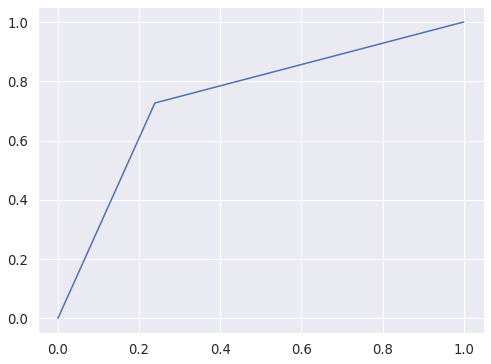

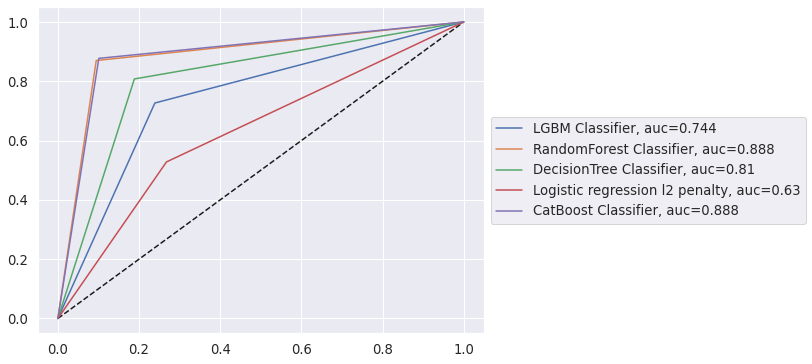

In [175]:
auc = metrics.roc_auc_score(y_test_2, predictions_1)
plt.figure(figsize = (8,6))
plt.plot(fpr,tpr,label="LGBM Classifier, auc="+str(auc.round(3)))
auc = metrics.roc_auc_score(y_test_2, predictions_2)

plt.plot(fpr,tpr,label="XGBoost Classifier, auc="+str(auc.round(3)))
clf_rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False).fit(X_train_2, y_train_2)

model_rf = clf_rf.fit(X_train_2, y_train_2)
# Predictions
predictions_3 = model_rf.predict(X_test_2)
print("Accuracy on training set: {}".format(model_rf.score(X_train_2, y_train_2)))
print("Accuracy on test set: {}".format(model_rf.score(X_test_2, y_test_2)))
print ("The confusion Matrix is ")
rf = confusion_matrix(y_test_2, predictions_3)
print(confusion_matrix(y_test_2, predictions_3))
print(classification_report(y_test_2, predictions_3))
fpr, tpr, thresholds = roc_curve(y_test_2, predictions_3)
auc = metrics.roc_auc_score(y_test_2, predictions_3)

plt.plot(fpr,tpr,label="RandomForest Classifier, auc="+str(auc.round(3)))


import sklearn
clf_dt = sklearn.tree.DecisionTreeClassifier()
#sklearn.svm.SVC
model_dt = clf_dt.fit(X_train_2, y_train_2)
# Predictions
predictions_4 = model_dt.predict(X_test_2)
print("Accuracy on training set: {}".format(model_dt.score(X_train_2, y_train_2)))
print("Accuracy on test set: {}".format(model_dt.score(X_test_2, y_test_2)))
print ("The confusion Matrix is ")
dt = confusion_matrix(y_test_2, predictions_4)
print(confusion_matrix(y_test_2, predictions_4))
print(classification_report(y_test_2, predictions_4))
fpr, tpr, thresholds = roc_curve(y_test_2, predictions_4)
auc = metrics.roc_auc_score(y_test_2, predictions_4)

plt.plot(fpr,tpr,label="DecisionTree Classifier, auc="+str(auc.round(3)))


plt.plot([0, 1], [0, 1], 'k--')
clf_lr = LogisticRegression(penalty='l2', C=100).fit(X_train_2, y_train_2)
predictions_5 = clf_lr.predict(X_test_2)
print("Accuracy on training set: {}".format(clf_lr.score(X_train_2, y_train_2)))
print("Accuracy on test set: {}".format(clf_lr.score(X_test_2, y_test_2)))
print("Confusion Matrix")
lr = confusion_matrix(y_test_2, predictions_5)
print(confusion_matrix(y_test_2, predictions_5))
print(classification_report(y_test_2, predictions_5))
fpr, tpr, thresholds = roc_curve(y_test_2, predictions_5)
auc = metrics.roc_auc_score(y_test_2, predictions_5)

plt.plot(fpr,tpr,label="Logistic regression l2 penalty, auc="+str(auc.round(3)))



import sklearn
from xgboost import plot_importance
clf_cb = CatBoostClassifier(iterations = 20000,
                            learning_rate = 0.5)

model_cb = clf_cb.fit(X_train_2, y_train_2)
# Predictions
predictions_6 = model_cb.predict(X_test_2)
print("Accuracy on training set: {}".format(model_cb.score(X_train_2, y_train_2)))
print("Accuracy on test set: {}".format(model_cb.score(X_test_2, y_test_2)))
print ("The confusion Matrix is ")
cb = confusion_matrix(y_test_2, predictions_6)
print(confusion_matrix(y_test_2, predictions_6))
print(classification_report(y_test_2, predictions_6))
fpr, tpr, thresholds = roc_curve(y_test_2, predictions_6)
auc = metrics.roc_auc_score(y_test_2, predictions_6)

plt.plot(fpr,tpr,label="CatBoost Classifier, auc="+str(auc.round(3)))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [185]:
LGBM = pd.DataFrame({'prob':predictions_1})
LGBM.to_csv("LGBM.CSV",index = False)

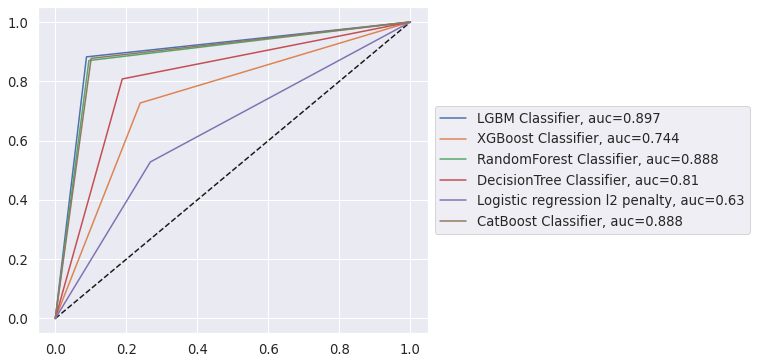

In [184]:
plt.figure(figsize = (7,6))
plt.plot([0, 1], [0, 1], 'k--')
fpr, tpr, thresholds = roc_curve(y_test_2, predictions_1)
auc = metrics.roc_auc_score(y_test_2, predictions_1)
plt.plot(fpr,tpr,label="LGBM Classifier, auc="+str(auc.round(3)))

fpr, tpr, thresholds = roc_curve(y_test_2, predictions_2)
auc = metrics.roc_auc_score(y_test_2, predictions_2)
plt.plot(fpr,tpr,label="XGBoost Classifier, auc="+str(auc.round(3)))

fpr, tpr, thresholds = roc_curve(y_test_2, predictions_3)
auc = metrics.roc_auc_score(y_test_2, predictions_3)
plt.plot(fpr,tpr,label="RandomForest Classifier, auc="+str(auc.round(3)))

fpr, tpr, thresholds = roc_curve(y_test_2, predictions_4)
auc = metrics.roc_auc_score(y_test_2, predictions_4)
plt.plot(fpr,tpr,label="DecisionTree Classifier, auc="+str(auc.round(3)))

fpr, tpr, thresholds = roc_curve(y_test_2, predictions_5)
auc = metrics.roc_auc_score(y_test_2, predictions_5)
plt.plot(fpr,tpr,label="Logistic regression l2 penalty, auc="+str(auc.round(3)))

fpr, tpr, thresholds = roc_curve(y_test_2, predictions_6)
auc = metrics.roc_auc_score(y_test_2, predictions_6)
plt.plot(fpr,tpr,label="CatBoost Classifier, auc="+str(auc.round(3)))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


Text(0.5, 1.0, 'LightGBM Classifier')

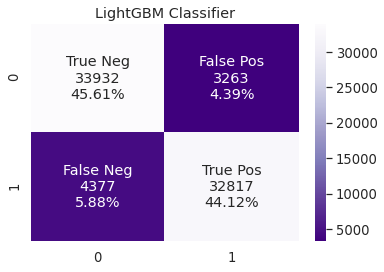

In [187]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                lgbm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     lgbm.flatten()/np.sum(lgbm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(lgbm, annot=labels, fmt='', cmap='Purples_r')

plt.title("LightGBM Classifier")

Text(0.5, 1.0, 'XGBoost Classifier')

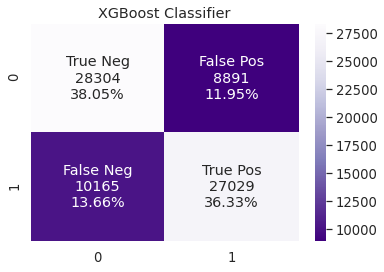

In [188]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                xgb.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     xgb.flatten()/np.sum(xgb)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(xgb, annot=labels, fmt='', cmap='Purples_r'
            )
plt.title("XGBoost Classifier")

Text(0.5, 1.0, 'RandomForest Classifier')

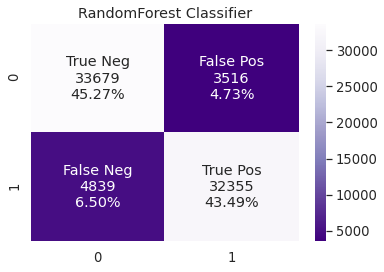

In [189]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                rf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     rf.flatten()/np.sum(rf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(rf, annot=labels, fmt='', cmap='Purples_r'
            )
plt.title("RandomForest Classifier")

Text(0.5, 1.0, 'DecisionTree Classifier')

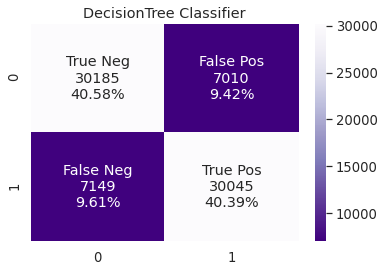

In [190]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                dt.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     dt.flatten()/np.sum(dt)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(dt, annot=labels, fmt='', cmap='Purples_r'
            )
plt.title("DecisionTree Classifier")

Text(0.5, 1.0, 'Logistic Regression L2 Penalty')

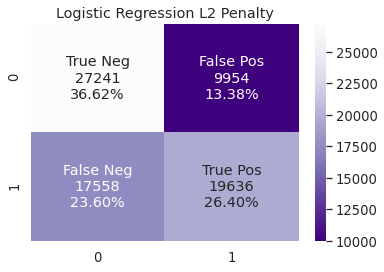

In [191]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                lr.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     lr.flatten()/np.sum(lr)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(lr, annot=labels, fmt='', cmap='Purples_r'
            )
plt.title("Logistic Regression L2 Penalty")

Text(0.5, 1.0, 'CatBoost Classifier')

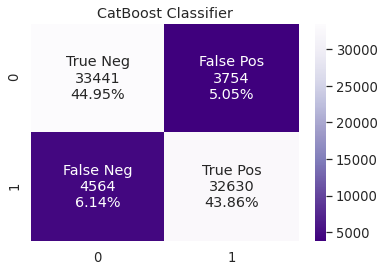

In [192]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cb.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cb.flatten()/np.sum(cb)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(cb, annot=labels, fmt='', cmap='Purples_r'
            )
plt.title("CatBoost Classifier")

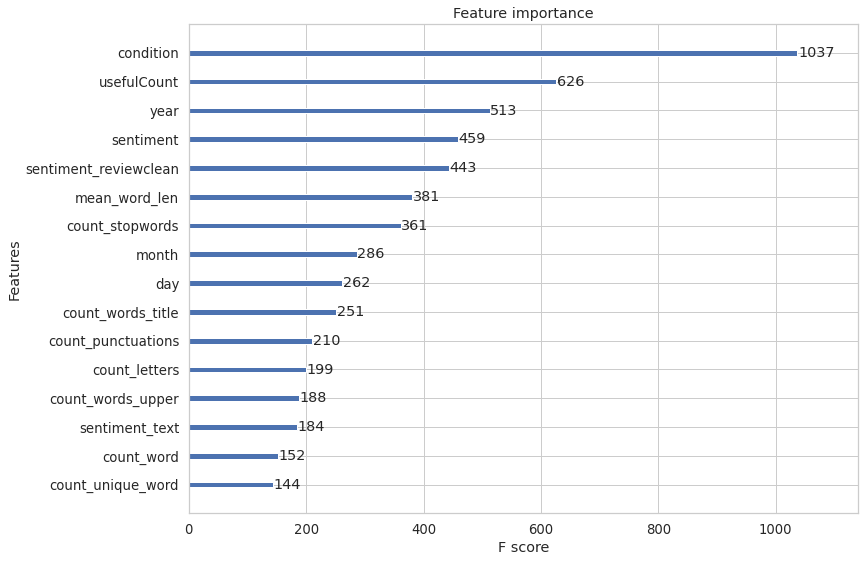

In [203]:
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'whitegrid', font_scale = 1.2)
plot_importance(model_xgb);

In [ ]:
"""
# Train test split
# NB: We are using the data in the drugsComTest_raw.csv file as a holdout set for final performance evaluation.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2) # Default is 75%/25% split

clf = MultinomialNB().fit(X_train, y_train)

pred = clf.predict(X_test)

print("Accuracy on training set: {}".format(clf.score(X_train, y_train)))

print("Accuracy on test set: {}".format(clf.score(X_test, y_test)))
print("Confusion Matrix")
print(confusion_matrix(pred, y_test))
print(classification_report(y_test, pred))

    # calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, pred)
    # plot no skill
pyplt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
pyplt.plot(fpr, tpr, marker='.')
    #plt.plot(k,pred_cv)
pyplt.title("Line Plot of ROC Curve")
pyplt.ylabel('True Positive Rate')
pyplt.xlabel('False Positive Rate')
pyplt.show()
print("AUC: {}".format(roc_auc_score(y_test, pred)))
"""

In [46]:
print(final_df.shape)
df_nlp = final_df
df_nlp.head()

(212141, 9)


,uniqueID,drugName,condition,review,rating,date,usefulCount,text,binary_rating
0,206461,Valsartan,Left Ventricular Dysfunction,"It has no side effect, I take it in combinatio...",9,2012-05-20,27,Valsartan Left Ventricular Dysfunction It has ...,1
1,95260,Guanfacine,ADHD,My son is halfway through his fourth week of I...,8,2010-04-27,192,Guanfacine ADHD My son is halfway through his ...,1
2,92703,Lybrel,Birth Control,"I used to take another oral contraceptive, whi...",5,2009-12-14,17,Lybrel Birth Control I used to take another or...,0
3,138000,Ortho Evra,Birth Control,This is my first time using any form of birth ...,8,2015-11-03,10,Ortho Evra Birth Control This is my first time...,1
4,35696,Buprenorphine / naloxone,Opiate Dependence,Suboxone has completely turned my life around....,9,2016-11-27,37,Buprenorphine / naloxone Opiate Dependence Sub...,1


In [47]:
# The token pattern grouping alpha-numerically
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiation of CountVectorizer object
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC, ngram_range=(1,2), lowercase=True, stop_words='english') # added min_df param

# Fit to training data
X = vec_alphanumeric.fit_transform(df_nlp.text)


# Create a column with binary rating indicating the polarity of a review
#final_df['binary_rating'] = final_df["rating"].apply(lambda x: 1 if x > 5 else 0)
#final_df['binary_rating'] = final_df['rating'] > 5

y = df_nlp.binary_rating

# Print the total number of tokesn and first 15 tokens
msg = 'There are {} tokens in the review column if we split on non-alpha numeric.'
print(msg.format(len(vec_alphanumeric.get_feature_names())))
print(vec_alphanumeric.get_feature_names()[:30])

There are 1464366 tokens in the review column if we split on non-alpha numeric.
['0', '0 0', '0 1', '0 10', '0 100', '0 10mg', '0 12', '0 14', '0 2', '0 24', '0 290', '0 2lbs', '0 3', '0 4', '0 4th', '0 5', '0 6', '0 60', '0 7', '0 75mg', '0 8', '0 9', '0 9th', '0 access', '0 acne', '0 adverse', '0 affect', '0 affects', '0 afford', '0 agreed']


In [48]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.25)
y_test[:11]

286632    0
103753    0
266169    0
108347    0
70780     0
36141     1
258635    0
73704     1
140854    1
234778    0
97219     1
Name: binary_rating, dtype: int64

****************************Logistic regression **************************************************
Accuracy on training set: 0.9983868582720563
Accuracy on test set: 0.9407976985844682
Confusion Matrix
[[35249  1946]
 [ 2458 34736]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     37195
           1       0.95      0.93      0.94     37194

    accuracy                           0.94     74389
   macro avg       0.94      0.94      0.94     74389
weighted avg       0.94      0.94      0.94     74389

****************************perceptron **************************************************
Accuracy on training set: 0.9982524297947277
Accuracy on test set: 0.9390635712269287
Confusion Matrix
[[35164  2031]
 [ 2502 34692]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     37195
           1       0.94      0.93      0.94     37194

    accuracy                           0.94     7438

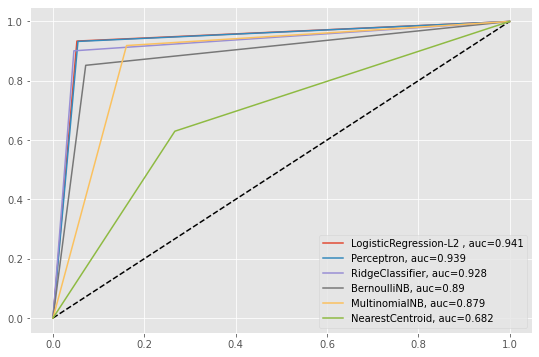

In [53]:
print("****************************Logistic regression **************************************************")

clf_l2 = LogisticRegression(penalty='l2', C=100).fit(X_train, y_train)
pred1 = clf_l2.predict(X_test)

print("Accuracy on training set: {}".format(clf_l2.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_l2.score(X_test, y_test)))
print("Confusion Matrix")
l2 = confusion_matrix(y_test, pred1)
print(confusion_matrix(y_test, pred1))
print(classification_report(y_test, pred1))
fpr, tpr, thresholds = roc_curve(y_test, pred1)
auc = metrics.roc_auc_score(y_test, pred1)
plt.figure(figsize = (9,6))
p1 = plt.plot(fpr,tpr,label="LogisticRegression-L2 , auc="+str(auc.round(3)))



print("****************************perceptron **************************************************")
clf_p = Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
                                max_iter=50,  n_jobs=1, penalty=None, random_state=0,
                                shuffle=True, tol=None, verbose=0, warm_start=False).fit(X_train, y_train)
pred = clf_p.predict(X_test)

print("Accuracy on training set: {}".format(clf_p.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_p.score(X_test, y_test)))
print("Confusion Matrix")
p = confusion_matrix(y_test, pred)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="Perceptron, auc="+str(auc.round(3)))
plt.plot([0, 1], [0, 1], 'k--')


print("****************************ridgeclassifier **************************************************")
clf_r = RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.01).fit(X_train,y_train)
pred = clf_r.predict(X_test)

print("Accuracy on training set: {}".format(clf_r.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_r.score(X_test, y_test)))
print("Confusion Matrix")
r = confusion_matrix(y_test, pred)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="RidgeClassifier, auc="+str(auc.round(3)))


print("****************************bernoullinb **************************************************")
clf_b = BernoulliNB(alpha=0.01, binarize=0.0, class_prior=None, fit_prior=True).fit(X_train,y_train)
pred = clf_b.predict(X_test)

print("Accuracy on training set: {}".format(clf_b.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_b.score(X_test, y_test)))
print("Confusion Matrix")
b = confusion_matrix(y_test, pred)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="BernoulliNB, auc="+str(auc.round(3)))


print("****************************multinomialnb **************************************************")
clf_m = MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True).fit(X_train,y_train)
pred = clf_m.predict(X_test)

print("Accuracy on training set: {}".format(clf_m.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_m.score(X_test, y_test)))
print("Confusion Matrix")
m = confusion_matrix(y_test, pred)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="MultinomialNB, auc="+str(auc.round(3)))


print("****************************nearestcentroid **************************************************")
clf_nc = NearestCentroid(metric='euclidean', shrink_threshold=None).fit(X_train,y_train)
pred = clf_nc.predict(X_test)

print("Accuracy on training set: {}".format(clf_nc.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_nc.score(X_test, y_test)))
print("Confusion Matrix")
nc = confusion_matrix(y_test, pred)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="NearestCentroid, auc="+str(auc.round(3)))


#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='lower right')



****************************sgd elasticnet **************************************************
Accuracy on training set: 0.8968082198532937
Accuracy on test set: 0.867319092876635
Confusion Matrix
[[33069  4126]
 [ 5744 31450]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     37195
           1       0.88      0.85      0.86     37194

    accuracy                           0.87     74389
   macro avg       0.87      0.87      0.87     74389
weighted avg       0.87      0.87      0.87     74389

****************************sgdl1 **************************************************
Accuracy on training set: 0.8412802968180779
Accuracy on test set: 0.833389345198887
Confusion Matrix
[[32075  5120]
 [ 7274 29920]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84     37195
           1       0.85      0.80      0.83     37194

    accuracy                           0.83     74389
   macro a

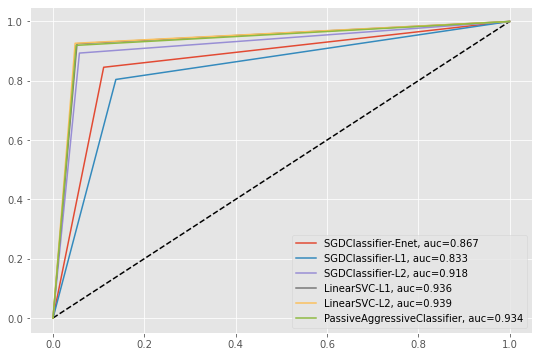

In [54]:
import matplotlib.pyplot as plt

print("****************************sgd elasticnet **************************************************")

clf_s = SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=50, 
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False).fit(X_train,y_train)
pred = clf_s.predict(X_test)
print("Accuracy on training set: {}".format(clf_s.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_s.score(X_test, y_test)))
s = confusion_matrix(y_test, pred)
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.figure(figsize = (9,6))
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="SGDClassifier-Enet, auc="+str(auc.round(3)))
plt.plot([0, 1], [0, 1], 'k--')

print("****************************sgdl1 **************************************************")
clf_sg = SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=50, 
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False).fit(X_train,y_train)
pred = clf_sg.predict(X_test)
print("Accuracy on training set: {}".format(clf_sg.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_sg.score(X_test, y_test)))
sg = confusion_matrix(y_test, pred)
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="SGDClassifier-L1, auc="+str(auc.round(3)))


print("****************************sgdl2 **************************************************")

clf_sgg = SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=50, 
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False).fit(X_train,y_train)
pred = clf_sgg.predict(X_test)
print("Accuracy on training set: {}".format(clf_sgg.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_sgg.score(X_test, y_test)))
sgg = confusion_matrix(y_test, pred)
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="SGDClassifier-L2, auc="+str(auc.round(3)))

print("****************************linearsvcl1 **************************************************")

clf_L = LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0).fit(X_train,y_train)
pred = clf_L.predict(X_test)
print("Accuracy on training set: {}".format(clf_L.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_L.score(X_test, y_test)))
L = confusion_matrix(y_test, pred)
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="LinearSVC-L1, auc="+str(auc.round(3)))

print("****************************linearsvc l2 **************************************************")

clf_Ll = LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0).fit(X_train,y_train)
pred = clf_Ll.predict(X_test)
print("Accuracy on training set: {}".format(clf_Ll.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_Ll.score(X_test, y_test)))
L1 = confusion_matrix(y_test, pred)
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="LinearSVC-L2, auc="+str(auc.round(3)))

print("****************************passiveagressiveclassifier **************************************************")

clf_pa = PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              fit_intercept=True, loss='hinge', max_iter=50,
              n_jobs=1, random_state=None, shuffle=True, tol=None,
              verbose=0, warm_start=False).fit(X_train,y_train)
pred = clf_pa.predict(X_test)
print("Accuracy on training set: {}".format(clf_pa.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_pa.score(X_test, y_test)))
pa = confusion_matrix(y_test, pred)
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="PassiveAggressiveClassifier, auc="+str(auc.round(3)))
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='lower right')

In [55]:
#clf_l2 = LogisticRegression(penalty='l2', C=100).fit(X_train, y_train)
#pred = clf_l2.predict(X_test)
predss = pd.DataFrame({'prob':pred1})
predss.to_csv("LogisticRegression-L2.csv",index = False)

In [56]:
len(predss)

74389

Text(0.5, 1.0, 'Logistic Regression L2 Penalty')

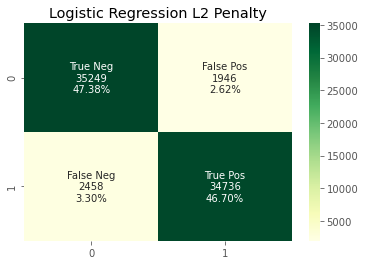

In [72]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                l2.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     l2.flatten()/np.sum(l2)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(l2, annot=labels, fmt='', cmap='YlGn'
            )
plt.title("Logistic Regression L2 Penalty")


Text(0.5, 1.0, 'Perceptron')

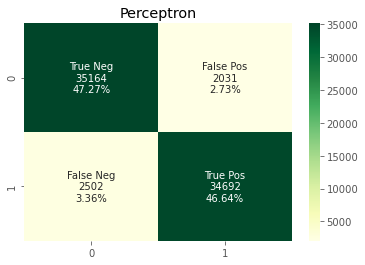

In [73]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                p.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     p.flatten()/np.sum(p)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(p, annot=labels, fmt='', cmap='YlGn')
plt.title("Perceptron")

Text(0.5, 1.0, 'Ridge Classifier')

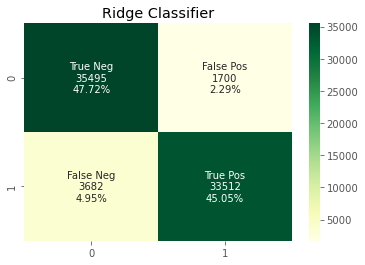

In [74]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                r.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     r.flatten()/np.sum(r)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(r, annot=labels, fmt='', cmap='YlGn')
plt.title("Ridge Classifier")

Text(0.5, 1.0, 'Bernoulli Naive Bayes')

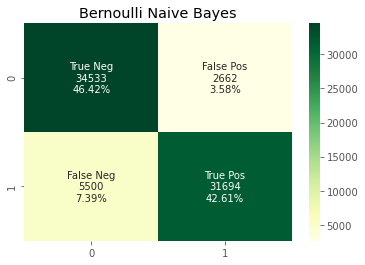

In [75]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                b.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     b.flatten()/np.sum(b)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(b, annot=labels, fmt='', cmap='YlGn')
plt.title("Bernoulli Naive Bayes")

Text(0.5, 1.0, 'Multinomial Naive Bayes')

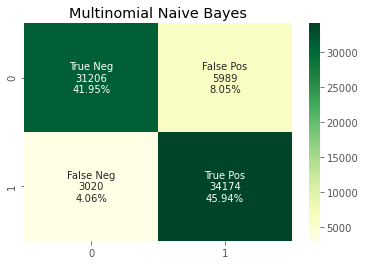

In [76]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                m.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     m.flatten()/np.sum(m)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(m, annot=labels, fmt='', cmap='YlGn')
plt.title("Multinomial Naive Bayes")

Text(0.5, 1.0, 'Nearest Centroid')

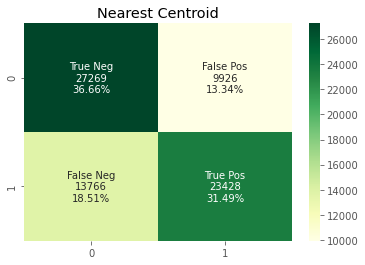

In [77]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                nc.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     nc.flatten()/np.sum(nc)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(nc, annot=labels, fmt='', cmap='YlGn')
plt.title("Nearest Centroid")

Text(0.5, 1.0, 'SGD Classifier Elasticnet Penalty ')

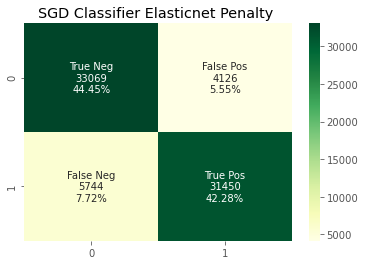

In [78]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                s.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     s.flatten()/np.sum(s)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(s, annot=labels, fmt='', cmap='YlGn')
plt.title("SGD Classifier Elasticnet Penalty ")

Text(0.5, 1.0, 'SGD Classifier L1 Penalty')

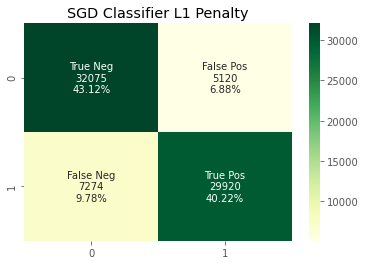

In [79]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                sg.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     sg.flatten()/np.sum(sg)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(sg, annot=labels, fmt='', cmap='YlGn')
plt.title("SGD Classifier L1 Penalty")

Text(0.5, 1.0, 'SGD Classifier L2 Penalty')

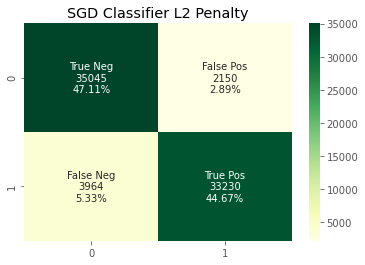

In [80]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                sgg.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     sgg.flatten()/np.sum(sgg)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(sgg, annot=labels, fmt='', cmap='YlGn')
plt.title("SGD Classifier L2 Penalty")

Text(0.5, 1.0, 'Linear SVC L1 Penalty')

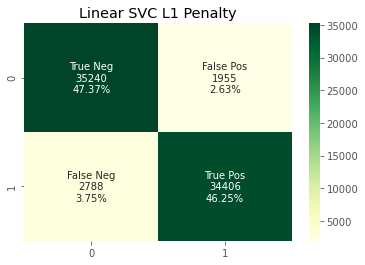

In [81]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                L.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     L.flatten()/np.sum(L)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(L, annot=labels, fmt='', cmap='YlGn')
plt.title("Linear SVC L1 Penalty")

Text(0.5, 1.0, 'Linear SVC L2 Penalty')

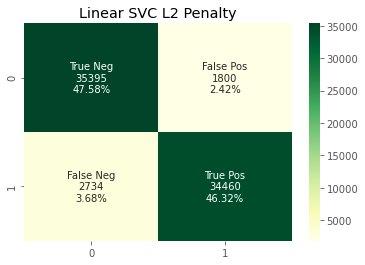

In [82]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                L1.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     L1.flatten()/np.sum(L1)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(L1, annot=labels, fmt='', cmap='YlGn')
plt.title("Linear SVC L2 Penalty")

Text(0.5, 1.0, 'Passive Aggressive Classifier')

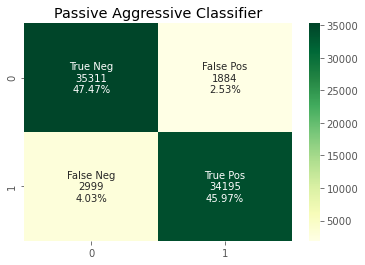

In [83]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                pa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     pa.flatten()/np.sum(pa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(pa, annot=labels, fmt='', cmap='YlGn')
plt.title("Passive Aggressive Classifier")

In [84]:
# The token pattern grouping alpha-numerically
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiation of CountVectorizer object
vec_alphanumeric = TfidfVectorizer(token_pattern=TOKENS_ALPHANUMERIC, ngram_range=(1,2), lowercase=True, stop_words='english') # added min_df param

# Fit to training data
X = vec_alphanumeric.fit_transform(df_nlp.text)


# Create a column with binary rating indicating the polarity of a review
#final_df['binary_rating'] = final_df["rating"].apply(lambda x: 1 if x > 5 else 0)
#final_df['binary_rating'] = final_df['rating'] > 5

y = df_nlp.binary_rating

# Print the total number of tokesn and first 15 tokens
msg = 'There are {} tokens in the review column if we split on non-alpha numeric.'
print(msg.format(len(vec_alphanumeric.get_feature_names())))
print(vec_alphanumeric.get_feature_names()[:30])

There are 1464366 tokens in the review column if we split on non-alpha numeric.
['0', '0 0', '0 1', '0 10', '0 100', '0 10mg', '0 12', '0 14', '0 2', '0 24', '0 290', '0 2lbs', '0 3', '0 4', '0 4th', '0 5', '0 6', '0 60', '0 7', '0 75mg', '0 8', '0 9', '0 9th', '0 access', '0 acne', '0 adverse', '0 affect', '0 affects', '0 afford', '0 agreed']


In [85]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.25)
y_test[:11]

286632    0
103753    0
266169    0
108347    0
70780     0
36141     1
258635    0
73704     1
140854    1
234778    0
97219     1
Name: binary_rating, dtype: int64

****************************Logistic regression **************************************************
Accuracy on training set: 0.9953084461412306
Accuracy on test set: 0.9507454059067872
Confusion Matrix
[[35695  1500]
 [ 2164 35030]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     37195
           1       0.96      0.94      0.95     37194

    accuracy                           0.95     74389
   macro avg       0.95      0.95      0.95     74389
weighted avg       0.95      0.95      0.95     74389

****************************perceptron **************************************************
Accuracy on training set: 0.9997490668423199
Accuracy on test set: 0.9600075279947304
Confusion Matrix
[[36060  1135]
 [ 1840 35354]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     37195
           1       0.97      0.95      0.96     37194

    accuracy                           0.96     7438

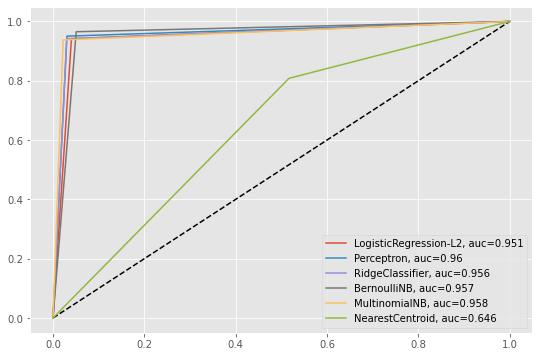

In [87]:
print("****************************Logistic regression **************************************************")

clf_l2 = LogisticRegression(penalty='l2', C=100).fit(X_train, y_train)
pred = clf_l2.predict(X_test)


print("Accuracy on training set: {}".format(clf_l2.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_l2.score(X_test, y_test)))
print("Confusion Matrix")
l2 = confusion_matrix(y_test, pred)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.figure(figsize = (9,6))
p1 = plt.plot(fpr,tpr,label="LogisticRegression-L2, auc="+str(auc.round(3)))
plt.plot([0, 1], [0, 1], 'k--')


print("****************************perceptron **************************************************")
clf_p = Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
                                max_iter=50,  n_jobs=1, penalty=None, random_state=0,
                                shuffle=True, tol=None, verbose=0, warm_start=False).fit(X_train, y_train)
pred = clf_p.predict(X_test)

print("Accuracy on training set: {}".format(clf_p.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_p.score(X_test, y_test)))
print("Confusion Matrix")
p = confusion_matrix(y_test, pred)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="Perceptron, auc="+str(auc.round(3)))



print("****************************ridgeclassifier **************************************************")
clf_r = RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.01).fit(X_train,y_train)
pred = clf_r.predict(X_test)

print("Accuracy on training set: {}".format(clf_r.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_r.score(X_test, y_test)))
print("Confusion Matrix")
r = confusion_matrix(y_test, pred)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="RidgeClassifier, auc="+str(auc.round(3)))


print("****************************bernoullinb **************************************************")
clf_b = BernoulliNB(alpha=0.01, binarize=0.0, class_prior=None, fit_prior=True).fit(X_train,y_train)
pred = clf_b.predict(X_test)

print("Accuracy on training set: {}".format(clf_b.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_b.score(X_test, y_test)))
print("Confusion Matrix")
b = confusion_matrix(y_test, pred)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="BernoulliNB, auc="+str(auc.round(3)))


print("****************************multinomialnb **************************************************")
clf_m = MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True).fit(X_train,y_train)
pred = clf_m.predict(X_test)

print("Accuracy on training set: {}".format(clf_m.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_m.score(X_test, y_test)))
print("Confusion Matrix")
m = confusion_matrix(y_test, pred)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="MultinomialNB, auc="+str(auc.round(3)))


print("****************************nearestcentroid **************************************************")
clf_nc = NearestCentroid(metric='euclidean', shrink_threshold=None).fit(X_train,y_train)
pred = clf_nc.predict(X_test)

print("Accuracy on training set: {}".format(clf_nc.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_nc.score(X_test, y_test)))
print("Confusion Matrix")
nc = confusion_matrix(y_test, pred)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="NearestCentroid, auc="+str(auc.round(3)))


#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='lower right')

****************************sgd elasticnet **************************************************
Accuracy on training set: 0.7954222622520355
Accuracy on test set: 0.7891758190054982
Confusion Matrix
[[28614  8581]
 [ 7102 30092]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78     37195
           1       0.78      0.81      0.79     37194

    accuracy                           0.79     74389
   macro avg       0.79      0.79      0.79     74389
weighted avg       0.79      0.79      0.79     74389

****************************sgdl1 **************************************************
Accuracy on training set: 0.7729906303351302
Accuracy on test set: 0.7700332038339002
Confusion Matrix
[[29074  8121]
 [ 8986 28208]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77     37195
           1       0.78      0.76      0.77     37194

    accuracy                           0.77     74389
   macro

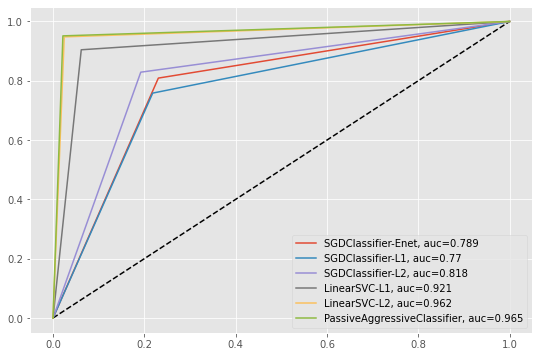

In [88]:
import matplotlib.pyplot as plt

print("****************************sgd elasticnet **************************************************")

clf_s = SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=50, 
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False).fit(X_train,y_train)
pred = clf_s.predict(X_test)
print("Accuracy on training set: {}".format(clf_s.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_s.score(X_test, y_test)))
s = confusion_matrix(y_test, pred)
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.figure(figsize = (9,6))
p1 = plt.plot(fpr,tpr,label="SGDClassifier-Enet, auc="+str(auc.round(3)))
plt.plot([0, 1], [0, 1], 'k--')

print("****************************sgdl1 **************************************************")
clf_sg = SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=50, 
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False).fit(X_train,y_train)
pred = clf_sg.predict(X_test)
print("Accuracy on training set: {}".format(clf_sg.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_sg.score(X_test, y_test)))
sg = confusion_matrix(y_test, pred)
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="SGDClassifier-L1, auc="+str(auc.round(3)))


print("****************************sgdl2 **************************************************")

clf_sgg = SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=50, 
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False).fit(X_train,y_train)
pred = clf_sgg.predict(X_test)
print("Accuracy on training set: {}".format(clf_sgg.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_sgg.score(X_test, y_test)))
sgg = confusion_matrix(y_test, pred)
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="SGDClassifier-L2, auc="+str(auc.round(3)))

print("****************************linearsvcl1 **************************************************")

clf_L = LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0).fit(X_train,y_train)
pred = clf_L.predict(X_test)
print("Accuracy on training set: {}".format(clf_L.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_L.score(X_test, y_test)))
L = confusion_matrix(y_test, pred)
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="LinearSVC-L1, auc="+str(auc.round(3)))

print("****************************linearsvc l2 **************************************************")

clf_Ll = LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0).fit(X_train,y_train)
pred = clf_Ll.predict(X_test)
print("Accuracy on training set: {}".format(clf_Ll.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_Ll.score(X_test, y_test)))
L1 = confusion_matrix(y_test, pred)
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="LinearSVC-L2, auc="+str(auc.round(3)))

print("****************************passiveagressiveclassifier **************************************************")

clf_pa = PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              fit_intercept=True, loss='hinge', max_iter=50,
              n_jobs=1, random_state=None, shuffle=True, tol=None,
              verbose=0, warm_start=False).fit(X_train,y_train)
pred = clf_pa.predict(X_test)
print("Accuracy on training set: {}".format(clf_pa.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_pa.score(X_test, y_test)))
pa = confusion_matrix(y_test, pred)
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="PassiveAggressiveClassifier, auc="+str(auc.round(3)))
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(loc='lower right')

In [91]:
predsss = pd.DataFrame({'prob':pred})
predsss.to_csv("pag.csv",index = False)

Text(0.5, 1.0, 'Logistic Regression L2 Penalty')

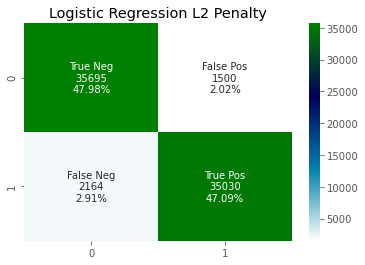

In [119]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                l2.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     l2.flatten()/np.sum(l2)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(l2, annot=labels, fmt='', cmap='ocean_r'
            )
plt.title("Logistic Regression L2 Penalty")

Text(0.5, 1.0, 'Perceptron')

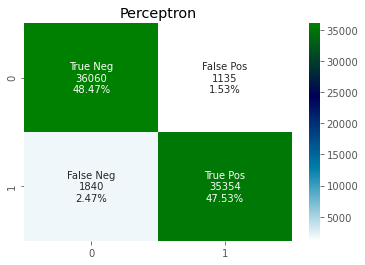

In [118]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                p.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     p.flatten()/np.sum(p)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(p, annot=labels, fmt='', cmap='ocean_r')
plt.title("Perceptron")

Text(0.5, 1.0, 'Ridge Classifier')

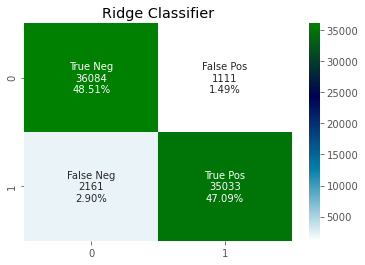

In [117]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                r.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     r.flatten()/np.sum(r)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(r, annot=labels, fmt='', cmap='ocean_r')
plt.title("Ridge Classifier")

Text(0.5, 1.0, 'Bernoulli Naive Bayes')

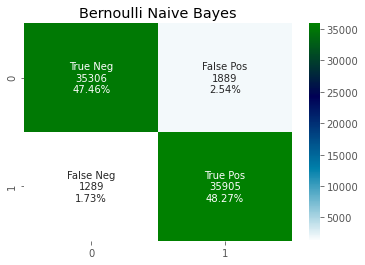

In [116]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                b.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     b.flatten()/np.sum(b)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(b, annot=labels, fmt='', cmap='ocean_r')
plt.title("Bernoulli Naive Bayes")

Text(0.5, 1.0, 'Multinomial Naive Bayes')

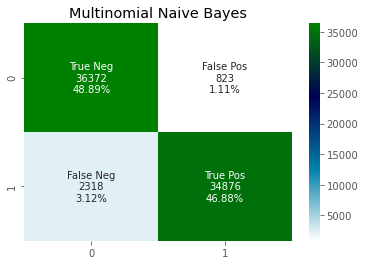

In [115]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                m.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     m.flatten()/np.sum(m)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(m, annot=labels, fmt='', cmap='ocean_r')
plt.title("Multinomial Naive Bayes")

Text(0.5, 1.0, 'Nearest Centroid')

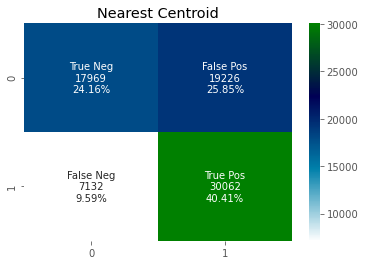

In [114]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                nc.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     nc.flatten()/np.sum(nc)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(nc, annot=labels, fmt='', cmap='ocean_r')
plt.title("Nearest Centroid")

Text(0.5, 1.0, 'SGD Classifier Elasticnet Penalty ')

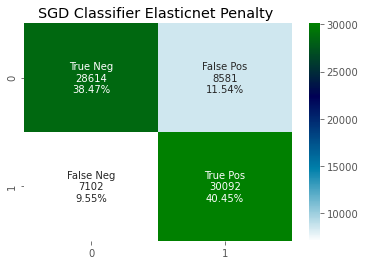

In [113]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                s.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     s.flatten()/np.sum(s)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(s, annot=labels, fmt='', cmap='ocean_r')
plt.title("SGD Classifier Elasticnet Penalty ")

Text(0.5, 1.0, 'SGD Classifier L1 Penalty')

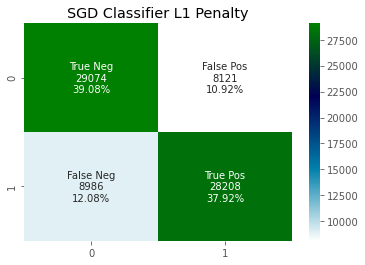

In [112]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                sg.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     sg.flatten()/np.sum(sg)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(sg, annot=labels, fmt='', cmap='ocean_r')
plt.title("SGD Classifier L1 Penalty")

Text(0.5, 1.0, 'SGD Classifier L2 Penalty')

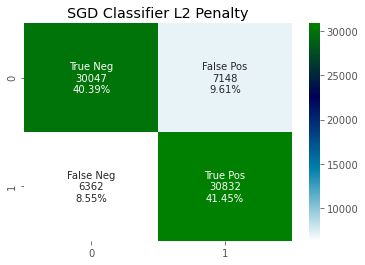

In [111]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                sgg.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     sgg.flatten()/np.sum(sgg)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(sgg, annot=labels, fmt='', cmap='ocean_r')
plt.title("SGD Classifier L2 Penalty")

Text(0.5, 1.0, 'Linear SVC L1 Penalty')

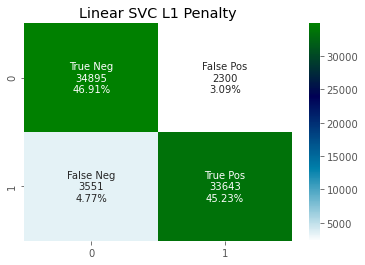

In [110]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                L.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     L.flatten()/np.sum(L)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(L, annot=labels, fmt='', cmap='ocean_r')
plt.title("Linear SVC L1 Penalty")

Text(0.5, 1.0, 'Linear SVC L2 Penalty')

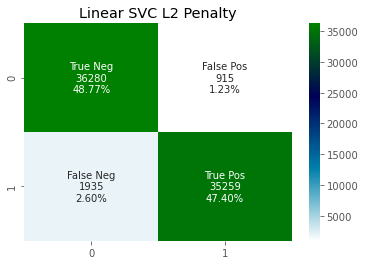

In [109]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                L1.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     L1.flatten()/np.sum(L1)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(L1, annot=labels, fmt='', cmap='ocean_r')
plt.title("Linear SVC L2 Penalty")

Text(0.5, 1.0, 'Passive Aggressive Classifier')

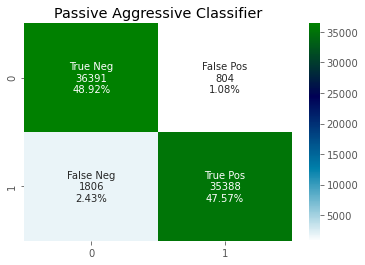

In [108]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                pa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     pa.flatten()/np.sum(pa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(pa, annot=labels, fmt='', cmap='ocean_r')
plt.title("Passive Aggressive Classifier")

In [121]:
import gensim
i=0
list_of_sent=[]
for sent in df_nlp['text'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent.append(filtered_sentence)

In [122]:
from gensim.models import Word2Vec
w2v_model=Word2Vec(list_of_sent,min_count=5,size=100, workers=4)

In [123]:
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)

In [124]:
y = df_nlp.binary_rating

In [125]:
len(sent_vectors)

212141

In [126]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
sent_vectors, y = oversample.fit_resample(sent_vectors, y)


In [129]:
X_train, X_test, y_train, y_test = train_test_split(sent_vectors, y, random_state=42, stratify=y, test_size=0.25)


In [130]:
y_test[:11]

286632    0
103753    0
266169    0
108347    0
70780     0
36141     1
258635    0
73704     1
140854    1
234778    0
97219     1
Name: binary_rating, dtype: int64

****************************Decision Tree **************************************************
Accuracy on training set: 0.9999955190507557
Accuracy on test set: 0.8074043205312613
Confusion Matrix
[[30570  6625]
 [ 7702 29492]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     37195
           1       0.82      0.79      0.80     37194

    accuracy                           0.81     74389
   macro avg       0.81      0.81      0.81     74389
weighted avg       0.81      0.81      0.81     74389

****************************randomforest **************************************************
Accuracy on training set: 0.9999955190507557
Accuracy on test set: 0.9194638992324133
Confusion Matrix
[[34263  2932]
 [ 3059 34135]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     37195
           1       0.92      0.92      0.92     37194

    accuracy                           0.92     74389
  

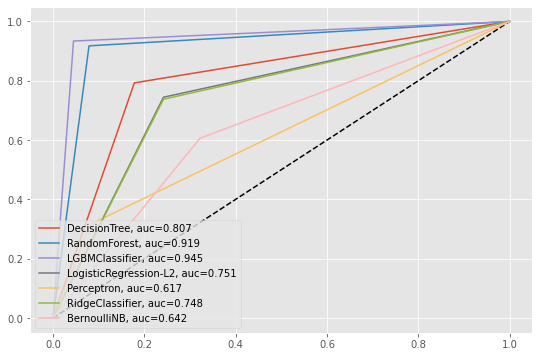

In [131]:

print("****************************Decision Tree **************************************************")
import sklearn
clf_dt = sklearn.tree.DecisionTreeClassifier().fit(X_train,y_train)
pred = clf_dt.predict(X_test)
print("Accuracy on training set: {}".format(clf_dt.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_dt.score(X_test, y_test)))
dt = confusion_matrix(y_test, pred)
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.figure(figsize = (9,6))
p1 = plt.plot(fpr,tpr,label="DecisionTree, auc="+str(auc.round(3)))


print("****************************randomforest **************************************************")
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False).fit(X_train, y_train)
predrf = clf.predict(X_test)
print("Accuracy on training set: {}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf.score(X_test, y_test)))
print("Confusion Matrix")
rf = confusion_matrix(y_test, predrf)
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test, predrf))
fpr, tpr, thresholds = roc_curve(y_test, predrf)
auc = metrics.roc_auc_score(y_test, predrf)
p1 = plt.plot(fpr,tpr,label="RandomForest, auc="+str(auc.round(3)))

print("****************************LGBMclassifier **************************************************")
import sklearn
import lightgbm
from lightgbm import LGBMClassifier
clf_lgbm = lightgbm.LGBMClassifier(n_estimators=20000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1).fit(X_train,y_train)
predlg = clf_lgbm.predict(X_test)
print("Accuracy on training set: {}".format(clf_lgbm.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_lgbm.score(X_test, y_test)))
lgbm = confusion_matrix(y_test, predlg)
print("Confusion Matrix")
print(confusion_matrix(y_test, predlg))
print(classification_report(y_test, predlg))
fpr, tpr, thresholds = roc_curve(y_test, predlg)
auc = metrics.roc_auc_score(y_test, predlg)
p1 = plt.plot(fpr,tpr,label="LGBMClassifier, auc="+str(auc.round(3)))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))



print("****************************Logistic regression **************************************************")
plt.plot([0, 1], [0, 1], 'k--')
clf_l2 = LogisticRegression(penalty='l2', C=100).fit(X_train, y_train)
pred = clf_l2.predict(X_test)


print("Accuracy on training set: {}".format(clf_l2.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_l2.score(X_test, y_test)))
print("Confusion Matrix")
l2 = confusion_matrix(y_test, pred)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="LogisticRegression-L2, auc="+str(auc.round(3)))



print("****************************perceptron **************************************************")
clf_p = Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
                                max_iter=50,  n_jobs=1, penalty=None, random_state=0,
                                shuffle=True, tol=None, verbose=0, warm_start=False).fit(X_train, y_train)
pred = clf_p.predict(X_test)

print("Accuracy on training set: {}".format(clf_p.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_p.score(X_test, y_test)))
print("Confusion Matrix")
p = confusion_matrix(y_test, pred)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="Perceptron, auc="+str(auc.round(3)))



print("****************************ridgeclassifier **************************************************")
clf_r = RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.01).fit(X_train,y_train)
pred = clf_r.predict(X_test)

print("Accuracy on training set: {}".format(clf_r.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_r.score(X_test, y_test)))
print("Confusion Matrix")
r = confusion_matrix(y_test, pred)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="RidgeClassifier, auc="+str(auc.round(3)))


print("****************************bernoullinb **************************************************")
clf_b = BernoulliNB(alpha=0.01, binarize=0.0, class_prior=None, fit_prior=True).fit(X_train,y_train)
pred = clf_b.predict(X_test)

print("Accuracy on training set: {}".format(clf_b.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_b.score(X_test, y_test)))
print("Confusion Matrix")
b = confusion_matrix(y_test, pred)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="BernoulliNB, auc="+str(auc.round(3)))
plt.legend(loc='lower left')

****************************nearestcentroid **************************************************
Accuracy on training set: 0.6538421899295147
Accuracy on test set: 0.6532955141217115
Confusion Matrix
[[25158 12037]
 [13754 23440]]
              precision    recall  f1-score   support

           0       0.65      0.68      0.66     37195
           1       0.66      0.63      0.65     37194

    accuracy                           0.65     74389
   macro avg       0.65      0.65      0.65     74389
weighted avg       0.65      0.65      0.65     74389

****************************sgd elasticnet **************************************************
Accuracy on training set: 0.7548114192510541
Accuracy on test set: 0.7522483162833214
Confusion Matrix
[[28599  8596]
 [ 9834 27360]]
              precision    recall  f1-score   support

           0       0.74      0.77      0.76     37195
           1       0.76      0.74      0.75     37194

    accuracy                           0.75     7438

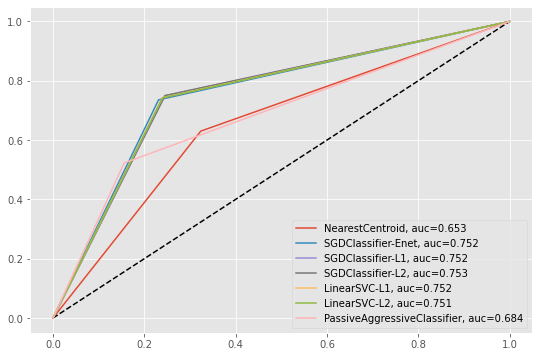

In [137]:
import matplotlib.pyplot as plt

print("****************************nearestcentroid **************************************************")
clf_nc = NearestCentroid(metric='euclidean', shrink_threshold=None).fit(X_train,y_train)
pred = clf_nc.predict(X_test)

print("Accuracy on training set: {}".format(clf_nc.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_nc.score(X_test, y_test)))
print("Confusion Matrix")
nc = confusion_matrix(y_test, pred)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
plt.figure(figsize = (9,6))
p1 = plt.plot(fpr,tpr,label="NearestCentroid, auc="+str(auc.round(3)))






print("****************************sgd elasticnet **************************************************")

clf_s = SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=50, 
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False).fit(X_train,y_train)
pred = clf_s.predict(X_test)
print("Accuracy on training set: {}".format(clf_s.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_s.score(X_test, y_test)))
s = confusion_matrix(y_test, pred)
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot([0, 1], [0, 1], 'k--')
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="SGDClassifier-Enet, auc="+str(auc.round(3)))


print("****************************sgdl1 **************************************************")
clf_sg = SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=50, 
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False).fit(X_train,y_train)
pred = clf_sg.predict(X_test)
print("Accuracy on training set: {}".format(clf_sg.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_sg.score(X_test, y_test)))
sg = confusion_matrix(y_test, pred)
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="SGDClassifier-L1, auc="+str(auc.round(3)))


print("****************************sgdl2 **************************************************")

clf_sgg = SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=50, 
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False).fit(X_train,y_train)
pred = clf_sgg.predict(X_test)
print("Accuracy on training set: {}".format(clf_sgg.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_sgg.score(X_test, y_test)))
sgg = confusion_matrix(y_test, pred)
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="SGDClassifier-L2, auc="+str(auc.round(3)))

print("****************************linearsvcl1 **************************************************")

clf_L = LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0).fit(X_train,y_train)
pred = clf_L.predict(X_test)
print("Accuracy on training set: {}".format(clf_L.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_L.score(X_test, y_test)))
L = confusion_matrix(y_test, pred)
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="LinearSVC-L1, auc="+str(auc.round(3)))

print("****************************linearsvc l2 **************************************************")

clf_Ll = LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
     verbose=0).fit(X_train,y_train)
pred = clf_Ll.predict(X_test)
print("Accuracy on training set: {}".format(clf_Ll.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_Ll.score(X_test, y_test)))
L1 = confusion_matrix(y_test, pred)
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="LinearSVC-L2, auc="+str(auc.round(3)))

print("****************************passiveagressiveclassifier **************************************************")

clf_pa = PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              fit_intercept=True, loss='hinge', max_iter=50,
              n_jobs=1, random_state=None, shuffle=True, tol=None,
              verbose=0, warm_start=False).fit(X_train,y_train)
pred = clf_pa.predict(X_test)
print("Accuracy on training set: {}".format(clf_pa.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_pa.score(X_test, y_test)))
pa = confusion_matrix(y_test, pred)
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="PassiveAggressiveClassifier, auc="+str(auc.round(3)))
plt.legend(loc='lower right')

****************************Decision Tree **************************************************
Accuracy on training set: 0.9999955190507557
Accuracy on test set: 0.8064229926467623
Confusion Matrix
[[30517  6678]
 [ 7722 29472]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     37195
           1       0.82      0.79      0.80     37194

    accuracy                           0.81     74389
   macro avg       0.81      0.81      0.81     74389
weighted avg       0.81      0.81      0.81     74389

****************************Logistic regression **************************************************
Accuracy on training set: 0.7543857290728468
Accuracy on test set: 0.7513207597897539
Confusion Matrix
[[28198  8997]
 [ 9502 27692]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.75     37195
           1       0.75      0.74      0.75     37194

    accuracy                           0.75     7

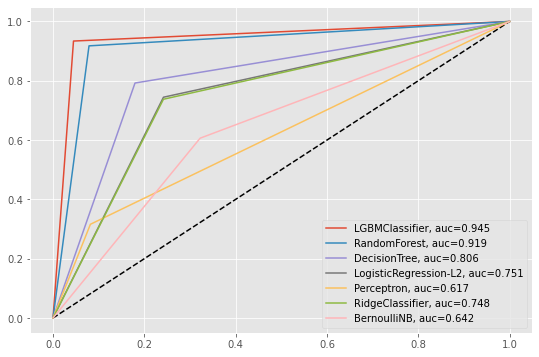

In [138]:
fpr, tpr, thresholds = roc_curve(y_test, predlg)
auc = metrics.roc_auc_score(y_test, predlg)
plt.figure(figsize = (9,6))
p1 = plt.plot(fpr,tpr,label="LGBMClassifier, auc="+str(auc.round(3)))

fpr, tpr, thresholds = roc_curve(y_test, predrf)
auc = metrics.roc_auc_score(y_test, predrf)

p1 = plt.plot(fpr,tpr,label="RandomForest, auc="+str(auc.round(3)))

print("****************************Decision Tree **************************************************")
import sklearn
clf_dt = sklearn.tree.DecisionTreeClassifier().fit(X_train,y_train)
pred = clf_dt.predict(X_test)
print("Accuracy on training set: {}".format(clf_dt.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_dt.score(X_test, y_test)))
dt = confusion_matrix(y_test, pred)
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)

p1 = plt.plot(fpr,tpr,label="DecisionTree, auc="+str(auc.round(3)))

print("****************************Logistic regression **************************************************")
plt.plot([0, 1], [0, 1], 'k--')
clf_l2 = LogisticRegression(penalty='l2', C=100).fit(X_train, y_train)
pred = clf_l2.predict(X_test)


print("Accuracy on training set: {}".format(clf_l2.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_l2.score(X_test, y_test)))
print("Confusion Matrix")
l2 = confusion_matrix(y_test, pred)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="LogisticRegression-L2, auc="+str(auc.round(3)))



print("****************************perceptron **************************************************")
clf_p = Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
                                max_iter=50,  n_jobs=1, penalty=None, random_state=0,
                                shuffle=True, tol=None, verbose=0, warm_start=False).fit(X_train, y_train)
pred = clf_p.predict(X_test)

print("Accuracy on training set: {}".format(clf_p.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_p.score(X_test, y_test)))
print("Confusion Matrix")
p = confusion_matrix(y_test, pred)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="Perceptron, auc="+str(auc.round(3)))



print("****************************ridgeclassifier **************************************************")
clf_r = RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.01).fit(X_train,y_train)
pred = clf_r.predict(X_test)

print("Accuracy on training set: {}".format(clf_r.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_r.score(X_test, y_test)))
print("Confusion Matrix")
r = confusion_matrix(y_test, pred)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="RidgeClassifier, auc="+str(auc.round(3)))


print("****************************bernoullinb **************************************************")
clf_b = BernoulliNB(alpha=0.01, binarize=0.0, class_prior=None, fit_prior=True).fit(X_train,y_train)
pred = clf_b.predict(X_test)

print("Accuracy on training set: {}".format(clf_b.score(X_train, y_train)))
print("Accuracy on test set: {}".format(clf_b.score(X_test, y_test)))
print("Confusion Matrix")
b = confusion_matrix(y_test, pred)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = metrics.roc_auc_score(y_test, pred)
p1 = plt.plot(fpr,tpr,label="BernoulliNB, auc="+str(auc.round(3)))
plt.legend(loc='lower right')

In [139]:
predssss = pd.DataFrame({'prob':predlg})
predssss.to_csv("lgbmword2vec.csv", index = False)

Text(0.5, 1.0, 'Decision Tree Classifier')

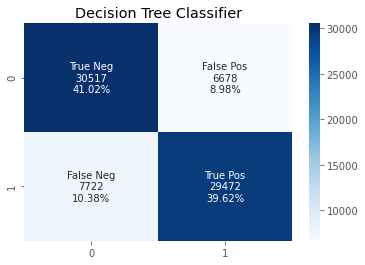

In [155]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                dt.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     dt.flatten()/np.sum(dt)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(dt, annot=labels, fmt='', cmap='Blues')
plt.title("Decision Tree Classifier")

Text(0.5, 1.0, 'Random Forest Classifier')

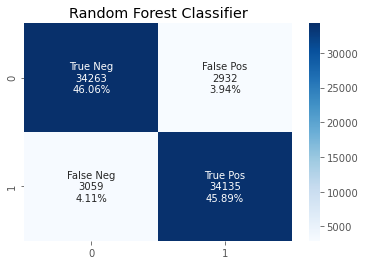

In [156]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                rf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     rf.flatten()/np.sum(rf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(rf, annot=labels, fmt='', cmap='Blues')
plt.title("Random Forest Classifier")

Text(0.5, 1.0, 'LGBM Classifier')

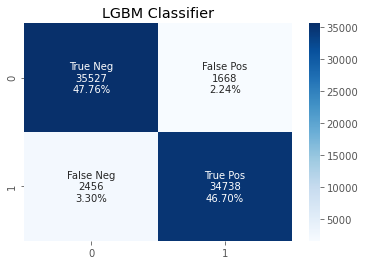

In [157]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                lgbm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     lgbm.flatten()/np.sum(lgbm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(lgbm, annot=labels, fmt='', cmap='Blues')
plt.title("LGBM Classifier")

Text(0.5, 1.0, 'Logistic Regression L2 Penalty')

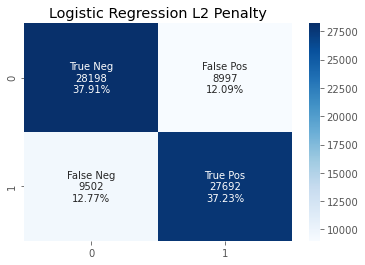

In [158]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                l2.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     l2.flatten()/np.sum(l2)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(l2, annot=labels, fmt='', cmap='Blues')
plt.title("Logistic Regression L2 Penalty")

Text(0.5, 1.0, 'Perceptron')

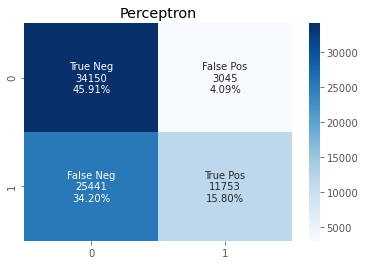

In [159]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                p.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     p.flatten()/np.sum(p)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(p, annot=labels, fmt='', cmap='Blues')
plt.title("Perceptron")

Text(0.5, 1.0, 'Ridge Classifier')

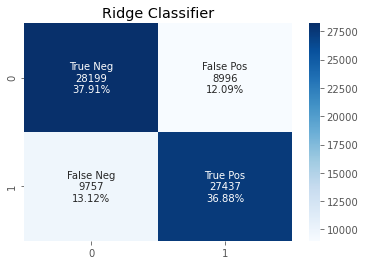

In [160]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                r.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     r.flatten()/np.sum(r)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(r, annot=labels, fmt='', cmap='Blues')
plt.title("Ridge Classifier")

Text(0.5, 1.0, 'Bernoulli Naive Bayes')

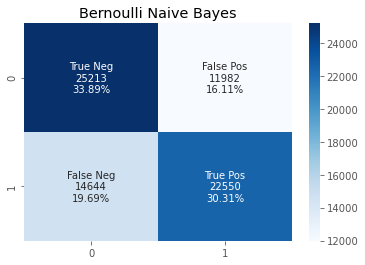

In [161]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                b.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     b.flatten()/np.sum(b)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(b, annot=labels, fmt='', cmap='Blues')
plt.title("Bernoulli Naive Bayes")

Text(0.5, 1.0, 'Nearest Centroid')

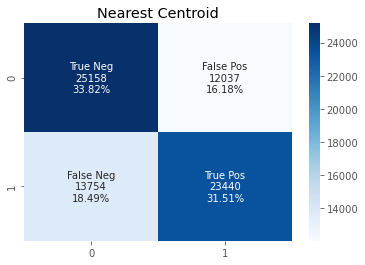

In [162]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                nc.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     nc.flatten()/np.sum(nc)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(nc, annot=labels, fmt='', cmap='Blues')
plt.title("Nearest Centroid")

Text(0.5, 1.0, 'SGD Classifier Elasticnet Penalty ')

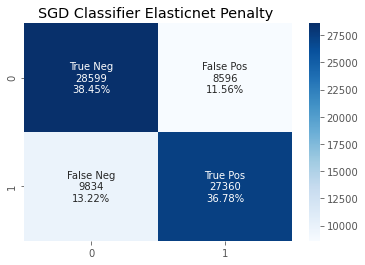

In [163]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                s.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     s.flatten()/np.sum(s)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(s, annot=labels, fmt='', cmap='Blues')
plt.title("SGD Classifier Elasticnet Penalty ")

Text(0.5, 1.0, 'SGD Classifier L1 Penalty')

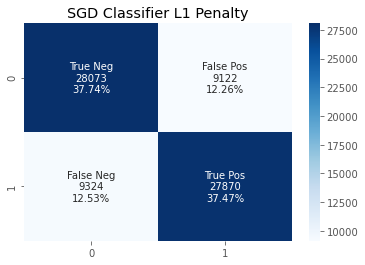

In [164]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                sg.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     sg.flatten()/np.sum(sg)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(sg, annot=labels, fmt='', cmap='Blues')
plt.title("SGD Classifier L1 Penalty")

Text(0.5, 1.0, 'SGD Classifier L2 Penalty')

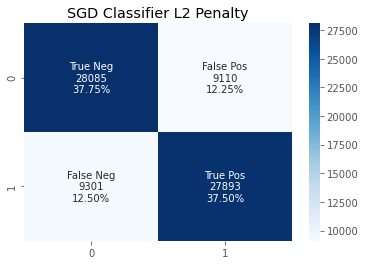

In [165]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                sgg.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     sgg.flatten()/np.sum(sgg)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(sgg, annot=labels, fmt='', cmap='Blues')
plt.title("SGD Classifier L2 Penalty")

Text(0.5, 1.0, 'Linear SVC L1 Penalty')

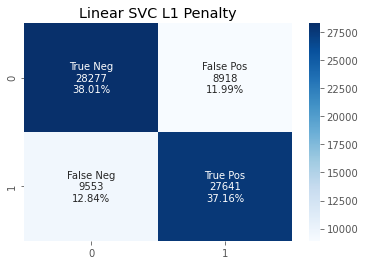

In [166]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                L.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     L.flatten()/np.sum(L)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(L, annot=labels, fmt='', cmap='Blues')
plt.title("Linear SVC L1 Penalty")

Text(0.5, 1.0, 'Linear SVC L2 Penalty')

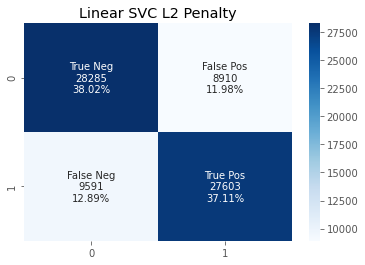

In [167]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                L1.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     L1.flatten()/np.sum(L1)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(L1, annot=labels, fmt='', cmap='Blues')
plt.title("Linear SVC L2 Penalty")

Text(0.5, 1.0, 'Passive Aggressive Classifier')

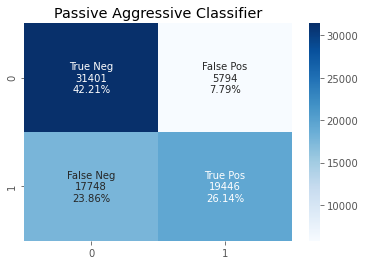

In [168]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                pa.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     pa.flatten()/np.sum(pa)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (6,4))
sns.heatmap(pa, annot=labels, fmt='', cmap='Blues')
plt.title("Passive Aggressive Classifier")

In [20]:
import pandas as pd
word_table = pd.read_excel("/Users/somyagarg/Downloads/inquireraugmented.xls")

In [21]:
import re
##1. make list of sentiment
#Positiv word list   
temp_Positiv = []
Positiv_word_list = []
for i in range(0,len(word_table.Positiv)):
    if word_table.iloc[i,2] == "Positiv":
        temp = word_table.iloc[i,0].lower()
        temp1 = re.sub('\d+', '', temp)
        temp2 = re.sub('#', '', temp1) 
        temp_Positiv.append(temp2)

Positiv_word_list = list(set(temp_Positiv))
print(len(temp_Positiv))
print(len(Positiv_word_list)) #del temp_Positiv

#Negativ word list          
temp_Negativ = []
Negativ_word_list = []
for i in range(0,len(word_table.Negativ)):
    if word_table.iloc[i,3] == "Negativ":
        temp = str(word_table.iloc[i,0]).lower()
        temp1 = re.sub('\d+', '', temp)
        temp2 = re.sub('#', '', temp1) 
        temp_Negativ.append(temp2)

Negativ_word_list = list(set(temp_Negativ))
print(len(temp_Negativ))
len(Negativ_word_list)  #del temp_Negativ

1915
1637
2291


2006